#                                        # TELCO CHURN CLASSFICATION PROJECT

# Business Goals:

In [ ]:

# Find drivers for customer churn at Telco. Why are customers churning?

# Construct a ML classification model that accurately predicts customer churn.

# Document your process well enough to be presented or read like a report.

# Executive Summary:

Prepared Telco data was trained and tested on three machine learning classification models for the aim of identifying three key drivers of churn. 
Out of the three classification models tested in the project, RandomForest and KNN performed significantly better than the third model tested, Logistic Regression. With a test accuracy of 77% for predicting our target value CHURN, it my recommendation to use the RandomForest model. 
Further exploration into the feature importance found in this model presented as additional support for the recommendation presented. 


# Goals:

In [ ]:
# Find the drivers of churn at Telco. Who is churning the most among customers? What model would be the most accurate 
# in performance in predicting churn among customers?

# Project Planning:

In [ ]:

# Create README.md with data dictionary, project and business goals, come up with initial hypotheses.

# Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.

# Clean and prepare data for run through of the pipeline. Create a function to automate the preparation, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.

# Define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.

# Establish a baseline accuracy and document.

# Train three different classification models.

# Evaluate models on train and validate datasets.

# Decided upon the model that performed the best and evaluated that single model on the test dataset.

# Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.

# Document conclusions, takeaways, and next steps in the Final Report Notebook.

# imports utilized

In [1]:
from env import host, user, password
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import  seaborn as sns
from scipy import stats
import wrangler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# =============================================================================
# CONFIGS 
# =============================================================================
SEED = 6969     #common nomeclatures... global variables are all caps...

In [3]:
telco_df = wrangler.get_telco_data()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
# =============================================================================
#                             ACQUIRE PHASE
# =============================================================================
print(telco_df)

        contract_type_id   contract_type customer_id  gender  senior_citizen  \
0                      3        Two year  0002-ORFBO  Female               0   
1                      2        One year  0002-ORFBO  Female               0   
2                      1  Month-to-month  0002-ORFBO  Female               0   
3                      3        Two year  0002-ORFBO  Female               0   
4                      2        One year  0002-ORFBO  Female               0   
...                  ...             ...         ...     ...             ...   
253543                 2        One year  9995-HOTOH    Male               0   
253544                 1  Month-to-month  9995-HOTOH    Male               0   
253545                 3        Two year  9995-HOTOH    Male               0   
253546                 2        One year  9995-HOTOH    Male               0   
253547                 1  Month-to-month  9995-HOTOH    Male               0   

       partner dependents  tenure phone

In [5]:
#Had some dupes, needed to eliminate those.

telco_df = telco_df.drop_duplicates(subset=["customer_id"]).reset_index(drop=True)
#drop dupes bc of faulty SQL query
print(telco_df)
telco_df = telco_df.set_index("customer_id")   #sets index to unique categ/index 'customer id   #sets index to unique categ/index 'customer id'
print(telco_df)
telco_df.to_excel(r'/Users/carolyndavis/Codeup/classification-exercises\File telco_df.xlsx', index = False)
#^^^ Read it into a an excel file for prepare 

telco_df.head(10)


telco_df.columns

telco_df.info()


      contract_type_id contract_type customer_id  gender  senior_citizen  \
0                    3      Two year  0002-ORFBO  Female               0   
1                    3      Two year  0003-MKNFE    Male               0   
2                    3      Two year  0004-TLHLJ    Male               0   
3                    3      Two year  0011-IGKFF    Male               1   
4                    3      Two year  0013-EXCHZ  Female               1   
...                ...           ...         ...     ...             ...   
7038                 3      Two year  9987-LUTYD  Female               0   
7039                 3      Two year  9992-RRAMN    Male               0   
7040                 3      Two year  9992-UJOEL    Male               0   
7041                 3      Two year  9993-LHIEB    Male               0   
7042                 3      Two year  9995-HOTOH    Male               0   

     partner dependents  tenure phone_service    multiple_lines  ...  \
0        Yes   

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   contract_type_id            7043 non-null   int64  
 1   contract_type               7043 non-null   object 
 2   gender                      7043 non-null   object 
 3   senior_citizen              7043 non-null   int64  
 4   partner                     7043 non-null   object 
 5   dependents                  7043 non-null   object 
 6   tenure                      7043 non-null   int64  
 7   phone_service               7043 non-null   object 
 8   multiple_lines              7043 non-null   object 
 9   internet_service_type_id    7043 non-null   int64  
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection           7043 non-null   object 
 13  tech_support           

In [6]:

churn_col = telco_df['churn'].copy()   #separate churn from the rest

#separate df in categorical vars and quant vars:
    
cat_df = telco_df[['contract_type', 'gender',
        'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'payment_type', 'internet_service_type_id.1', 'payment_type_id.1',
       'contract_type_id.1', 'contract_type_id', 'senior_citizen', 'internet_service_type_id', 'payment_type_id']].copy()


quant_df = telco_df[['tenure', 'monthly_charges', 'total_charges']].copy()
#this helps with later data manipulation
quant_df


tenure  monthly_charges total_charges
customer_id                                       
0002-ORFBO        9            65.60         593.3
0003-MKNFE        9            59.90         542.4
0004-TLHLJ        4            73.90        280.85
0011-IGKFF       13            98.00       1237.85
0013-EXCHZ        3            83.90         267.4
...             ...              ...           ...
9987-LUTYD       13            55.15         742.9
9992-RRAMN       22            85.10        1873.7
9992-UJOEL        2            50.30         92.75
9993-LHIEB       67            67.85       4627.65
9995-HOTOH       63            59.00        3707.6

[7043 rows x 3 columns]

# Tidy the Data for Manipulation

In [ ]:
#iterating through all the categorical features, converting numeric for visualization/manipulation
#Summarizing the data from the categorical variables and presenting them in a a visual bar plot.


contract_type_id
--------------------
[3]
--------------------
contract_type
--------------------
['Two year']
--------------------
gender
--------------------
['Female' 'Male']
--------------------
senior_citizen
--------------------
[0 1]
--------------------
partner
--------------------
['Yes' 'No']
--------------------
dependents
--------------------
['Yes' 'No']
--------------------
tenure
--------------------
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
--------------------
phone_service
--------------------
['Yes' 'No']
--------------------
multiple_lines
--------------------
['No' 'Yes' 'No phone service']
--------------------
internet_service_type_id
--------------------
[1 2 3]
--------------------
online_security
--------------------
['No' 'Yes' 'No internet service']
--------------------
online_bac

1169 1724-BQUHA
1170 1724-IQWNM
1171 1725-IQNIY
1172 1725-MIMXW
1173 1728-BQDMA
1174 1728-CXQBE
1175 1729-VLAZJ
1176 1730-VFMWO
1177 1730-ZMAME
1178 1731-TVIUK
1179 1732-FEKLD
1180 1732-VHUBQ
1181 1734-ZMNTZ
1182 1735-XMJVH
1183 1740-CSDJP
1184 1741-WTPON
1185 1744-JHKYS
1186 1746-TGTWV
1187 1750-CSKKM
1188 1751-NCDLI
1189 1752-OZXFY
1190 1754-GKYPY
1191 1755-FZQEC
1192 1755-RMCXH
1193 1757-TCATG
1194 1760-CAZHT
1195 1761-AEZZR
1196 1763-KUAAW
1197 1763-WQFUK
1198 1764-VUUMT
1199 1766-GKNMI
1200 1767-CJKBA
1201 1767-TGTKO
1202 1768-HNVGJ
1203 1768-ZAIFU
1204 1769-GRUIK
1205 1771-OADNZ
1206 1775-KWJKQ
1207 1776-SPBWV
1208 1777-JYQPJ
1209 1779-PWPMG
1210 1784-BXEFA
1211 1784-EZDKJ
1212 1785-BPHTP
1213 1790-NESIO
1214 1791-PQHBB
1215 1792-UXAFY
1216 1794-HBQTJ
1217 1794-SWWKL
1218 1796-JANOW
1219 1803-BGNBD
1220 1809-DMJHQ
1221 1810-BOHSY
1222 1810-MVMAI
1223 1813-JLKWR
1224 1813-JYWTO
1225 1814-DKOLC
1226 1814-WFGVS
1227 1816-FLZDK
1228 1818-ESQMW
1229 1820-DJFPH
1230 1820-TQVEV
1231 182

2419 3462-BJQQA
2420 3466-BYAVD
2421 3466-RITXD
2422 3466-WAESX
2423 3468-DRVQJ
2424 3470-BTGQO
2425 3470-OBUET
2426 3472-OAOOR
2427 3472-QPRCH
2428 3473-XIIIT
2429 3474-BAFSJ
2430 3481-JHUZH
2431 3482-ABPKK
2432 3486-HOOGQ
2433 3486-KHMLI
2434 3486-NPGST
2435 3487-EARAT
2436 3488-PGMQJ
2437 3489-HHPFY
2438 3489-VSFRD
2439 3494-JCHRQ
2440 3496-LFSZU
2441 3498-LZGQZ
2442 3500-NSDOA
2443 3500-RMZLT
2444 3503-TYDAY
2445 3506-LCJDC
2446 3506-OVLKD
2447 3507-GASNP
2448 3508-CFVZL
2449 3508-VLHCZ
2450 3509-GWQGF
2451 3511-APPBJ
2452 3511-BFTJW
2453 3512-IZIKN
2454 3518-FSTWG
2455 3518-PZXZQ
2456 3519-ZKXGG
2457 3520-FJGCV
2458 3521-HTQTV
2459 3521-MNKLV
2460 3521-SYVOR
2461 3522-CDKHF
2462 3523-BRGUW
2463 3523-QRQLL
2464 3524-WQDSG
2465 3525-DVKFN
2466 3528-HFRIQ
2467 3530-CRZSB
2468 3530-VWVGU
2469 3533-UVMOM
2470 3536-IQCTX
2471 3537-HPKQT
2472 3537-RYBHH
2473 3538-WZPHD
2474 3540-RZJYU
2475 3541-ZNUHK
2476 3544-FBCAS
2477 3545-CNWRG
2478 3546-GHEAE
2479 3547-LQRIK
2480 3549-ZTMNH
2481 355

3669 5176-LMJXE
3670 5176-OLSKT
3671 5177-RVZNU
3672 5178-LMXOP
3673 5180-UCIIQ
3674 5181-OABFK
3675 5183-KLYEM
3676 5183-SNMJQ
3677 5186-EJEGL
3678 5186-PEIZU
3679 5186-SAMNZ
3680 5188-HGMLP
3681 5192-EBGOV
3682 5193-QLVZB
3683 5195-KPUNQ
3684 5196-SGOAK
3685 5196-WPYOW
3686 5197-LQXXH
3687 5197-PYEPU
3688 5197-YPYBZ
3689 5198-EFNBM
3690 5198-HQAEN
3691 5199-FPUSP
3692 5201-CBWYG
3693 5201-FRKKS
3694 5201-USSQZ
3695 5202-IVJNU
3696 5203-XEHAX
3697 5204-HMGYF
3698 5204-QZXPU
3699 5206-HPJKM
3700 5206-XZZQI
3701 5207-PLSTK
3702 5208-FVQKB
3703 5208-HFSBT
3704 5213-TWWJU
3705 5214-CHIWJ
3706 5214-NLTIT
3707 5215-LNLDJ
3708 5216-WASFJ
3709 5219-YIPTK
3710 5220-AGAAX
3711 5222-IMUKT
3712 5222-JCXZT
3713 5223-UZAVK
3714 5226-NOZFC
3715 5227-JSCFE
3716 5228-EXCET
3717 5229-DTFYB
3718 5229-PRWKT
3719 5231-FIQPA
3720 5232-NXPAY
3721 5233-AOZUF
3722 5233-GEEAX
3723 5236-PERKL
3724 5236-XMZJY
3725 5240-CAOYT
3726 5240-IJOQT
3727 5242-UOWHD
3728 5243-SAOTC
3729 5244-IRFIH
3730 5245-VDBUR
3731 524

4918 6921-OZMFH
4919 6922-NCEDI
4920 6923-AQONU
4921 6923-EFPNL
4922 6923-JHPMP
4923 6924-TDGMT
4924 6925-BAYGL
4925 6927-WTFIV
4926 6928-ONTRW
4927 6933-FHBZC
4928 6933-VLYFX
4929 6937-GCDGQ
4930 6941-KXRRV
4931 6941-PMGEP
4932 6942-LBFDP
4933 6946-LMSQS
4934 6950-TWMYB
4935 6952-OMNWB
4936 6953-PBDIN
4937 6954-OOYZZ
4938 6956-SMUCM
4939 6959-GQEGV
4940 6959-UWKHF
4941 6960-HVYXR
4942 6961-MJKBO
4943 6961-VCPMC
4944 6963-EZQEE
4945 6963-KQYQB
4946 6967-PEJLL
4947 6967-QIQRV
4948 6968-GMKPR
4949 6968-MHOMU
4950 6968-URWQU
4951 6969-MVBAI
4952 6972-SNKKW
4953 6974-DAFLI
4954 6976-BWGLQ
4955 6979-TNDEU
4956 6979-ZNSFF
4957 6980-CDGFC
4958 6980-IMXXE
4959 6981-TDRFT
4960 6982-SSHFK
4961 6982-UQZLY
4962 6985-HAYWX
4963 6986-IJDHX
4964 6986-IXNDM
4965 6987-XQSJT
4966 6988-CJEYV
4967 6990-YNRIO
4968 6992-TKNYO
4969 6993-OHLXR
4970 6993-YCOBK
4971 6993-YGFJV
4972 6994-FGRHH
4973 6994-KERXL
4974 6994-ORCWG
4975 6996-KNSML
4976 6997-UVGOX
4977 6999-CHVCF
4978 7000-WCEVQ
4979 7005-CCBKV
4980 700

5918 8329-UTMVM
5919 8331-ZXFOE
5920 8332-OSJDW
5921 8336-TAVKX
5922 8337-MSSXB
5923 8337-UPOAQ
5924 8338-QIUNR
5925 8344-WFMFH
5926 8345-MVDYC
5927 8347-GDTMP
5928 8348-HFYIV
5929 8348-JLBUG
5930 8350-NYMVI
5931 8356-WUAOJ
5932 8357-EQXFO
5933 8361-LBRDI
5934 8361-LTMKD
5935 8364-TRMMK
5936 8372-JUXUI
5937 8374-UULRV
5938 8374-XGEJJ
5939 8375-DKEBR
5940 8375-KVTHK
5941 8378-LKJAF
5942 8380-MQINP
5943 8380-PEFPE
5944 8382-SHQEH
5945 8383-SGHJU
5946 8384-FZBJK
5947 8387-MOJJT
5948 8387-UGUSU
5949 8388-DMKAE
5950 8388-FYNPZ
5951 8390-FESFV
5952 8393-DLHGA
5953 8393-JMVMB
5954 8395-ETZKQ
5955 8397-MVTAZ
5956 8398-TBIYD
5957 8399-YNDCH
5958 8400-WZICQ
5959 8401-EMUWF
5960 8402-EIVQS
5961 8402-OOOHJ
5962 8404-FYDIB
5963 8404-GFGCZ
5964 8404-VIOMB
5965 8404-VLQFB
5966 8405-IGQFX
5967 8406-LNMHF
5968 8409-WQJUX
5969 8410-BGQXN
5970 8413-VONUO
5971 8413-YNHNV
5972 8414-MYSHR
5973 8414-OOEEL
5974 8417-FMLZI
5975 8417-GSODA
5976 8421-WZOOW
5977 8429-XIBUM
5978 8430-TWCBX
5979 8433-WPJTV
5980 843

124 Two year
125 Two year
126 Two year
127 Two year
128 Two year
129 Two year
130 Two year
131 Two year
132 Two year
133 Two year
134 Two year
135 Two year
136 Two year
137 Two year
138 Two year
139 Two year
140 Two year
141 Two year
142 Two year
143 Two year
144 Two year
145 Two year
146 Two year
147 Two year
148 Two year
149 Two year
150 Two year
151 Two year
152 Two year
153 Two year
154 Two year
155 Two year
156 Two year
157 Two year
158 Two year
159 Two year
160 Two year
161 Two year
162 Two year
163 Two year
164 Two year
165 Two year
166 Two year
167 Two year
168 Two year
169 Two year
170 Two year
171 Two year
172 Two year
173 Two year
174 Two year
175 Two year
176 Two year
177 Two year
178 Two year
179 Two year
180 Two year
181 Two year
182 Two year
183 Two year
184 Two year
185 Two year
186 Two year
187 Two year
188 Two year
189 Two year
190 Two year
191 Two year
192 Two year
193 Two year
194 Two year
195 Two year
196 Two year
197 Two year
198 Two year
199 Two year
200 Two year

1374 Two year
1375 Two year
1376 Two year
1377 Two year
1378 Two year
1379 Two year
1380 Two year
1381 Two year
1382 Two year
1383 Two year
1384 Two year
1385 Two year
1386 Two year
1387 Two year
1388 Two year
1389 Two year
1390 Two year
1391 Two year
1392 Two year
1393 Two year
1394 Two year
1395 Two year
1396 Two year
1397 Two year
1398 Two year
1399 Two year
1400 Two year
1401 Two year
1402 Two year
1403 Two year
1404 Two year
1405 Two year
1406 Two year
1407 Two year
1408 Two year
1409 Two year
1410 Two year
1411 Two year
1412 Two year
1413 Two year
1414 Two year
1415 Two year
1416 Two year
1417 Two year
1418 Two year
1419 Two year
1420 Two year
1421 Two year
1422 Two year
1423 Two year
1424 Two year
1425 Two year
1426 Two year
1427 Two year
1428 Two year
1429 Two year
1430 Two year
1431 Two year
1432 Two year
1433 Two year
1434 Two year
1435 Two year
1436 Two year
1437 Two year
1438 Two year
1439 Two year
1440 Two year
1441 Two year
1442 Two year
1443 Two year
1444 Two year
1445 T

2762 Two year
2763 Two year
2764 Two year
2765 Two year
2766 Two year
2767 Two year
2768 Two year
2769 Two year
2770 Two year
2771 Two year
2772 Two year
2773 Two year
2774 Two year
2775 Two year
2776 Two year
2777 Two year
2778 Two year
2779 Two year
2780 Two year
2781 Two year
2782 Two year
2783 Two year
2784 Two year
2785 Two year
2786 Two year
2787 Two year
2788 Two year
2789 Two year
2790 Two year
2791 Two year
2792 Two year
2793 Two year
2794 Two year
2795 Two year
2796 Two year
2797 Two year
2798 Two year
2799 Two year
2800 Two year
2801 Two year
2802 Two year
2803 Two year
2804 Two year
2805 Two year
2806 Two year
2807 Two year
2808 Two year
2809 Two year
2810 Two year
2811 Two year
2812 Two year
2813 Two year
2814 Two year
2815 Two year
2816 Two year
2817 Two year
2818 Two year
2819 Two year
2820 Two year
2821 Two year
2822 Two year
2823 Two year
2824 Two year
2825 Two year
2826 Two year
2827 Two year
2828 Two year
2829 Two year
2830 Two year
2831 Two year
2832 Two year
2833 T

4106 Two year
4107 Two year
4108 Two year
4109 Two year
4110 Two year
4111 Two year
4112 Two year
4113 Two year
4114 Two year
4115 Two year
4116 Two year
4117 Two year
4118 Two year
4119 Two year
4120 Two year
4121 Two year
4122 Two year
4123 Two year
4124 Two year
4125 Two year
4126 Two year
4127 Two year
4128 Two year
4129 Two year
4130 Two year
4131 Two year
4132 Two year
4133 Two year
4134 Two year
4135 Two year
4136 Two year
4137 Two year
4138 Two year
4139 Two year
4140 Two year
4141 Two year
4142 Two year
4143 Two year
4144 Two year
4145 Two year
4146 Two year
4147 Two year
4148 Two year
4149 Two year
4150 Two year
4151 Two year
4152 Two year
4153 Two year
4154 Two year
4155 Two year
4156 Two year
4157 Two year
4158 Two year
4159 Two year
4160 Two year
4161 Two year
4162 Two year
4163 Two year
4164 Two year
4165 Two year
4166 Two year
4167 Two year
4168 Two year
4169 Two year
4170 Two year
4171 Two year
4172 Two year
4173 Two year
4174 Two year
4175 Two year
4176 Two year
4177 T

4873 Two year
4874 Two year
4875 Two year
4876 Two year
4877 Two year
4878 Two year
4879 Two year
4880 Two year
4881 Two year
4882 Two year
4883 Two year
4884 Two year
4885 Two year
4886 Two year
4887 Two year
4888 Two year
4889 Two year
4890 Two year
4891 Two year
4892 Two year
4893 Two year
4894 Two year
4895 Two year
4896 Two year
4897 Two year
4898 Two year
4899 Two year
4900 Two year
4901 Two year
4902 Two year
4903 Two year
4904 Two year
4905 Two year
4906 Two year
4907 Two year
4908 Two year
4909 Two year
4910 Two year
4911 Two year
4912 Two year
4913 Two year
4914 Two year
4915 Two year
4916 Two year
4917 Two year
4918 Two year
4919 Two year
4920 Two year
4921 Two year
4922 Two year
4923 Two year
4924 Two year
4925 Two year
4926 Two year
4927 Two year
4928 Two year
4929 Two year
4930 Two year
4931 Two year
4932 Two year
4933 Two year
4934 Two year
4935 Two year
4936 Two year
4937 Two year
4938 Two year
4939 Two year
4940 Two year
4941 Two year
4942 Two year
4943 Two year
4944 T

6312 Two year
6313 Two year
6314 Two year
6315 Two year
6316 Two year
6317 Two year
6318 Two year
6319 Two year
6320 Two year
6321 Two year
6322 Two year
6323 Two year
6324 Two year
6325 Two year
6326 Two year
6327 Two year
6328 Two year
6329 Two year
6330 Two year
6331 Two year
6332 Two year
6333 Two year
6334 Two year
6335 Two year
6336 Two year
6337 Two year
6338 Two year
6339 Two year
6340 Two year
6341 Two year
6342 Two year
6343 Two year
6344 Two year
6345 Two year
6346 Two year
6347 Two year
6348 Two year
6349 Two year
6350 Two year
6351 Two year
6352 Two year
6353 Two year
6354 Two year
6355 Two year
6356 Two year
6357 Two year
6358 Two year
6359 Two year
6360 Two year
6361 Two year
6362 Two year
6363 Two year
6364 Two year
6365 Two year
6366 Two year
6367 Two year
6368 Two year
6369 Two year
6370 Two year
6371 Two year
6372 Two year
6373 Two year
6374 Two year
6375 Two year
6376 Two year
6377 Two year
6378 Two year
6379 Two year
6380 Two year
6381 Two year
6382 Two year
6383 T

0
290 Male
Male
1
291 Male
Male
1
292 Male
Male
1
293 Female
Female
0
294 Male
Male
1
295 Female
Female
0
296 Female
Female
0
297 Female
Female
0
298 Male
Male
1
299 Female
Female
0
300 Female
Female
0
301 Female
Female
0
302 Male
Male
1
303 Female
Female
0
304 Female
Female
0
305 Male
Male
1
306 Male
Male
1
307 Male
Male
1
308 Female
Female
0
309 Female
Female
0
310 Male
Male
1
311 Female
Female
0
312 Male
Male
1
313 Male
Male
1
314 Male
Male
1
315 Female
Female
0
316 Male
Male
1
317 Female
Female
0
318 Male
Male
1
319 Male
Male
1
320 Female
Female
0
321 Female
Female
0
322 Female
Female
0
323 Female
Female
0
324 Male
Male
1
325 Male
Male
1
326 Male
Male
1
327 Male
Male
1
328 Male
Male
1
329 Female
Female
0
330 Male
Male
1
331 Male
Male
1
332 Female
Female
0
333 Female
Female
0
334 Male
Male
1
335 Female
Female
0
336 Male
Male
1
337 Male
Male
1
338 Female
Female
0
339 Female
Female
0
340 Female
Female
0
341 Male
Male
1
342 Female
Female
0
343 Female
Female
0
344 Female
Female
0
345 Fe

0
1040 Male
Male
1
1041 Male
Male
1
1042 Female
Female
0
1043 Male
Male
1
1044 Female
Female
0
1045 Male
Male
1
1046 Male
Male
1
1047 Male
Male
1
1048 Female
Female
0
1049 Female
Female
0
1050 Female
Female
0
1051 Female
Female
0
1052 Male
Male
1
1053 Female
Female
0
1054 Male
Male
1
1055 Male
Male
1
1056 Male
Male
1
1057 Female
Female
0
1058 Male
Male
1
1059 Female
Female
0
1060 Male
Male
1
1061 Female
Female
0
1062 Female
Female
0
1063 Female
Female
0
1064 Female
Female
0
1065 Female
Female
0
1066 Female
Female
0
1067 Female
Female
0
1068 Female
Female
0
1069 Male
Male
1
1070 Male
Male
1
1071 Female
Female
0
1072 Male
Male
1
1073 Female
Female
0
1074 Female
Female
0
1075 Male
Male
1
1076 Male
Male
1
1077 Male
Male
1
1078 Male
Male
1
1079 Male
Male
1
1080 Male
Male
1
1081 Female
Female
0
1082 Female
Female
0
1083 Male
Male
1
1084 Female
Female
0
1085 Male
Male
1
1086 Male
Male
1
1087 Male
Male
1
1088 Male
Male
1
1089 Male
Male
1
1090 Male
Male
1
1091 Male
Male
1
1092 Male
Male
1
1093 

1736 Female
Female
0
1737 Male
Male
1
1738 Female
Female
0
1739 Male
Male
1
1740 Male
Male
1
1741 Male
Male
1
1742 Female
Female
0
1743 Female
Female
0
1744 Male
Male
1
1745 Female
Female
0
1746 Female
Female
0
1747 Male
Male
1
1748 Male
Male
1
1749 Female
Female
0
1750 Male
Male
1
1751 Male
Male
1
1752 Female
Female
0
1753 Female
Female
0
1754 Male
Male
1
1755 Male
Male
1
1756 Male
Male
1
1757 Female
Female
0
1758 Female
Female
0
1759 Male
Male
1
1760 Female
Female
0
1761 Female
Female
0
1762 Male
Male
1
1763 Male
Male
1
1764 Female
Female
0
1765 Female
Female
0
1766 Female
Female
0
1767 Female
Female
0
1768 Male
Male
1
1769 Male
Male
1
1770 Male
Male
1
1771 Female
Female
0
1772 Female
Female
0
1773 Male
Male
1
1774 Male
Male
1
1775 Female
Female
0
1776 Male
Male
1
1777 Male
Male
1
1778 Male
Male
1
1779 Male
Male
1
1780 Female
Female
0
1781 Female
Female
0
1782 Male
Male
1
1783 Male
Male
1
1784 Male
Male
1
1785 Male
Male
1
1786 Female
Female
0
1787 Female
Female
0
1788 Male
Male
1
178

Male
1
2415 Male
Male
1
2416 Female
Female
0
2417 Male
Male
1
2418 Male
Male
1
2419 Female
Female
0
2420 Male
Male
1
2421 Male
Male
1
2422 Male
Male
1
2423 Female
Female
0
2424 Male
Male
1
2425 Female
Female
0
2426 Male
Male
1
2427 Male
Male
1
2428 Female
Female
0
2429 Male
Male
1
2430 Male
Male
1
2431 Female
Female
0
2432 Female
Female
0
2433 Male
Male
1
2434 Female
Female
0
2435 Female
Female
0
2436 Male
Male
1
2437 Female
Female
0
2438 Female
Female
0
2439 Male
Male
1
2440 Male
Male
1
2441 Male
Male
1
2442 Male
Male
1
2443 Female
Female
0
2444 Female
Female
0
2445 Male
Male
1
2446 Male
Male
1
2447 Male
Male
1
2448 Female
Female
0
2449 Female
Female
0
2450 Male
Male
1
2451 Male
Male
1
2452 Male
Male
1
2453 Female
Female
0
2454 Male
Male
1
2455 Female
Female
0
2456 Female
Female
0
2457 Male
Male
1
2458 Male
Male
1
2459 Male
Male
1
2460 Female
Female
0
2461 Female
Female
0
2462 Male
Male
1
2463 Female
Female
0
2464 Female
Female
0
2465 Female
Female
0
2466 Male
Male
1
2467 Female
Femal

3164 Female
Female
0
3165 Female
Female
0
3166 Male
Male
1
3167 Male
Male
1
3168 Female
Female
0
3169 Male
Male
1
3170 Female
Female
0
3171 Female
Female
0
3172 Female
Female
0
3173 Female
Female
0
3174 Female
Female
0
3175 Male
Male
1
3176 Female
Female
0
3177 Male
Male
1
3178 Male
Male
1
3179 Female
Female
0
3180 Male
Male
1
3181 Female
Female
0
3182 Female
Female
0
3183 Female
Female
0
3184 Male
Male
1
3185 Male
Male
1
3186 Female
Female
0
3187 Female
Female
0
3188 Male
Male
1
3189 Male
Male
1
3190 Female
Female
0
3191 Female
Female
0
3192 Male
Male
1
3193 Male
Male
1
3194 Male
Male
1
3195 Female
Female
0
3196 Female
Female
0
3197 Female
Female
0
3198 Male
Male
1
3199 Male
Male
1
3200 Female
Female
0
3201 Female
Female
0
3202 Female
Female
0
3203 Female
Female
0
3204 Male
Male
1
3205 Female
Female
0
3206 Male
Male
1
3207 Male
Male
1
3208 Female
Female
0
3209 Female
Female
0
3210 Male
Male
1
3211 Male
Male
1
3212 Male
Male
1
3213 Female
Female
0
3214 Female
Female
0
3215 Female
Femal

3886 Female
Female
0
3887 Male
Male
1
3888 Male
Male
1
3889 Male
Male
1
3890 Female
Female
0
3891 Female
Female
0
3892 Male
Male
1
3893 Female
Female
0
3894 Female
Female
0
3895 Female
Female
0
3896 Female
Female
0
3897 Female
Female
0
3898 Female
Female
0
3899 Female
Female
0
3900 Male
Male
1
3901 Male
Male
1
3902 Male
Male
1
3903 Male
Male
1
3904 Female
Female
0
3905 Female
Female
0
3906 Male
Male
1
3907 Female
Female
0
3908 Female
Female
0
3909 Female
Female
0
3910 Male
Male
1
3911 Female
Female
0
3912 Female
Female
0
3913 Female
Female
0
3914 Male
Male
1
3915 Male
Male
1
3916 Male
Male
1
3917 Female
Female
0
3918 Male
Male
1
3919 Male
Male
1
3920 Female
Female
0
3921 Male
Male
1
3922 Female
Female
0
3923 Female
Female
0
3924 Male
Male
1
3925 Male
Male
1
3926 Male
Male
1
3927 Female
Female
0
3928 Female
Female
0
3929 Male
Male
1
3930 Male
Male
1
3931 Male
Male
1
3932 Female
Female
0
3933 Female
Female
0
3934 Female
Female
0
3935 Male
Male
1
3936 Female
Female
0
3937 Female
Female
0


4539 Female
Female
0
4540 Female
Female
0
4541 Male
Male
1
4542 Female
Female
0
4543 Female
Female
0
4544 Female
Female
0
4545 Female
Female
0
4546 Female
Female
0
4547 Male
Male
1
4548 Female
Female
0
4549 Male
Male
1
4550 Female
Female
0
4551 Male
Male
1
4552 Male
Male
1
4553 Male
Male
1
4554 Female
Female
0
4555 Male
Male
1
4556 Female
Female
0
4557 Female
Female
0
4558 Male
Male
1
4559 Female
Female
0
4560 Female
Female
0
4561 Male
Male
1
4562 Male
Male
1
4563 Male
Male
1
4564 Female
Female
0
4565 Male
Male
1
4566 Female
Female
0
4567 Female
Female
0
4568 Female
Female
0
4569 Male
Male
1
4570 Female
Female
0
4571 Male
Male
1
4572 Male
Male
1
4573 Female
Female
0
4574 Male
Male
1
4575 Male
Male
1
4576 Male
Male
1
4577 Female
Female
0
4578 Female
Female
0
4579 Female
Female
0
4580 Female
Female
0
4581 Female
Female
0
4582 Male
Male
1
4583 Female
Female
0
4584 Male
Male
1
4585 Male
Male
1
4586 Female
Female
0
4587 Male
Male
1
4588 Male
Male
1
4589 Female
Female
0
4590 Male
Male
1
4591

Male
1
5239 Male
Male
1
5240 Male
Male
1
5241 Female
Female
0
5242 Male
Male
1
5243 Female
Female
0
5244 Female
Female
0
5245 Male
Male
1
5246 Male
Male
1
5247 Male
Male
1
5248 Male
Male
1
5249 Male
Male
1
5250 Female
Female
0
5251 Female
Female
0
5252 Female
Female
0
5253 Female
Female
0
5254 Male
Male
1
5255 Female
Female
0
5256 Female
Female
0
5257 Male
Male
1
5258 Female
Female
0
5259 Female
Female
0
5260 Female
Female
0
5261 Male
Male
1
5262 Male
Male
1
5263 Female
Female
0
5264 Female
Female
0
5265 Female
Female
0
5266 Male
Male
1
5267 Male
Male
1
5268 Male
Male
1
5269 Male
Male
1
5270 Male
Male
1
5271 Female
Female
0
5272 Female
Female
0
5273 Male
Male
1
5274 Male
Male
1
5275 Male
Male
1
5276 Female
Female
0
5277 Male
Male
1
5278 Female
Female
0
5279 Male
Male
1
5280 Male
Male
1
5281 Male
Male
1
5282 Male
Male
1
5283 Male
Male
1
5284 Female
Female
0
5285 Female
Female
0
5286 Female
Female
0
5287 Male
Male
1
5288 Male
Male
1
5289 Male
Male
1
5290 Female
Female
0
5291 Male
Male
1


0
5914 Male
Male
1
5915 Male
Male
1
5916 Female
Female
0
5917 Female
Female
0
5918 Male
Male
1
5919 Female
Female
0
5920 Male
Male
1
5921 Female
Female
0
5922 Female
Female
0
5923 Male
Male
1
5924 Male
Male
1
5925 Male
Male
1
5926 Female
Female
0
5927 Female
Female
0
5928 Male
Male
1
5929 Male
Male
1
5930 Female
Female
0
5931 Female
Female
0
5932 Female
Female
0
5933 Female
Female
0
5934 Male
Male
1
5935 Female
Female
0
5936 Male
Male
1
5937 Male
Male
1
5938 Male
Male
1
5939 Female
Female
0
5940 Male
Male
1
5941 Male
Male
1
5942 Female
Female
0
5943 Male
Male
1
5944 Female
Female
0
5945 Female
Female
0
5946 Female
Female
0
5947 Female
Female
0
5948 Female
Female
0
5949 Female
Female
0
5950 Male
Male
1
5951 Female
Female
0
5952 Male
Male
1
5953 Male
Male
1
5954 Male
Male
1
5955 Male
Male
1
5956 Female
Female
0
5957 Male
Male
1
5958 Female
Female
0
5959 Male
Male
1
5960 Male
Male
1
5961 Female
Female
0
5962 Male
Male
1
5963 Male
Male
1
5964 Female
Female
0
5965 Female
Female
0
5966 Femal

0
6539 Female
Female
0
6540 Male
Male
1
6541 Male
Male
1
6542 Female
Female
0
6543 Male
Male
1
6544 Female
Female
0
6545 Male
Male
1
6546 Female
Female
0
6547 Female
Female
0
6548 Female
Female
0
6549 Male
Male
1
6550 Male
Male
1
6551 Female
Female
0
6552 Female
Female
0
6553 Male
Male
1
6554 Male
Male
1
6555 Male
Male
1
6556 Male
Male
1
6557 Female
Female
0
6558 Male
Male
1
6559 Female
Female
0
6560 Male
Male
1
6561 Female
Female
0
6562 Male
Male
1
6563 Female
Female
0
6564 Female
Female
0
6565 Female
Female
0
6566 Female
Female
0
6567 Male
Male
1
6568 Male
Male
1
6569 Male
Male
1
6570 Male
Male
1
6571 Male
Male
1
6572 Female
Female
0
6573 Male
Male
1
6574 Male
Male
1
6575 Female
Female
0
6576 Male
Male
1
6577 Female
Female
0
6578 Female
Female
0
6579 Male
Male
1
6580 Male
Male
1
6581 Female
Female
0
6582 Female
Female
0
6583 Female
Female
0
6584 Male
Male
1
6585 Female
Female
0
6586 Female
Female
0
6587 Male
Male
1
6588 Male
Male
1
6589 Male
Male
1
6590 Male
Male
1
6591 Female
Female

120 Yes
Yes
1
121 No
No
0
122 Yes
Yes
1
123 No
No
0
124 Yes
Yes
1
125 Yes
Yes
1
126 Yes
Yes
1
127 No
No
0
128 No
No
0
129 No
No
0
130 No
No
0
131 No
No
0
132 Yes
Yes
1
133 No
No
0
134 No
No
0
135 No
No
0
136 No
No
0
137 Yes
Yes
1
138 Yes
Yes
1
139 No
No
0
140 No
No
0
141 Yes
Yes
1
142 No
No
0
143 No
No
0
144 Yes
Yes
1
145 Yes
Yes
1
146 No
No
0
147 Yes
Yes
1
148 Yes
Yes
1
149 No
No
0
150 No
No
0
151 Yes
Yes
1
152 No
No
0
153 Yes
Yes
1
154 Yes
Yes
1
155 Yes
Yes
1
156 Yes
Yes
1
157 Yes
Yes
1
158 No
No
0
159 No
No
0
160 No
No
0
161 Yes
Yes
1
162 Yes
Yes
1
163 Yes
Yes
1
164 Yes
Yes
1
165 Yes
Yes
1
166 Yes
Yes
1
167 No
No
0
168 Yes
Yes
1
169 Yes
Yes
1
170 Yes
Yes
1
171 Yes
Yes
1
172 Yes
Yes
1
173 No
No
0
174 No
No
0
175 Yes
Yes
1
176 Yes
Yes
1
177 Yes
Yes
1
178 No
No
0
179 Yes
Yes
1
180 No
No
0
181 No
No
0
182 No
No
0
183 Yes
Yes
1
184 Yes
Yes
1
185 No
No
0
186 Yes
Yes
1
187 No
No
0
188 No
No
0
189 No
No
0
190 No
No
0
191 No
No
0
192 No
No
0
193 No
No
0
194 Yes
Yes
1
195 Yes
Yes
1
196 No
No


1370 No
No
0
1371 Yes
Yes
1
1372 Yes
Yes
1
1373 No
No
0
1374 No
No
0
1375 No
No
0
1376 No
No
0
1377 Yes
Yes
1
1378 No
No
0
1379 Yes
Yes
1
1380 Yes
Yes
1
1381 No
No
0
1382 Yes
Yes
1
1383 No
No
0
1384 No
No
0
1385 Yes
Yes
1
1386 No
No
0
1387 Yes
Yes
1
1388 No
No
0
1389 Yes
Yes
1
1390 Yes
Yes
1
1391 Yes
Yes
1
1392 Yes
Yes
1
1393 No
No
0
1394 Yes
Yes
1
1395 No
No
0
1396 Yes
Yes
1
1397 No
No
0
1398 No
No
0
1399 No
No
0
1400 Yes
Yes
1
1401 Yes
Yes
1
1402 Yes
Yes
1
1403 No
No
0
1404 Yes
Yes
1
1405 Yes
Yes
1
1406 Yes
Yes
1
1407 Yes
Yes
1
1408 No
No
0
1409 No
No
0
1410 No
No
0
1411 No
No
0
1412 No
No
0
1413 No
No
0
1414 No
No
0
1415 Yes
Yes
1
1416 Yes
Yes
1
1417 Yes
Yes
1
1418 Yes
Yes
1
1419 No
No
0
1420 Yes
Yes
1
1421 Yes
Yes
1
1422 No
No
0
1423 Yes
Yes
1
1424 No
No
0
1425 Yes
Yes
1
1426 No
No
0
1427 No
No
0
1428 Yes
Yes
1
1429 No
No
0
1430 Yes
Yes
1
1431 No
No
0
1432 No
No
0
1433 No
No
0
1434 No
No
0
1435 No
No
0
1436 No
No
0
1437 Yes
Yes
1
1438 No
No
0
1439 No
No
0
1440 No
No
0
1441 Yes
Yes


1995 No
No
0
1996 Yes
Yes
1
1997 No
No
0
1998 Yes
Yes
1
1999 Yes
Yes
1
2000 Yes
Yes
1
2001 No
No
0
2002 Yes
Yes
1
2003 Yes
Yes
1
2004 No
No
0
2005 Yes
Yes
1
2006 Yes
Yes
1
2007 Yes
Yes
1
2008 No
No
0
2009 Yes
Yes
1
2010 Yes
Yes
1
2011 Yes
Yes
1
2012 Yes
Yes
1
2013 Yes
Yes
1
2014 Yes
Yes
1
2015 Yes
Yes
1
2016 Yes
Yes
1
2017 No
No
0
2018 No
No
0
2019 Yes
Yes
1
2020 No
No
0
2021 No
No
0
2022 No
No
0
2023 Yes
Yes
1
2024 Yes
Yes
1
2025 Yes
Yes
1
2026 Yes
Yes
1
2027 No
No
0
2028 Yes
Yes
1
2029 No
No
0
2030 Yes
Yes
1
2031 Yes
Yes
1
2032 No
No
0
2033 Yes
Yes
1
2034 Yes
Yes
1
2035 No
No
0
2036 No
No
0
2037 Yes
Yes
1
2038 Yes
Yes
1
2039 Yes
Yes
1
2040 Yes
Yes
1
2041 No
No
0
2042 No
No
0
2043 No
No
0
2044 No
No
0
2045 No
No
0
2046 No
No
0
2047 Yes
Yes
1
2048 Yes
Yes
1
2049 No
No
0
2050 Yes
Yes
1
2051 No
No
0
2052 No
No
0
2053 No
No
0
2054 Yes
Yes
1
2055 No
No
0
2056 Yes
Yes
1
2057 No
No
0
2058 Yes
Yes
1
2059 No
No
0
2060 Yes
Yes
1
2061 No
No
0
2062 No
No
0
2063 No
No
0
2064 Yes
Yes
1
2065 No
No
0

2620 No
No
0
2621 Yes
Yes
1
2622 No
No
0
2623 Yes
Yes
1
2624 Yes
Yes
1
2625 Yes
Yes
1
2626 No
No
0
2627 Yes
Yes
1
2628 No
No
0
2629 Yes
Yes
1
2630 Yes
Yes
1
2631 No
No
0
2632 No
No
0
2633 Yes
Yes
1
2634 Yes
Yes
1
2635 No
No
0
2636 No
No
0
2637 No
No
0
2638 Yes
Yes
1
2639 No
No
0
2640 Yes
Yes
1
2641 Yes
Yes
1
2642 No
No
0
2643 Yes
Yes
1
2644 Yes
Yes
1
2645 Yes
Yes
1
2646 Yes
Yes
1
2647 Yes
Yes
1
2648 Yes
Yes
1
2649 No
No
0
2650 No
No
0
2651 Yes
Yes
1
2652 Yes
Yes
1
2653 Yes
Yes
1
2654 Yes
Yes
1
2655 No
No
0
2656 Yes
Yes
1
2657 No
No
0
2658 Yes
Yes
1
2659 Yes
Yes
1
2660 Yes
Yes
1
2661 Yes
Yes
1
2662 Yes
Yes
1
2663 No
No
0
2664 No
No
0
2665 Yes
Yes
1
2666 Yes
Yes
1
2667 Yes
Yes
1
2668 No
No
0
2669 Yes
Yes
1
2670 Yes
Yes
1
2671 Yes
Yes
1
2672 Yes
Yes
1
2673 No
No
0
2674 Yes
Yes
1
2675 No
No
0
2676 Yes
Yes
1
2677 No
No
0
2678 Yes
Yes
1
2679 Yes
Yes
1
2680 Yes
Yes
1
2681 No
No
0
2682 No
No
0
2683 Yes
Yes
1
2684 Yes
Yes
1
2685 No
No
0
2686 Yes
Yes
1
2687 Yes
Yes
1
2688 No
No
0
2689 Yes
Yes
1


3310 Yes
Yes
1
3311 No
No
0
3312 No
No
0
3313 No
No
0
3314 Yes
Yes
1
3315 No
No
0
3316 No
No
0
3317 Yes
Yes
1
3318 No
No
0
3319 No
No
0
3320 No
No
0
3321 No
No
0
3322 Yes
Yes
1
3323 Yes
Yes
1
3324 No
No
0
3325 No
No
0
3326 Yes
Yes
1
3327 Yes
Yes
1
3328 Yes
Yes
1
3329 Yes
Yes
1
3330 Yes
Yes
1
3331 No
No
0
3332 No
No
0
3333 No
No
0
3334 No
No
0
3335 Yes
Yes
1
3336 No
No
0
3337 Yes
Yes
1
3338 Yes
Yes
1
3339 Yes
Yes
1
3340 No
No
0
3341 Yes
Yes
1
3342 Yes
Yes
1
3343 No
No
0
3344 Yes
Yes
1
3345 Yes
Yes
1
3346 No
No
0
3347 No
No
0
3348 Yes
Yes
1
3349 Yes
Yes
1
3350 Yes
Yes
1
3351 Yes
Yes
1
3352 Yes
Yes
1
3353 Yes
Yes
1
3354 Yes
Yes
1
3355 No
No
0
3356 Yes
Yes
1
3357 No
No
0
3358 Yes
Yes
1
3359 Yes
Yes
1
3360 Yes
Yes
1
3361 No
No
0
3362 No
No
0
3363 No
No
0
3364 Yes
Yes
1
3365 Yes
Yes
1
3366 No
No
0
3367 Yes
Yes
1
3368 No
No
0
3369 No
No
0
3370 Yes
Yes
1
3371 Yes
Yes
1
3372 Yes
Yes
1
3373 Yes
Yes
1
3374 No
No
0
3375 No
No
0
3376 Yes
Yes
1
3377 No
No
0
3378 Yes
Yes
1
3379 Yes
Yes
1
3380 No
No
0

No
0
3995 No
No
0
3996 No
No
0
3997 No
No
0
3998 Yes
Yes
1
3999 Yes
Yes
1
4000 No
No
0
4001 Yes
Yes
1
4002 Yes
Yes
1
4003 No
No
0
4004 No
No
0
4005 Yes
Yes
1
4006 No
No
0
4007 No
No
0
4008 No
No
0
4009 No
No
0
4010 Yes
Yes
1
4011 No
No
0
4012 Yes
Yes
1
4013 No
No
0
4014 No
No
0
4015 No
No
0
4016 Yes
Yes
1
4017 Yes
Yes
1
4018 No
No
0
4019 No
No
0
4020 Yes
Yes
1
4021 No
No
0
4022 Yes
Yes
1
4023 Yes
Yes
1
4024 No
No
0
4025 No
No
0
4026 Yes
Yes
1
4027 Yes
Yes
1
4028 No
No
0
4029 Yes
Yes
1
4030 Yes
Yes
1
4031 Yes
Yes
1
4032 No
No
0
4033 No
No
0
4034 Yes
Yes
1
4035 No
No
0
4036 No
No
0
4037 No
No
0
4038 Yes
Yes
1
4039 No
No
0
4040 Yes
Yes
1
4041 No
No
0
4042 Yes
Yes
1
4043 No
No
0
4044 No
No
0
4045 Yes
Yes
1
4046 No
No
0
4047 Yes
Yes
1
4048 No
No
0
4049 Yes
Yes
1
4050 Yes
Yes
1
4051 No
No
0
4052 Yes
Yes
1
4053 Yes
Yes
1
4054 Yes
Yes
1
4055 No
No
0
4056 No
No
0
4057 No
No
0
4058 Yes
Yes
1
4059 No
No
0
4060 Yes
Yes
1
4061 Yes
Yes
1
4062 Yes
Yes
1
4063 Yes
Yes
1
4064 No
No
0
4065 No
No
0
4066 Y

Yes
1
4745 Yes
Yes
1
4746 No
No
0
4747 Yes
Yes
1
4748 No
No
0
4749 No
No
0
4750 No
No
0
4751 Yes
Yes
1
4752 Yes
Yes
1
4753 No
No
0
4754 No
No
0
4755 No
No
0
4756 Yes
Yes
1
4757 Yes
Yes
1
4758 Yes
Yes
1
4759 No
No
0
4760 Yes
Yes
1
4761 Yes
Yes
1
4762 No
No
0
4763 Yes
Yes
1
4764 No
No
0
4765 Yes
Yes
1
4766 Yes
Yes
1
4767 No
No
0
4768 No
No
0
4769 No
No
0
4770 No
No
0
4771 No
No
0
4772 Yes
Yes
1
4773 Yes
Yes
1
4774 No
No
0
4775 No
No
0
4776 Yes
Yes
1
4777 No
No
0
4778 Yes
Yes
1
4779 Yes
Yes
1
4780 Yes
Yes
1
4781 No
No
0
4782 Yes
Yes
1
4783 Yes
Yes
1
4784 No
No
0
4785 No
No
0
4786 No
No
0
4787 No
No
0
4788 Yes
Yes
1
4789 No
No
0
4790 No
No
0
4791 No
No
0
4792 No
No
0
4793 Yes
Yes
1
4794 Yes
Yes
1
4795 Yes
Yes
1
4796 No
No
0
4797 No
No
0
4798 No
No
0
4799 Yes
Yes
1
4800 Yes
Yes
1
4801 No
No
0
4802 No
No
0
4803 Yes
Yes
1
4804 Yes
Yes
1
4805 No
No
0
4806 Yes
Yes
1
4807 Yes
Yes
1
4808 Yes
Yes
1
4809 Yes
Yes
1
4810 No
No
0
4811 No
No
0
4812 Yes
Yes
1
4813 Yes
Yes
1
4814 Yes
Yes
1
4815 No
No
0
4

5494 No
No
0
5495 Yes
Yes
1
5496 Yes
Yes
1
5497 Yes
Yes
1
5498 Yes
Yes
1
5499 Yes
Yes
1
5500 Yes
Yes
1
5501 No
No
0
5502 Yes
Yes
1
5503 No
No
0
5504 No
No
0
5505 No
No
0
5506 No
No
0
5507 No
No
0
5508 Yes
Yes
1
5509 No
No
0
5510 No
No
0
5511 Yes
Yes
1
5512 Yes
Yes
1
5513 No
No
0
5514 Yes
Yes
1
5515 No
No
0
5516 No
No
0
5517 Yes
Yes
1
5518 No
No
0
5519 No
No
0
5520 Yes
Yes
1
5521 Yes
Yes
1
5522 Yes
Yes
1
5523 Yes
Yes
1
5524 Yes
Yes
1
5525 Yes
Yes
1
5526 Yes
Yes
1
5527 Yes
Yes
1
5528 No
No
0
5529 Yes
Yes
1
5530 No
No
0
5531 No
No
0
5532 Yes
Yes
1
5533 Yes
Yes
1
5534 No
No
0
5535 No
No
0
5536 No
No
0
5537 No
No
0
5538 No
No
0
5539 No
No
0
5540 Yes
Yes
1
5541 No
No
0
5542 Yes
Yes
1
5543 Yes
Yes
1
5544 Yes
Yes
1
5545 No
No
0
5546 Yes
Yes
1
5547 Yes
Yes
1
5548 No
No
0
5549 Yes
Yes
1
5550 No
No
0
5551 Yes
Yes
1
5552 No
No
0
5553 No
No
0
5554 No
No
0
5555 Yes
Yes
1
5556 No
No
0
5557 No
No
0
5558 No
No
0
5559 No
No
0
5560 Yes
Yes
1
5561 No
No
0
5562 Yes
Yes
1
5563 Yes
Yes
1
5564 Yes
Yes
1
5565 

6244 Yes
Yes
1
6245 Yes
Yes
1
6246 No
No
0
6247 No
No
0
6248 Yes
Yes
1
6249 Yes
Yes
1
6250 Yes
Yes
1
6251 Yes
Yes
1
6252 Yes
Yes
1
6253 Yes
Yes
1
6254 Yes
Yes
1
6255 Yes
Yes
1
6256 No
No
0
6257 No
No
0
6258 Yes
Yes
1
6259 Yes
Yes
1
6260 No
No
0
6261 No
No
0
6262 No
No
0
6263 Yes
Yes
1
6264 Yes
Yes
1
6265 No
No
0
6266 No
No
0
6267 No
No
0
6268 Yes
Yes
1
6269 No
No
0
6270 No
No
0
6271 Yes
Yes
1
6272 No
No
0
6273 No
No
0
6274 No
No
0
6275 Yes
Yes
1
6276 No
No
0
6277 Yes
Yes
1
6278 Yes
Yes
1
6279 No
No
0
6280 Yes
Yes
1
6281 No
No
0
6282 Yes
Yes
1
6283 No
No
0
6284 Yes
Yes
1
6285 No
No
0
6286 No
No
0
6287 No
No
0
6288 No
No
0
6289 Yes
Yes
1
6290 Yes
Yes
1
6291 Yes
Yes
1
6292 Yes
Yes
1
6293 No
No
0
6294 Yes
Yes
1
6295 Yes
Yes
1
6296 No
No
0
6297 No
No
0
6298 No
No
0
6299 No
No
0
6300 Yes
Yes
1
6301 Yes
Yes
1
6302 Yes
Yes
1
6303 No
No
0
6304 Yes
Yes
1
6305 Yes
Yes
1
6306 No
No
0
6307 No
No
0
6308 Yes
Yes
1
6309 No
No
0
6310 Yes
Yes
1
6311 No
No
0
6312 No
No
0
6313 No
No
0
6314 No
No
0
6315 No

6994 Yes
Yes
1
6995 Yes
Yes
1
6996 No
No
0
6997 No
No
0
6998 No
No
0
6999 Yes
Yes
1
7000 No
No
0
7001 Yes
Yes
1
7002 No
No
0
7003 Yes
Yes
1
7004 Yes
Yes
1
7005 Yes
Yes
1
7006 Yes
Yes
1
7007 No
No
0
7008 No
No
0
7009 No
No
0
7010 No
No
0
7011 Yes
Yes
1
7012 No
No
0
7013 Yes
Yes
1
7014 Yes
Yes
1
7015 No
No
0
7016 Yes
Yes
1
7017 Yes
Yes
1
7018 Yes
Yes
1
7019 No
No
0
7020 No
No
0
7021 Yes
Yes
1
7022 Yes
Yes
1
7023 No
No
0
7024 No
No
0
7025 No
No
0
7026 No
No
0
7027 Yes
Yes
1
7028 Yes
Yes
1
7029 No
No
0
7030 Yes
Yes
1
7031 No
No
0
7032 Yes
Yes
1
7033 No
No
0
7034 Yes
Yes
1
7035 No
No
0
7036 No
No
0
7037 No
No
0
7038 No
No
0
7039 Yes
Yes
1
7040 No
No
0
7041 Yes
Yes
1
7042 Yes
Yes
1
rows 0       Yes
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042    Yes
Name: dependents, Length: 7043, dtype: object
0 Yes
Yes
1
1 No
No
0
2 No
No
0
3 No
No
0
4 No
No
0
5 Yes
Yes
1
6 No
No
0
7 No
No
0
8 No
No
0
9 Yes
Yes
1
10 No
No
0
11 Yes
Yes
1
12

Yes
1
667 No
No
0
668 No
No
0
669 No
No
0
670 Yes
Yes
1
671 Yes
Yes
1
672 Yes
Yes
1
673 No
No
0
674 Yes
Yes
1
675 No
No
0
676 No
No
0
677 No
No
0
678 Yes
Yes
1
679 Yes
Yes
1
680 No
No
0
681 Yes
Yes
1
682 No
No
0
683 No
No
0
684 No
No
0
685 Yes
Yes
1
686 No
No
0
687 No
No
0
688 Yes
Yes
1
689 No
No
0
690 No
No
0
691 No
No
0
692 No
No
0
693 No
No
0
694 No
No
0
695 No
No
0
696 Yes
Yes
1
697 No
No
0
698 No
No
0
699 No
No
0
700 Yes
Yes
1
701 No
No
0
702 Yes
Yes
1
703 Yes
Yes
1
704 Yes
Yes
1
705 No
No
0
706 Yes
Yes
1
707 No
No
0
708 No
No
0
709 Yes
Yes
1
710 No
No
0
711 No
No
0
712 No
No
0
713 Yes
Yes
1
714 No
No
0
715 Yes
Yes
1
716 Yes
Yes
1
717 No
No
0
718 No
No
0
719 Yes
Yes
1
720 Yes
Yes
1
721 Yes
Yes
1
722 Yes
Yes
1
723 No
No
0
724 Yes
Yes
1
725 No
No
0
726 No
No
0
727 Yes
Yes
1
728 No
No
0
729 No
No
0
730 Yes
Yes
1
731 No
No
0
732 No
No
0
733 Yes
Yes
1
734 Yes
Yes
1
735 Yes
Yes
1
736 Yes
Yes
1
737 No
No
0
738 No
No
0
739 Yes
Yes
1
740 No
No
0
741 Yes
Yes
1
742 Yes
Yes
1
743 Yes
Yes
1
74

No
0
1326 No
No
0
1327 No
No
0
1328 No
No
0
1329 No
No
0
1330 No
No
0
1331 No
No
0
1332 Yes
Yes
1
1333 No
No
0
1334 No
No
0
1335 No
No
0
1336 No
No
0
1337 No
No
0
1338 No
No
0
1339 No
No
0
1340 No
No
0
1341 No
No
0
1342 No
No
0
1343 No
No
0
1344 No
No
0
1345 No
No
0
1346 No
No
0
1347 No
No
0
1348 No
No
0
1349 Yes
Yes
1
1350 Yes
Yes
1
1351 No
No
0
1352 No
No
0
1353 No
No
0
1354 No
No
0
1355 No
No
0
1356 Yes
Yes
1
1357 Yes
Yes
1
1358 No
No
0
1359 No
No
0
1360 No
No
0
1361 No
No
0
1362 No
No
0
1363 Yes
Yes
1
1364 Yes
Yes
1
1365 No
No
0
1366 No
No
0
1367 No
No
0
1368 Yes
Yes
1
1369 No
No
0
1370 No
No
0
1371 Yes
Yes
1
1372 No
No
0
1373 No
No
0
1374 No
No
0
1375 No
No
0
1376 No
No
0
1377 Yes
Yes
1
1378 No
No
0
1379 No
No
0
1380 Yes
Yes
1
1381 No
No
0
1382 No
No
0
1383 No
No
0
1384 No
No
0
1385 Yes
Yes
1
1386 No
No
0
1387 No
No
0
1388 No
No
0
1389 No
No
0
1390 Yes
Yes
1
1391 No
No
0
1392 No
No
0
1393 No
No
0
1394 No
No
0
1395 No
No
0
1396 No
No
0
1397 No
No
0
1398 No
No
0
1399 No
No
0
1400 No

No
0
2076 Yes
Yes
1
2077 Yes
Yes
1
2078 No
No
0
2079 Yes
Yes
1
2080 No
No
0
2081 No
No
0
2082 No
No
0
2083 No
No
0
2084 No
No
0
2085 No
No
0
2086 No
No
0
2087 No
No
0
2088 Yes
Yes
1
2089 No
No
0
2090 No
No
0
2091 No
No
0
2092 Yes
Yes
1
2093 No
No
0
2094 No
No
0
2095 No
No
0
2096 No
No
0
2097 Yes
Yes
1
2098 No
No
0
2099 No
No
0
2100 Yes
Yes
1
2101 Yes
Yes
1
2102 No
No
0
2103 No
No
0
2104 No
No
0
2105 Yes
Yes
1
2106 Yes
Yes
1
2107 Yes
Yes
1
2108 Yes
Yes
1
2109 No
No
0
2110 No
No
0
2111 No
No
0
2112 No
No
0
2113 No
No
0
2114 No
No
0
2115 No
No
0
2116 Yes
Yes
1
2117 No
No
0
2118 No
No
0
2119 No
No
0
2120 No
No
0
2121 No
No
0
2122 No
No
0
2123 Yes
Yes
1
2124 No
No
0
2125 No
No
0
2126 No
No
0
2127 No
No
0
2128 Yes
Yes
1
2129 No
No
0
2130 Yes
Yes
1
2131 No
No
0
2132 Yes
Yes
1
2133 No
No
0
2134 No
No
0
2135 No
No
0
2136 No
No
0
2137 No
No
0
2138 No
No
0
2139 No
No
0
2140 Yes
Yes
1
2141 Yes
Yes
1
2142 Yes
Yes
1
2143 No
No
0
2144 Yes
Yes
1
2145 Yes
Yes
1
2146 No
No
0
2147 No
No
0
2148 No
No
0
21

2825 No
No
0
2826 No
No
0
2827 Yes
Yes
1
2828 Yes
Yes
1
2829 Yes
Yes
1
2830 No
No
0
2831 No
No
0
2832 No
No
0
2833 No
No
0
2834 No
No
0
2835 No
No
0
2836 Yes
Yes
1
2837 No
No
0
2838 No
No
0
2839 No
No
0
2840 No
No
0
2841 Yes
Yes
1
2842 Yes
Yes
1
2843 Yes
Yes
1
2844 No
No
0
2845 No
No
0
2846 No
No
0
2847 No
No
0
2848 Yes
Yes
1
2849 No
No
0
2850 No
No
0
2851 No
No
0
2852 Yes
Yes
1
2853 No
No
0
2854 No
No
0
2855 Yes
Yes
1
2856 Yes
Yes
1
2857 Yes
Yes
1
2858 No
No
0
2859 No
No
0
2860 No
No
0
2861 No
No
0
2862 No
No
0
2863 No
No
0
2864 No
No
0
2865 No
No
0
2866 No
No
0
2867 Yes
Yes
1
2868 Yes
Yes
1
2869 No
No
0
2870 No
No
0
2871 No
No
0
2872 Yes
Yes
1
2873 No
No
0
2874 No
No
0
2875 Yes
Yes
1
2876 Yes
Yes
1
2877 No
No
0
2878 No
No
0
2879 No
No
0
2880 Yes
Yes
1
2881 No
No
0
2882 No
No
0
2883 Yes
Yes
1
2884 No
No
0
2885 Yes
Yes
1
2886 Yes
Yes
1
2887 No
No
0
2888 No
No
0
2889 Yes
Yes
1
2890 No
No
0
2891 No
No
0
2892 No
No
0
2893 Yes
Yes
1
2894 No
No
0
2895 No
No
0
2896 No
No
0
2897 No
No
0
2898 

1
3569 No
No
0
3570 Yes
Yes
1
3571 Yes
Yes
1
3572 Yes
Yes
1
3573 Yes
Yes
1
3574 No
No
0
3575 No
No
0
3576 No
No
0
3577 Yes
Yes
1
3578 Yes
Yes
1
3579 Yes
Yes
1
3580 Yes
Yes
1
3581 No
No
0
3582 No
No
0
3583 No
No
0
3584 No
No
0
3585 No
No
0
3586 No
No
0
3587 Yes
Yes
1
3588 No
No
0
3589 No
No
0
3590 No
No
0
3591 No
No
0
3592 No
No
0
3593 No
No
0
3594 No
No
0
3595 No
No
0
3596 No
No
0
3597 Yes
Yes
1
3598 Yes
Yes
1
3599 No
No
0
3600 No
No
0
3601 Yes
Yes
1
3602 Yes
Yes
1
3603 No
No
0
3604 Yes
Yes
1
3605 No
No
0
3606 No
No
0
3607 No
No
0
3608 No
No
0
3609 No
No
0
3610 No
No
0
3611 Yes
Yes
1
3612 Yes
Yes
1
3613 Yes
Yes
1
3614 No
No
0
3615 No
No
0
3616 No
No
0
3617 No
No
0
3618 Yes
Yes
1
3619 No
No
0
3620 No
No
0
3621 Yes
Yes
1
3622 No
No
0
3623 Yes
Yes
1
3624 No
No
0
3625 Yes
Yes
1
3626 No
No
0
3627 No
No
0
3628 No
No
0
3629 Yes
Yes
1
3630 No
No
0
3631 No
No
0
3632 No
No
0
3633 No
No
0
3634 No
No
0
3635 No
No
0
3636 No
No
0
3637 No
No
0
3638 Yes
Yes
1
3639 Yes
Yes
1
3640 No
No
0
3641 No
No
0
3

4200 No
No
0
4201 Yes
Yes
1
4202 Yes
Yes
1
4203 No
No
0
4204 No
No
0
4205 Yes
Yes
1
4206 No
No
0
4207 No
No
0
4208 Yes
Yes
1
4209 No
No
0
4210 No
No
0
4211 Yes
Yes
1
4212 No
No
0
4213 Yes
Yes
1
4214 No
No
0
4215 Yes
Yes
1
4216 No
No
0
4217 No
No
0
4218 No
No
0
4219 No
No
0
4220 No
No
0
4221 No
No
0
4222 No
No
0
4223 No
No
0
4224 No
No
0
4225 No
No
0
4226 No
No
0
4227 Yes
Yes
1
4228 No
No
0
4229 Yes
Yes
1
4230 No
No
0
4231 Yes
Yes
1
4232 Yes
Yes
1
4233 No
No
0
4234 Yes
Yes
1
4235 No
No
0
4236 Yes
Yes
1
4237 No
No
0
4238 No
No
0
4239 No
No
0
4240 No
No
0
4241 Yes
Yes
1
4242 Yes
Yes
1
4243 No
No
0
4244 No
No
0
4245 No
No
0
4246 Yes
Yes
1
4247 No
No
0
4248 Yes
Yes
1
4249 No
No
0
4250 No
No
0
4251 No
No
0
4252 No
No
0
4253 No
No
0
4254 No
No
0
4255 No
No
0
4256 No
No
0
4257 Yes
Yes
1
4258 No
No
0
4259 No
No
0
4260 No
No
0
4261 No
No
0
4262 No
No
0
4263 No
No
0
4264 No
No
0
4265 No
No
0
4266 Yes
Yes
1
4267 No
No
0
4268 No
No
0
4269 Yes
Yes
1
4270 No
No
0
4271 Yes
Yes
1
4272 No
No
0
4273 Yes


No
0
4891 No
No
0
4892 No
No
0
4893 No
No
0
4894 No
No
0
4895 Yes
Yes
1
4896 No
No
0
4897 No
No
0
4898 Yes
Yes
1
4899 No
No
0
4900 Yes
Yes
1
4901 No
No
0
4902 Yes
Yes
1
4903 No
No
0
4904 No
No
0
4905 Yes
Yes
1
4906 No
No
0
4907 No
No
0
4908 No
No
0
4909 No
No
0
4910 No
No
0
4911 No
No
0
4912 No
No
0
4913 No
No
0
4914 Yes
Yes
1
4915 No
No
0
4916 No
No
0
4917 Yes
Yes
1
4918 Yes
Yes
1
4919 Yes
Yes
1
4920 Yes
Yes
1
4921 No
No
0
4922 No
No
0
4923 No
No
0
4924 No
No
0
4925 No
No
0
4926 Yes
Yes
1
4927 No
No
0
4928 Yes
Yes
1
4929 Yes
Yes
1
4930 No
No
0
4931 No
No
0
4932 No
No
0
4933 No
No
0
4934 Yes
Yes
1
4935 No
No
0
4936 No
No
0
4937 No
No
0
4938 No
No
0
4939 No
No
0
4940 No
No
0
4941 No
No
0
4942 No
No
0
4943 No
No
0
4944 No
No
0
4945 Yes
Yes
1
4946 Yes
Yes
1
4947 Yes
Yes
1
4948 No
No
0
4949 No
No
0
4950 No
No
0
4951 No
No
0
4952 No
No
0
4953 No
No
0
4954 Yes
Yes
1
4955 No
No
0
4956 No
No
0
4957 No
No
0
4958 Yes
Yes
1
4959 Yes
Yes
1
4960 No
No
0
4961 No
No
0
4962 No
No
0
4963 Yes
Yes
1
4964

1
6075 Yes
Yes
1
6076 Yes
Yes
1
6077 No
No
0
6078 No
No
0
6079 Yes
Yes
1
6080 No
No
0
6081 No
No
0
6082 No
No
0
6083 Yes
Yes
1
6084 No
No
0
6085 No
No
0
6086 No
No
0
6087 No
No
0
6088 Yes
Yes
1
6089 No
No
0
6090 No
No
0
6091 No
No
0
6092 No
No
0
6093 No
No
0
6094 Yes
Yes
1
6095 Yes
Yes
1
6096 No
No
0
6097 No
No
0
6098 No
No
0
6099 No
No
0
6100 Yes
Yes
1
6101 No
No
0
6102 No
No
0
6103 No
No
0
6104 No
No
0
6105 Yes
Yes
1
6106 No
No
0
6107 No
No
0
6108 Yes
Yes
1
6109 No
No
0
6110 No
No
0
6111 No
No
0
6112 Yes
Yes
1
6113 No
No
0
6114 No
No
0
6115 Yes
Yes
1
6116 No
No
0
6117 No
No
0
6118 No
No
0
6119 Yes
Yes
1
6120 No
No
0
6121 No
No
0
6122 Yes
Yes
1
6123 No
No
0
6124 Yes
Yes
1
6125 No
No
0
6126 No
No
0
6127 No
No
0
6128 No
No
0
6129 No
No
0
6130 No
No
0
6131 Yes
Yes
1
6132 No
No
0
6133 No
No
0
6134 Yes
Yes
1
6135 Yes
Yes
1
6136 No
No
0
6137 No
No
0
6138 No
No
0
6139 No
No
0
6140 No
No
0
6141 No
No
0
6142 No
No
0
6143 No
No
0
6144 Yes
Yes
1
6145 No
No
0
6146 Yes
Yes
1
6147 No
No
0
6148 No
N

6781 Yes
Yes
1
6782 Yes
Yes
1
6783 No
No
0
6784 Yes
Yes
1
6785 No
No
0
6786 No
No
0
6787 No
No
0
6788 No
No
0
6789 No
No
0
6790 No
No
0
6791 No
No
0
6792 No
No
0
6793 Yes
Yes
1
6794 Yes
Yes
1
6795 No
No
0
6796 No
No
0
6797 Yes
Yes
1
6798 No
No
0
6799 Yes
Yes
1
6800 Yes
Yes
1
6801 Yes
Yes
1
6802 No
No
0
6803 No
No
0
6804 No
No
0
6805 No
No
0
6806 No
No
0
6807 No
No
0
6808 Yes
Yes
1
6809 No
No
0
6810 No
No
0
6811 No
No
0
6812 No
No
0
6813 No
No
0
6814 Yes
Yes
1
6815 Yes
Yes
1
6816 Yes
Yes
1
6817 No
No
0
6818 No
No
0
6819 No
No
0
6820 No
No
0
6821 No
No
0
6822 No
No
0
6823 No
No
0
6824 No
No
0
6825 Yes
Yes
1
6826 No
No
0
6827 No
No
0
6828 Yes
Yes
1
6829 No
No
0
6830 No
No
0
6831 Yes
Yes
1
6832 Yes
Yes
1
6833 Yes
Yes
1
6834 No
No
0
6835 No
No
0
6836 No
No
0
6837 No
No
0
6838 Yes
Yes
1
6839 No
No
0
6840 Yes
Yes
1
6841 Yes
Yes
1
6842 Yes
Yes
1
6843 No
No
0
6844 Yes
Yes
1
6845 Yes
Yes
1
6846 Yes
Yes
1
6847 No
No
0
6848 No
No
0
6849 No
No
0
6850 No
No
0
6851 No
No
0
6852 No
No
0
6853 No
No
0
6

384 No
No
0
385 Yes
Yes
1
386 Yes
Yes
1
387 Yes
Yes
1
388 Yes
Yes
1
389 Yes
Yes
1
390 Yes
Yes
1
391 Yes
Yes
1
392 Yes
Yes
1
393 Yes
Yes
1
394 Yes
Yes
1
395 Yes
Yes
1
396 Yes
Yes
1
397 Yes
Yes
1
398 Yes
Yes
1
399 Yes
Yes
1
400 Yes
Yes
1
401 Yes
Yes
1
402 Yes
Yes
1
403 No
No
0
404 Yes
Yes
1
405 Yes
Yes
1
406 Yes
Yes
1
407 Yes
Yes
1
408 Yes
Yes
1
409 Yes
Yes
1
410 Yes
Yes
1
411 Yes
Yes
1
412 No
No
0
413 Yes
Yes
1
414 No
No
0
415 No
No
0
416 Yes
Yes
1
417 Yes
Yes
1
418 Yes
Yes
1
419 Yes
Yes
1
420 Yes
Yes
1
421 Yes
Yes
1
422 Yes
Yes
1
423 No
No
0
424 Yes
Yes
1
425 Yes
Yes
1
426 Yes
Yes
1
427 Yes
Yes
1
428 No
No
0
429 Yes
Yes
1
430 Yes
Yes
1
431 Yes
Yes
1
432 Yes
Yes
1
433 Yes
Yes
1
434 Yes
Yes
1
435 Yes
Yes
1
436 Yes
Yes
1
437 Yes
Yes
1
438 Yes
Yes
1
439 Yes
Yes
1
440 Yes
Yes
1
441 Yes
Yes
1
442 Yes
Yes
1
443 Yes
Yes
1
444 Yes
Yes
1
445 Yes
Yes
1
446 Yes
Yes
1
447 Yes
Yes
1
448 Yes
Yes
1
449 Yes
Yes
1
450 Yes
Yes
1
451 No
No
0
452 Yes
Yes
1
453 Yes
Yes
1
454 Yes
Yes
1
455 No
No
0
456 Yes
Ye

1534 Yes
Yes
1
1535 Yes
Yes
1
1536 Yes
Yes
1
1537 Yes
Yes
1
1538 Yes
Yes
1
1539 Yes
Yes
1
1540 Yes
Yes
1
1541 Yes
Yes
1
1542 Yes
Yes
1
1543 Yes
Yes
1
1544 No
No
0
1545 Yes
Yes
1
1546 Yes
Yes
1
1547 Yes
Yes
1
1548 No
No
0
1549 Yes
Yes
1
1550 Yes
Yes
1
1551 Yes
Yes
1
1552 Yes
Yes
1
1553 Yes
Yes
1
1554 Yes
Yes
1
1555 Yes
Yes
1
1556 Yes
Yes
1
1557 Yes
Yes
1
1558 Yes
Yes
1
1559 Yes
Yes
1
1560 Yes
Yes
1
1561 Yes
Yes
1
1562 Yes
Yes
1
1563 No
No
0
1564 Yes
Yes
1
1565 Yes
Yes
1
1566 Yes
Yes
1
1567 Yes
Yes
1
1568 Yes
Yes
1
1569 Yes
Yes
1
1570 Yes
Yes
1
1571 Yes
Yes
1
1572 Yes
Yes
1
1573 No
No
0
1574 Yes
Yes
1
1575 Yes
Yes
1
1576 Yes
Yes
1
1577 Yes
Yes
1
1578 Yes
Yes
1
1579 Yes
Yes
1
1580 Yes
Yes
1
1581 Yes
Yes
1
1582 Yes
Yes
1
1583 Yes
Yes
1
1584 Yes
Yes
1
1585 No
No
0
1586 Yes
Yes
1
1587 No
No
0
1588 No
No
0
1589 Yes
Yes
1
1590 No
No
0
1591 Yes
Yes
1
1592 Yes
Yes
1
1593 Yes
Yes
1
1594 Yes
Yes
1
1595 Yes
Yes
1
1596 Yes
Yes
1
1597 Yes
Yes
1
1598 Yes
Yes
1
1599 Yes
Yes
1
1600 Yes
Yes
1
1601 Yes
Ye

1
2277 Yes
Yes
1
2278 No
No
0
2279 Yes
Yes
1
2280 Yes
Yes
1
2281 Yes
Yes
1
2282 Yes
Yes
1
2283 Yes
Yes
1
2284 Yes
Yes
1
2285 Yes
Yes
1
2286 Yes
Yes
1
2287 Yes
Yes
1
2288 Yes
Yes
1
2289 Yes
Yes
1
2290 Yes
Yes
1
2291 No
No
0
2292 Yes
Yes
1
2293 Yes
Yes
1
2294 Yes
Yes
1
2295 Yes
Yes
1
2296 Yes
Yes
1
2297 Yes
Yes
1
2298 Yes
Yes
1
2299 Yes
Yes
1
2300 No
No
0
2301 Yes
Yes
1
2302 Yes
Yes
1
2303 Yes
Yes
1
2304 No
No
0
2305 Yes
Yes
1
2306 Yes
Yes
1
2307 No
No
0
2308 Yes
Yes
1
2309 No
No
0
2310 Yes
Yes
1
2311 Yes
Yes
1
2312 Yes
Yes
1
2313 Yes
Yes
1
2314 No
No
0
2315 Yes
Yes
1
2316 Yes
Yes
1
2317 No
No
0
2318 Yes
Yes
1
2319 Yes
Yes
1
2320 Yes
Yes
1
2321 Yes
Yes
1
2322 Yes
Yes
1
2323 Yes
Yes
1
2324 Yes
Yes
1
2325 Yes
Yes
1
2326 Yes
Yes
1
2327 Yes
Yes
1
2328 No
No
0
2329 Yes
Yes
1
2330 Yes
Yes
1
2331 Yes
Yes
1
2332 Yes
Yes
1
2333 Yes
Yes
1
2334 Yes
Yes
1
2335 Yes
Yes
1
2336 Yes
Yes
1
2337 No
No
0
2338 Yes
Yes
1
2339 Yes
Yes
1
2340 Yes
Yes
1
2341 Yes
Yes
1
2342 Yes
Yes
1
2343 Yes
Yes
1
2344 Yes
Yes


2883 No
No
0
2884 Yes
Yes
1
2885 Yes
Yes
1
2886 Yes
Yes
1
2887 Yes
Yes
1
2888 No
No
0
2889 Yes
Yes
1
2890 Yes
Yes
1
2891 Yes
Yes
1
2892 Yes
Yes
1
2893 Yes
Yes
1
2894 Yes
Yes
1
2895 Yes
Yes
1
2896 Yes
Yes
1
2897 Yes
Yes
1
2898 Yes
Yes
1
2899 Yes
Yes
1
2900 Yes
Yes
1
2901 No
No
0
2902 Yes
Yes
1
2903 Yes
Yes
1
2904 Yes
Yes
1
2905 Yes
Yes
1
2906 Yes
Yes
1
2907 No
No
0
2908 No
No
0
2909 No
No
0
2910 Yes
Yes
1
2911 Yes
Yes
1
2912 Yes
Yes
1
2913 Yes
Yes
1
2914 Yes
Yes
1
2915 Yes
Yes
1
2916 Yes
Yes
1
2917 Yes
Yes
1
2918 Yes
Yes
1
2919 Yes
Yes
1
2920 Yes
Yes
1
2921 Yes
Yes
1
2922 Yes
Yes
1
2923 Yes
Yes
1
2924 Yes
Yes
1
2925 No
No
0
2926 Yes
Yes
1
2927 Yes
Yes
1
2928 Yes
Yes
1
2929 Yes
Yes
1
2930 Yes
Yes
1
2931 Yes
Yes
1
2932 Yes
Yes
1
2933 Yes
Yes
1
2934 Yes
Yes
1
2935 Yes
Yes
1
2936 Yes
Yes
1
2937 Yes
Yes
1
2938 Yes
Yes
1
2939 Yes
Yes
1
2940 Yes
Yes
1
2941 Yes
Yes
1
2942 Yes
Yes
1
2943 Yes
Yes
1
2944 No
No
0
2945 Yes
Yes
1
2946 Yes
Yes
1
2947 No
No
0
2948 Yes
Yes
1
2949 Yes
Yes
1
2950 Yes
Yes


3517 No
No
0
3518 Yes
Yes
1
3519 Yes
Yes
1
3520 Yes
Yes
1
3521 Yes
Yes
1
3522 Yes
Yes
1
3523 Yes
Yes
1
3524 Yes
Yes
1
3525 No
No
0
3526 Yes
Yes
1
3527 Yes
Yes
1
3528 Yes
Yes
1
3529 Yes
Yes
1
3530 No
No
0
3531 Yes
Yes
1
3532 Yes
Yes
1
3533 Yes
Yes
1
3534 Yes
Yes
1
3535 No
No
0
3536 Yes
Yes
1
3537 Yes
Yes
1
3538 Yes
Yes
1
3539 Yes
Yes
1
3540 Yes
Yes
1
3541 Yes
Yes
1
3542 Yes
Yes
1
3543 Yes
Yes
1
3544 Yes
Yes
1
3545 Yes
Yes
1
3546 Yes
Yes
1
3547 Yes
Yes
1
3548 Yes
Yes
1
3549 Yes
Yes
1
3550 Yes
Yes
1
3551 Yes
Yes
1
3552 Yes
Yes
1
3553 Yes
Yes
1
3554 Yes
Yes
1
3555 Yes
Yes
1
3556 Yes
Yes
1
3557 Yes
Yes
1
3558 Yes
Yes
1
3559 Yes
Yes
1
3560 No
No
0
3561 Yes
Yes
1
3562 Yes
Yes
1
3563 Yes
Yes
1
3564 Yes
Yes
1
3565 Yes
Yes
1
3566 Yes
Yes
1
3567 Yes
Yes
1
3568 Yes
Yes
1
3569 No
No
0
3570 Yes
Yes
1
3571 Yes
Yes
1
3572 Yes
Yes
1
3573 Yes
Yes
1
3574 Yes
Yes
1
3575 Yes
Yes
1
3576 Yes
Yes
1
3577 Yes
Yes
1
3578 Yes
Yes
1
3579 Yes
Yes
1
3580 Yes
Yes
1
3581 No
No
0
3582 Yes
Yes
1
3583 Yes
Yes
1
3584 Yes


4144 Yes
Yes
1
4145 Yes
Yes
1
4146 Yes
Yes
1
4147 No
No
0
4148 Yes
Yes
1
4149 No
No
0
4150 Yes
Yes
1
4151 Yes
Yes
1
4152 Yes
Yes
1
4153 No
No
0
4154 Yes
Yes
1
4155 Yes
Yes
1
4156 Yes
Yes
1
4157 Yes
Yes
1
4158 Yes
Yes
1
4159 No
No
0
4160 Yes
Yes
1
4161 Yes
Yes
1
4162 Yes
Yes
1
4163 Yes
Yes
1
4164 Yes
Yes
1
4165 Yes
Yes
1
4166 Yes
Yes
1
4167 Yes
Yes
1
4168 Yes
Yes
1
4169 Yes
Yes
1
4170 Yes
Yes
1
4171 Yes
Yes
1
4172 Yes
Yes
1
4173 Yes
Yes
1
4174 Yes
Yes
1
4175 Yes
Yes
1
4176 Yes
Yes
1
4177 Yes
Yes
1
4178 Yes
Yes
1
4179 Yes
Yes
1
4180 Yes
Yes
1
4181 Yes
Yes
1
4182 Yes
Yes
1
4183 Yes
Yes
1
4184 Yes
Yes
1
4185 Yes
Yes
1
4186 Yes
Yes
1
4187 Yes
Yes
1
4188 Yes
Yes
1
4189 Yes
Yes
1
4190 Yes
Yes
1
4191 Yes
Yes
1
4192 Yes
Yes
1
4193 Yes
Yes
1
4194 Yes
Yes
1
4195 Yes
Yes
1
4196 Yes
Yes
1
4197 Yes
Yes
1
4198 Yes
Yes
1
4199 Yes
Yes
1
4200 Yes
Yes
1
4201 Yes
Yes
1
4202 Yes
Yes
1
4203 Yes
Yes
1
4204 Yes
Yes
1
4205 Yes
Yes
1
4206 Yes
Yes
1
4207 Yes
Yes
1
4208 Yes
Yes
1
4209 No
No
0
4210 Yes
Yes
1
4211 

4780 Yes
Yes
1
4781 Yes
Yes
1
4782 Yes
Yes
1
4783 Yes
Yes
1
4784 Yes
Yes
1
4785 Yes
Yes
1
4786 Yes
Yes
1
4787 Yes
Yes
1
4788 Yes
Yes
1
4789 Yes
Yes
1
4790 Yes
Yes
1
4791 Yes
Yes
1
4792 Yes
Yes
1
4793 Yes
Yes
1
4794 Yes
Yes
1
4795 Yes
Yes
1
4796 No
No
0
4797 Yes
Yes
1
4798 Yes
Yes
1
4799 No
No
0
4800 Yes
Yes
1
4801 Yes
Yes
1
4802 Yes
Yes
1
4803 Yes
Yes
1
4804 Yes
Yes
1
4805 Yes
Yes
1
4806 Yes
Yes
1
4807 No
No
0
4808 Yes
Yes
1
4809 Yes
Yes
1
4810 Yes
Yes
1
4811 Yes
Yes
1
4812 Yes
Yes
1
4813 Yes
Yes
1
4814 Yes
Yes
1
4815 Yes
Yes
1
4816 Yes
Yes
1
4817 No
No
0
4818 Yes
Yes
1
4819 Yes
Yes
1
4820 Yes
Yes
1
4821 No
No
0
4822 Yes
Yes
1
4823 Yes
Yes
1
4824 Yes
Yes
1
4825 Yes
Yes
1
4826 No
No
0
4827 Yes
Yes
1
4828 Yes
Yes
1
4829 Yes
Yes
1
4830 Yes
Yes
1
4831 Yes
Yes
1
4832 Yes
Yes
1
4833 No
No
0
4834 Yes
Yes
1
4835 Yes
Yes
1
4836 Yes
Yes
1
4837 Yes
Yes
1
4838 Yes
Yes
1
4839 Yes
Yes
1
4840 Yes
Yes
1
4841 Yes
Yes
1
4842 Yes
Yes
1
4843 Yes
Yes
1
4844 Yes
Yes
1
4845 Yes
Yes
1
4846 Yes
Yes
1
4847 No
N

5444 Yes
Yes
1
5445 Yes
Yes
1
5446 No
No
0
5447 Yes
Yes
1
5448 Yes
Yes
1
5449 Yes
Yes
1
5450 Yes
Yes
1
5451 Yes
Yes
1
5452 Yes
Yes
1
5453 Yes
Yes
1
5454 Yes
Yes
1
5455 Yes
Yes
1
5456 Yes
Yes
1
5457 Yes
Yes
1
5458 Yes
Yes
1
5459 Yes
Yes
1
5460 Yes
Yes
1
5461 Yes
Yes
1
5462 Yes
Yes
1
5463 Yes
Yes
1
5464 Yes
Yes
1
5465 Yes
Yes
1
5466 Yes
Yes
1
5467 Yes
Yes
1
5468 Yes
Yes
1
5469 Yes
Yes
1
5470 Yes
Yes
1
5471 Yes
Yes
1
5472 Yes
Yes
1
5473 Yes
Yes
1
5474 Yes
Yes
1
5475 Yes
Yes
1
5476 Yes
Yes
1
5477 Yes
Yes
1
5478 Yes
Yes
1
5479 Yes
Yes
1
5480 Yes
Yes
1
5481 Yes
Yes
1
5482 Yes
Yes
1
5483 Yes
Yes
1
5484 Yes
Yes
1
5485 Yes
Yes
1
5486 No
No
0
5487 Yes
Yes
1
5488 No
No
0
5489 Yes
Yes
1
5490 Yes
Yes
1
5491 Yes
Yes
1
5492 Yes
Yes
1
5493 Yes
Yes
1
5494 No
No
0
5495 No
No
0
5496 Yes
Yes
1
5497 Yes
Yes
1
5498 No
No
0
5499 Yes
Yes
1
5500 Yes
Yes
1
5501 No
No
0
5502 Yes
Yes
1
5503 Yes
Yes
1
5504 No
No
0
5505 Yes
Yes
1
5506 Yes
Yes
1
5507 Yes
Yes
1
5508 No
No
0
5509 No
No
0
5510 Yes
Yes
1
5511 Yes
Yes
1


1
6134 Yes
Yes
1
6135 Yes
Yes
1
6136 Yes
Yes
1
6137 Yes
Yes
1
6138 Yes
Yes
1
6139 Yes
Yes
1
6140 Yes
Yes
1
6141 Yes
Yes
1
6142 Yes
Yes
1
6143 No
No
0
6144 Yes
Yes
1
6145 Yes
Yes
1
6146 Yes
Yes
1
6147 Yes
Yes
1
6148 Yes
Yes
1
6149 Yes
Yes
1
6150 Yes
Yes
1
6151 Yes
Yes
1
6152 Yes
Yes
1
6153 Yes
Yes
1
6154 Yes
Yes
1
6155 No
No
0
6156 Yes
Yes
1
6157 No
No
0
6158 Yes
Yes
1
6159 Yes
Yes
1
6160 Yes
Yes
1
6161 No
No
0
6162 Yes
Yes
1
6163 Yes
Yes
1
6164 Yes
Yes
1
6165 Yes
Yes
1
6166 Yes
Yes
1
6167 Yes
Yes
1
6168 Yes
Yes
1
6169 Yes
Yes
1
6170 Yes
Yes
1
6171 Yes
Yes
1
6172 Yes
Yes
1
6173 Yes
Yes
1
6174 Yes
Yes
1
6175 No
No
0
6176 No
No
0
6177 No
No
0
6178 Yes
Yes
1
6179 Yes
Yes
1
6180 Yes
Yes
1
6181 Yes
Yes
1
6182 Yes
Yes
1
6183 Yes
Yes
1
6184 Yes
Yes
1
6185 Yes
Yes
1
6186 Yes
Yes
1
6187 Yes
Yes
1
6188 Yes
Yes
1
6189 Yes
Yes
1
6190 Yes
Yes
1
6191 Yes
Yes
1
6192 No
No
0
6193 Yes
Yes
1
6194 Yes
Yes
1
6195 Yes
Yes
1
6196 Yes
Yes
1
6197 Yes
Yes
1
6198 Yes
Yes
1
6199 Yes
Yes
1
6200 Yes
Yes
1
6201 Yes


6780 Yes
Yes
1
6781 Yes
Yes
1
6782 Yes
Yes
1
6783 No
No
0
6784 Yes
Yes
1
6785 Yes
Yes
1
6786 Yes
Yes
1
6787 Yes
Yes
1
6788 Yes
Yes
1
6789 Yes
Yes
1
6790 Yes
Yes
1
6791 No
No
0
6792 Yes
Yes
1
6793 Yes
Yes
1
6794 Yes
Yes
1
6795 Yes
Yes
1
6796 Yes
Yes
1
6797 Yes
Yes
1
6798 Yes
Yes
1
6799 Yes
Yes
1
6800 Yes
Yes
1
6801 Yes
Yes
1
6802 Yes
Yes
1
6803 Yes
Yes
1
6804 Yes
Yes
1
6805 Yes
Yes
1
6806 Yes
Yes
1
6807 Yes
Yes
1
6808 Yes
Yes
1
6809 No
No
0
6810 Yes
Yes
1
6811 Yes
Yes
1
6812 Yes
Yes
1
6813 No
No
0
6814 Yes
Yes
1
6815 Yes
Yes
1
6816 Yes
Yes
1
6817 Yes
Yes
1
6818 Yes
Yes
1
6819 Yes
Yes
1
6820 Yes
Yes
1
6821 Yes
Yes
1
6822 Yes
Yes
1
6823 Yes
Yes
1
6824 No
No
0
6825 Yes
Yes
1
6826 Yes
Yes
1
6827 Yes
Yes
1
6828 Yes
Yes
1
6829 Yes
Yes
1
6830 Yes
Yes
1
6831 Yes
Yes
1
6832 Yes
Yes
1
6833 Yes
Yes
1
6834 No
No
0
6835 Yes
Yes
1
6836 Yes
Yes
1
6837 Yes
Yes
1
6838 Yes
Yes
1
6839 Yes
Yes
1
6840 Yes
Yes
1
6841 Yes
Yes
1
6842 Yes
Yes
1
6843 Yes
Yes
1
6844 Yes
Yes
1
6845 Yes
Yes
1
6846 Yes
Yes
1
6847 Ye

1
362 Yes
Yes
1
363 Yes
Yes
1
364 Yes
Yes
1
365 Yes
Yes
1
366 No
No
0
367 No
No
0
368 Yes
Yes
1
369 No
No
0
370 No
No
0
371 Yes
Yes
1
372 No
No
0
373 No
No
0
374 No
No
0
375 No
No
0
376 Yes
Yes
1
377 Yes
Yes
1
378 No phone service
No phone service
2
379 Yes
Yes
1
380 Yes
Yes
1
381 Yes
Yes
1
382 Yes
Yes
1
383 No
No
0
384 No phone service
No phone service
2
385 Yes
Yes
1
386 No
No
0
387 Yes
Yes
1
388 No
No
0
389 Yes
Yes
1
390 Yes
Yes
1
391 No
No
0
392 Yes
Yes
1
393 No
No
0
394 Yes
Yes
1
395 No
No
0
396 Yes
Yes
1
397 No
No
0
398 No
No
0
399 No
No
0
400 Yes
Yes
1
401 No
No
0
402 No
No
0
403 No phone service
No phone service
2
404 No
No
0
405 No
No
0
406 Yes
Yes
1
407 No
No
0
408 No
No
0
409 Yes
Yes
1
410 No
No
0
411 No
No
0
412 No phone service
No phone service
2
413 No
No
0
414 No phone service
No phone service
2
415 No phone service
No phone service
2
416 Yes
Yes
1
417 No
No
0
418 Yes
Yes
1
419 No
No
0
420 No
No
0
421 No
No
0
422 Yes
Yes
1
423 No phone service
No phone service
2
424 No
N

1098 Yes
Yes
1
1099 Yes
Yes
1
1100 No
No
0
1101 No
No
0
1102 Yes
Yes
1
1103 Yes
Yes
1
1104 No
No
0
1105 No
No
0
1106 Yes
Yes
1
1107 Yes
Yes
1
1108 Yes
Yes
1
1109 No
No
0
1110 No phone service
No phone service
2
1111 Yes
Yes
1
1112 No
No
0
1113 Yes
Yes
1
1114 Yes
Yes
1
1115 No
No
0
1116 No
No
0
1117 No
No
0
1118 No
No
0
1119 No
No
0
1120 Yes
Yes
1
1121 No phone service
No phone service
2
1122 No
No
0
1123 No
No
0
1124 Yes
Yes
1
1125 Yes
Yes
1
1126 No
No
0
1127 Yes
Yes
1
1128 No
No
0
1129 Yes
Yes
1
1130 No
No
0
1131 Yes
Yes
1
1132 No
No
0
1133 Yes
Yes
1
1134 No
No
0
1135 Yes
Yes
1
1136 Yes
Yes
1
1137 No
No
0
1138 No
No
0
1139 No
No
0
1140 Yes
Yes
1
1141 No
No
0
1142 No
No
0
1143 Yes
Yes
1
1144 Yes
Yes
1
1145 No
No
0
1146 No
No
0
1147 No
No
0
1148 Yes
Yes
1
1149 Yes
Yes
1
1150 No phone service
No phone service
2
1151 Yes
Yes
1
1152 No
No
0
1153 No
No
0
1154 Yes
Yes
1
1155 No
No
0
1156 No
No
0
1157 No
No
0
1158 Yes
Yes
1
1159 Yes
Yes
1
1160 No
No
0
1161 Yes
Yes
1
1162 No
No
0
1163 No phone

1736 No
No
0
1737 No
No
0
1738 Yes
Yes
1
1739 Yes
Yes
1
1740 Yes
Yes
1
1741 No phone service
No phone service
2
1742 No phone service
No phone service
2
1743 No phone service
No phone service
2
1744 No
No
0
1745 No
No
0
1746 Yes
Yes
1
1747 No
No
0
1748 No
No
0
1749 No
No
0
1750 No
No
0
1751 Yes
Yes
1
1752 Yes
Yes
1
1753 Yes
Yes
1
1754 Yes
Yes
1
1755 Yes
Yes
1
1756 No
No
0
1757 Yes
Yes
1
1758 No
No
0
1759 Yes
Yes
1
1760 No
No
0
1761 No
No
0
1762 Yes
Yes
1
1763 No
No
0
1764 No phone service
No phone service
2
1765 No
No
0
1766 Yes
Yes
1
1767 No phone service
No phone service
2
1768 No
No
0
1769 No phone service
No phone service
2
1770 Yes
Yes
1
1771 No
No
0
1772 No
No
0
1773 No
No
0
1774 No phone service
No phone service
2
1775 No
No
0
1776 No
No
0
1777 No
No
0
1778 No
No
0
1779 No
No
0
1780 No
No
0
1781 No
No
0
1782 No phone service
No phone service
2
1783 No phone service
No phone service
2
1784 No
No
0
1785 No
No
0
1786 No
No
0
1787 Yes
Yes
1
1788 Yes
Yes
1
1789 Yes
Yes
1
1790 No
No
0

2443 No
No
0
2444 Yes
Yes
1
2445 No
No
0
2446 Yes
Yes
1
2447 No
No
0
2448 Yes
Yes
1
2449 Yes
Yes
1
2450 No
No
0
2451 No
No
0
2452 No phone service
No phone service
2
2453 Yes
Yes
1
2454 Yes
Yes
1
2455 No
No
0
2456 Yes
Yes
1
2457 Yes
Yes
1
2458 Yes
Yes
1
2459 No
No
0
2460 No
No
0
2461 No
No
0
2462 No
No
0
2463 No
No
0
2464 Yes
Yes
1
2465 No
No
0
2466 No phone service
No phone service
2
2467 No
No
0
2468 No
No
0
2469 No
No
0
2470 Yes
Yes
1
2471 Yes
Yes
1
2472 Yes
Yes
1
2473 No phone service
No phone service
2
2474 No
No
0
2475 Yes
Yes
1
2476 Yes
Yes
1
2477 Yes
Yes
1
2478 No
No
0
2479 Yes
Yes
1
2480 Yes
Yes
1
2481 Yes
Yes
1
2482 No phone service
No phone service
2
2483 Yes
Yes
1
2484 Yes
Yes
1
2485 No
No
0
2486 Yes
Yes
1
2487 No
No
0
2488 Yes
Yes
1
2489 No phone service
No phone service
2
2490 No
No
0
2491 No
No
0
2492 Yes
Yes
1
2493 Yes
Yes
1
2494 Yes
Yes
1
2495 No
No
0
2496 No
No
0
2497 Yes
Yes
1
2498 Yes
Yes
1
2499 Yes
Yes
1
2500 No
No
0
2501 No
No
0
2502 Yes
Yes
1
2503 Yes
Yes
1
2504 

3111 No phone service
No phone service
2
3112 Yes
Yes
1
3113 No
No
0
3114 No
No
0
3115 No
No
0
3116 No
No
0
3117 Yes
Yes
1
3118 No phone service
No phone service
2
3119 Yes
Yes
1
3120 No
No
0
3121 Yes
Yes
1
3122 Yes
Yes
1
3123 No
No
0
3124 No
No
0
3125 No
No
0
3126 No
No
0
3127 Yes
Yes
1
3128 No
No
0
3129 No
No
0
3130 Yes
Yes
1
3131 No
No
0
3132 Yes
Yes
1
3133 Yes
Yes
1
3134 Yes
Yes
1
3135 No
No
0
3136 Yes
Yes
1
3137 No phone service
No phone service
2
3138 No
No
0
3139 Yes
Yes
1
3140 No
No
0
3141 No
No
0
3142 No
No
0
3143 No
No
0
3144 No
No
0
3145 Yes
Yes
1
3146 Yes
Yes
1
3147 No
No
0
3148 Yes
Yes
1
3149 Yes
Yes
1
3150 No
No
0
3151 Yes
Yes
1
3152 Yes
Yes
1
3153 No phone service
No phone service
2
3154 No
No
0
3155 Yes
Yes
1
3156 Yes
Yes
1
3157 No
No
0
3158 No
No
0
3159 No
No
0
3160 Yes
Yes
1
3161 Yes
Yes
1
3162 No
No
0
3163 No
No
0
3164 No
No
0
3165 Yes
Yes
1
3166 No
No
0
3167 No
No
0
3168 Yes
Yes
1
3169 No
No
0
3170 Yes
Yes
1
3171 Yes
Yes
1
3172 Yes
Yes
1
3173 No
No
0
3174 No
No
0
31

3776 Yes
Yes
1
3777 Yes
Yes
1
3778 Yes
Yes
1
3779 No phone service
No phone service
2
3780 No
No
0
3781 No
No
0
3782 Yes
Yes
1
3783 Yes
Yes
1
3784 Yes
Yes
1
3785 Yes
Yes
1
3786 No
No
0
3787 Yes
Yes
1
3788 Yes
Yes
1
3789 Yes
Yes
1
3790 Yes
Yes
1
3791 Yes
Yes
1
3792 Yes
Yes
1
3793 Yes
Yes
1
3794 Yes
Yes
1
3795 No phone service
No phone service
2
3796 No
No
0
3797 Yes
Yes
1
3798 Yes
Yes
1
3799 Yes
Yes
1
3800 No
No
0
3801 No
No
0
3802 Yes
Yes
1
3803 No phone service
No phone service
2
3804 No
No
0
3805 No phone service
No phone service
2
3806 No
No
0
3807 Yes
Yes
1
3808 Yes
Yes
1
3809 No
No
0
3810 Yes
Yes
1
3811 Yes
Yes
1
3812 No phone service
No phone service
2
3813 No
No
0
3814 Yes
Yes
1
3815 No
No
0
3816 Yes
Yes
1
3817 No
No
0
3818 Yes
Yes
1
3819 Yes
Yes
1
3820 No
No
0
3821 Yes
Yes
1
3822 Yes
Yes
1
3823 No
No
0
3824 Yes
Yes
1
3825 Yes
Yes
1
3826 No phone service
No phone service
2
3827 Yes
Yes
1
3828 Yes
Yes
1
3829 No
No
0
3830 Yes
Yes
1
3831 No
No
0
3832 Yes
Yes
1
3833 No
No
0
3834 Yes

4438 No
No
0
4439 Yes
Yes
1
4440 Yes
Yes
1
4441 Yes
Yes
1
4442 No
No
0
4443 No
No
0
4444 No
No
0
4445 No
No
0
4446 No
No
0
4447 Yes
Yes
1
4448 Yes
Yes
1
4449 Yes
Yes
1
4450 No
No
0
4451 No
No
0
4452 No
No
0
4453 No phone service
No phone service
2
4454 No
No
0
4455 Yes
Yes
1
4456 Yes
Yes
1
4457 Yes
Yes
1
4458 No
No
0
4459 Yes
Yes
1
4460 No
No
0
4461 No
No
0
4462 No
No
0
4463 Yes
Yes
1
4464 Yes
Yes
1
4465 No
No
0
4466 Yes
Yes
1
4467 Yes
Yes
1
4468 Yes
Yes
1
4469 Yes
Yes
1
4470 Yes
Yes
1
4471 No
No
0
4472 No
No
0
4473 Yes
Yes
1
4474 No
No
0
4475 No phone service
No phone service
2
4476 No phone service
No phone service
2
4477 No
No
0
4478 No
No
0
4479 No
No
0
4480 No
No
0
4481 No
No
0
4482 Yes
Yes
1
4483 Yes
Yes
1
4484 Yes
Yes
1
4485 Yes
Yes
1
4486 Yes
Yes
1
4487 Yes
Yes
1
4488 Yes
Yes
1
4489 No phone service
No phone service
2
4490 No phone service
No phone service
2
4491 No
No
0
4492 Yes
Yes
1
4493 No
No
0
4494 No
No
0
4495 No
No
0
4496 No
No
0
4497 No phone service
No phone service
2


1
5111 Yes
Yes
1
5112 No
No
0
5113 Yes
Yes
1
5114 No
No
0
5115 No phone service
No phone service
2
5116 No
No
0
5117 No
No
0
5118 No
No
0
5119 Yes
Yes
1
5120 No
No
0
5121 No
No
0
5122 No
No
0
5123 Yes
Yes
1
5124 Yes
Yes
1
5125 No
No
0
5126 Yes
Yes
1
5127 No
No
0
5128 No
No
0
5129 No
No
0
5130 No
No
0
5131 Yes
Yes
1
5132 Yes
Yes
1
5133 No
No
0
5134 No
No
0
5135 Yes
Yes
1
5136 No phone service
No phone service
2
5137 Yes
Yes
1
5138 Yes
Yes
1
5139 No
No
0
5140 Yes
Yes
1
5141 No
No
0
5142 No phone service
No phone service
2
5143 Yes
Yes
1
5144 Yes
Yes
1
5145 No
No
0
5146 No phone service
No phone service
2
5147 No
No
0
5148 No
No
0
5149 No phone service
No phone service
2
5150 Yes
Yes
1
5151 No
No
0
5152 No
No
0
5153 Yes
Yes
1
5154 Yes
Yes
1
5155 Yes
Yes
1
5156 No
No
0
5157 Yes
Yes
1
5158 Yes
Yes
1
5159 No
No
0
5160 No
No
0
5161 No
No
0
5162 Yes
Yes
1
5163 No
No
0
5164 No
No
0
5165 Yes
Yes
1
5166 No
No
0
5167 No
No
0
5168 Yes
Yes
1
5169 Yes
Yes
1
5170 Yes
Yes
1
5171 No phone service
No pho

5811 Yes
Yes
1
5812 No
No
0
5813 No
No
0
5814 No
No
0
5815 Yes
Yes
1
5816 No
No
0
5817 Yes
Yes
1
5818 No
No
0
5819 No phone service
No phone service
2
5820 No
No
0
5821 No
No
0
5822 Yes
Yes
1
5823 Yes
Yes
1
5824 Yes
Yes
1
5825 No
No
0
5826 Yes
Yes
1
5827 Yes
Yes
1
5828 No
No
0
5829 No
No
0
5830 No phone service
No phone service
2
5831 No
No
0
5832 No phone service
No phone service
2
5833 Yes
Yes
1
5834 Yes
Yes
1
5835 Yes
Yes
1
5836 No phone service
No phone service
2
5837 No
No
0
5838 No
No
0
5839 Yes
Yes
1
5840 No
No
0
5841 No
No
0
5842 No
No
0
5843 Yes
Yes
1
5844 Yes
Yes
1
5845 No
No
0
5846 No
No
0
5847 Yes
Yes
1
5848 Yes
Yes
1
5849 No
No
0
5850 Yes
Yes
1
5851 No phone service
No phone service
2
5852 No
No
0
5853 Yes
Yes
1
5854 No
No
0
5855 No
No
0
5856 No
No
0
5857 Yes
Yes
1
5858 No
No
0
5859 No
No
0
5860 Yes
Yes
1
5861 Yes
Yes
1
5862 No
No
0
5863 No
No
0
5864 No phone service
No phone service
2
5865 No
No
0
5866 Yes
Yes
1
5867 No
No
0
5868 No
No
0
5869 No
No
0
5870 Yes
Yes
1
5871 Y

6443 No
No
0
6444 Yes
Yes
1
6445 Yes
Yes
1
6446 No
No
0
6447 No
No
0
6448 Yes
Yes
1
6449 Yes
Yes
1
6450 No
No
0
6451 No
No
0
6452 No
No
0
6453 No
No
0
6454 No phone service
No phone service
2
6455 No
No
0
6456 No
No
0
6457 No
No
0
6458 No phone service
No phone service
2
6459 Yes
Yes
1
6460 No
No
0
6461 No
No
0
6462 No
No
0
6463 No
No
0
6464 Yes
Yes
1
6465 No
No
0
6466 No
No
0
6467 No
No
0
6468 Yes
Yes
1
6469 Yes
Yes
1
6470 Yes
Yes
1
6471 No
No
0
6472 Yes
Yes
1
6473 Yes
Yes
1
6474 Yes
Yes
1
6475 No
No
0
6476 Yes
Yes
1
6477 Yes
Yes
1
6478 Yes
Yes
1
6479 No
No
0
6480 No
No
0
6481 No
No
0
6482 No
No
0
6483 Yes
Yes
1
6484 No
No
0
6485 Yes
Yes
1
6486 Yes
Yes
1
6487 No
No
0
6488 No
No
0
6489 Yes
Yes
1
6490 Yes
Yes
1
6491 No phone service
No phone service
2
6492 No phone service
No phone service
2
6493 Yes
Yes
1
6494 No
No
0
6495 No
No
0
6496 No
No
0
6497 No
No
0
6498 Yes
Yes
1
6499 No
No
0
6500 Yes
Yes
1
6501 No
No
0
6502 Yes
Yes
1
6503 Yes
Yes
1
6504 No phone service
No phone service
2
6505

0
62 Yes
Yes
1
63 No internet service
No internet service
2
64 No
No
0
65 No
No
0
66 No
No
0
67 Yes
Yes
1
68 No
No
0
69 No
No
0
70 No internet service
No internet service
2
71 No
No
0
72 Yes
Yes
1
73 Yes
Yes
1
74 Yes
Yes
1
75 No
No
0
76 Yes
Yes
1
77 No
No
0
78 Yes
Yes
1
79 No
No
0
80 No internet service
No internet service
2
81 No
No
0
82 Yes
Yes
1
83 No
No
0
84 No
No
0
85 No
No
0
86 No
No
0
87 No internet service
No internet service
2
88 Yes
Yes
1
89 No
No
0
90 No internet service
No internet service
2
91 No
No
0
92 No
No
0
93 No
No
0
94 Yes
Yes
1
95 Yes
Yes
1
96 No internet service
No internet service
2
97 No
No
0
98 No internet service
No internet service
2
99 Yes
Yes
1
100 No internet service
No internet service
2
101 No
No
0
102 Yes
Yes
1
103 Yes
Yes
1
104 No
No
0
105 Yes
Yes
1
106 No internet service
No internet service
2
107 Yes
Yes
1
108 Yes
Yes
1
109 Yes
Yes
1
110 No
No
0
111 No
No
0
112 No
No
0
113 Yes
Yes
1
114 Yes
Yes
1
115 Yes
Yes
1
116 No internet service
No internet serv

692 No
No
0
693 No
No
0
694 No
No
0
695 No
No
0
696 Yes
Yes
1
697 No
No
0
698 No internet service
No internet service
2
699 No
No
0
700 Yes
Yes
1
701 No
No
0
702 Yes
Yes
1
703 No internet service
No internet service
2
704 No internet service
No internet service
2
705 No
No
0
706 No
No
0
707 Yes
Yes
1
708 No internet service
No internet service
2
709 No internet service
No internet service
2
710 No
No
0
711 No internet service
No internet service
2
712 No
No
0
713 No internet service
No internet service
2
714 No internet service
No internet service
2
715 No internet service
No internet service
2
716 Yes
Yes
1
717 No internet service
No internet service
2
718 Yes
Yes
1
719 Yes
Yes
1
720 No
No
0
721 No
No
0
722 No internet service
No internet service
2
723 No internet service
No internet service
2
724 No internet service
No internet service
2
725 No
No
0
726 No internet service
No internet service
2
727 No
No
0
728 No internet service
No internet service
2
729 No
No
0
730 No
No
0
731 No
N

1408 No
No
0
1409 No
No
0
1410 No
No
0
1411 No internet service
No internet service
2
1412 No internet service
No internet service
2
1413 No
No
0
1414 No
No
0
1415 No
No
0
1416 No
No
0
1417 No internet service
No internet service
2
1418 No
No
0
1419 Yes
Yes
1
1420 No
No
0
1421 No
No
0
1422 No
No
0
1423 No internet service
No internet service
2
1424 No internet service
No internet service
2
1425 No
No
0
1426 No
No
0
1427 No
No
0
1428 No
No
0
1429 No
No
0
1430 No
No
0
1431 Yes
Yes
1
1432 No
No
0
1433 No internet service
No internet service
2
1434 No
No
0
1435 No
No
0
1436 No internet service
No internet service
2
1437 Yes
Yes
1
1438 No internet service
No internet service
2
1439 Yes
Yes
1
1440 No
No
0
1441 No
No
0
1442 No
No
0
1443 No internet service
No internet service
2
1444 Yes
Yes
1
1445 No
No
0
1446 No
No
0
1447 Yes
Yes
1
1448 No internet service
No internet service
2
1449 No
No
0
1450 No
No
0
1451 No internet service
No internet service
2
1452 Yes
Yes
1
1453 Yes
Yes
1
1454 No inte

2056 No
No
0
2057 No
No
0
2058 No internet service
No internet service
2
2059 No
No
0
2060 No internet service
No internet service
2
2061 No
No
0
2062 No
No
0
2063 Yes
Yes
1
2064 Yes
Yes
1
2065 Yes
Yes
1
2066 No
No
0
2067 No
No
0
2068 Yes
Yes
1
2069 Yes
Yes
1
2070 Yes
Yes
1
2071 No
No
0
2072 No
No
0
2073 No
No
0
2074 No
No
0
2075 No
No
0
2076 No internet service
No internet service
2
2077 Yes
Yes
1
2078 No
No
0
2079 No
No
0
2080 Yes
Yes
1
2081 Yes
Yes
1
2082 No
No
0
2083 Yes
Yes
1
2084 No
No
0
2085 Yes
Yes
1
2086 No
No
0
2087 No
No
0
2088 No internet service
No internet service
2
2089 No
No
0
2090 Yes
Yes
1
2091 No
No
0
2092 No
No
0
2093 No
No
0
2094 No
No
0
2095 Yes
Yes
1
2096 No
No
0
2097 No
No
0
2098 No internet service
No internet service
2
2099 No
No
0
2100 No internet service
No internet service
2
2101 No internet service
No internet service
2
2102 No
No
0
2103 No
No
0
2104 Yes
Yes
1
2105 Yes
Yes
1
2106 No
No
0
2107 No
No
0
2108 Yes
Yes
1
2109 No internet service
No internet serv

No
0
2692 Yes
Yes
1
2693 No internet service
No internet service
2
2694 No internet service
No internet service
2
2695 Yes
Yes
1
2696 No
No
0
2697 No internet service
No internet service
2
2698 No
No
0
2699 No
No
0
2700 Yes
Yes
1
2701 No
No
0
2702 Yes
Yes
1
2703 No internet service
No internet service
2
2704 No
No
0
2705 No internet service
No internet service
2
2706 Yes
Yes
1
2707 No
No
0
2708 No
No
0
2709 No
No
0
2710 Yes
Yes
1
2711 No
No
0
2712 No
No
0
2713 No
No
0
2714 Yes
Yes
1
2715 Yes
Yes
1
2716 No internet service
No internet service
2
2717 Yes
Yes
1
2718 Yes
Yes
1
2719 No
No
0
2720 Yes
Yes
1
2721 No
No
0
2722 No
No
0
2723 No internet service
No internet service
2
2724 No
No
0
2725 No
No
0
2726 No
No
0
2727 Yes
Yes
1
2728 No
No
0
2729 Yes
Yes
1
2730 No
No
0
2731 No internet service
No internet service
2
2732 Yes
Yes
1
2733 No
No
0
2734 Yes
Yes
1
2735 No
No
0
2736 Yes
Yes
1
2737 No
No
0
2738 No
No
0
2739 No internet service
No internet service
2
2740 Yes
Yes
1
2741 Yes
Yes
1
274

1
3323 No internet service
No internet service
2
3324 No
No
0
3325 No internet service
No internet service
2
3326 Yes
Yes
1
3327 No
No
0
3328 Yes
Yes
1
3329 Yes
Yes
1
3330 No internet service
No internet service
2
3331 No internet service
No internet service
2
3332 Yes
Yes
1
3333 No
No
0
3334 No
No
0
3335 No internet service
No internet service
2
3336 No
No
0
3337 No
No
0
3338 No
No
0
3339 No
No
0
3340 No
No
0
3341 Yes
Yes
1
3342 No internet service
No internet service
2
3343 No
No
0
3344 Yes
Yes
1
3345 No
No
0
3346 No internet service
No internet service
2
3347 No
No
0
3348 No internet service
No internet service
2
3349 No
No
0
3350 Yes
Yes
1
3351 No internet service
No internet service
2
3352 No internet service
No internet service
2
3353 Yes
Yes
1
3354 No internet service
No internet service
2
3355 No internet service
No internet service
2
3356 No
No
0
3357 No internet service
No internet service
2
3358 Yes
Yes
1
3359 No
No
0
3360 No
No
0
3361 No internet service
No internet service

3998 Yes
Yes
1
3999 No internet service
No internet service
2
4000 No
No
0
4001 No
No
0
4002 No internet service
No internet service
2
4003 No
No
0
4004 No
No
0
4005 No
No
0
4006 No
No
0
4007 No
No
0
4008 No
No
0
4009 No
No
0
4010 No
No
0
4011 No
No
0
4012 No
No
0
4013 No
No
0
4014 No
No
0
4015 No internet service
No internet service
2
4016 Yes
Yes
1
4017 No
No
0
4018 No
No
0
4019 No internet service
No internet service
2
4020 Yes
Yes
1
4021 No
No
0
4022 No
No
0
4023 No
No
0
4024 No
No
0
4025 No
No
0
4026 No
No
0
4027 Yes
Yes
1
4028 Yes
Yes
1
4029 Yes
Yes
1
4030 Yes
Yes
1
4031 No
No
0
4032 No
No
0
4033 No internet service
No internet service
2
4034 No internet service
No internet service
2
4035 No
No
0
4036 No
No
0
4037 No
No
0
4038 No
No
0
4039 No internet service
No internet service
2
4040 Yes
Yes
1
4041 No
No
0
4042 No
No
0
4043 No
No
0
4044 No internet service
No internet service
2
4045 Yes
Yes
1
4046 No internet service
No internet service
2
4047 No
No
0
4048 No
No
0
4049 Yes
Yes


4691 Yes
Yes
1
4692 Yes
Yes
1
4693 No
No
0
4694 No internet service
No internet service
2
4695 Yes
Yes
1
4696 Yes
Yes
1
4697 No internet service
No internet service
2
4698 No internet service
No internet service
2
4699 Yes
Yes
1
4700 No internet service
No internet service
2
4701 Yes
Yes
1
4702 No
No
0
4703 Yes
Yes
1
4704 No
No
0
4705 Yes
Yes
1
4706 No
No
0
4707 No
No
0
4708 No
No
0
4709 No
No
0
4710 No
No
0
4711 Yes
Yes
1
4712 No
No
0
4713 No
No
0
4714 Yes
Yes
1
4715 Yes
Yes
1
4716 No
No
0
4717 No
No
0
4718 No
No
0
4719 No internet service
No internet service
2
4720 Yes
Yes
1
4721 No
No
0
4722 No
No
0
4723 No internet service
No internet service
2
4724 No
No
0
4725 No
No
0
4726 No internet service
No internet service
2
4727 Yes
Yes
1
4728 Yes
Yes
1
4729 No
No
0
4730 No
No
0
4731 No
No
0
4732 Yes
Yes
1
4733 No
No
0
4734 No
No
0
4735 No
No
0
4736 No internet service
No internet service
2
4737 No internet service
No internet service
2
4738 No
No
0
4739 No
No
0
4740 No
No
0
4741 Yes
Yes
1

1
5417 Yes
Yes
1
5418 No
No
0
5419 No internet service
No internet service
2
5420 Yes
Yes
1
5421 No internet service
No internet service
2
5422 Yes
Yes
1
5423 No
No
0
5424 No
No
0
5425 No internet service
No internet service
2
5426 No
No
0
5427 Yes
Yes
1
5428 Yes
Yes
1
5429 Yes
Yes
1
5430 Yes
Yes
1
5431 No
No
0
5432 No internet service
No internet service
2
5433 No internet service
No internet service
2
5434 No internet service
No internet service
2
5435 No internet service
No internet service
2
5436 Yes
Yes
1
5437 Yes
Yes
1
5438 No
No
0
5439 No
No
0
5440 No
No
0
5441 No
No
0
5442 Yes
Yes
1
5443 No
No
0
5444 Yes
Yes
1
5445 No
No
0
5446 Yes
Yes
1
5447 No
No
0
5448 No internet service
No internet service
2
5449 No
No
0
5450 No
No
0
5451 No
No
0
5452 Yes
Yes
1
5453 Yes
Yes
1
5454 No internet service
No internet service
2
5455 Yes
Yes
1
5456 No
No
0
5457 No
No
0
5458 No internet service
No internet service
2
5459 No
No
0
5460 Yes
Yes
1
5461 No internet service
No internet service
2
5462 Ye

6066 Yes
Yes
1
6067 No
No
0
6068 No
No
0
6069 No
No
0
6070 No internet service
No internet service
2
6071 Yes
Yes
1
6072 No internet service
No internet service
2
6073 Yes
Yes
1
6074 No
No
0
6075 No internet service
No internet service
2
6076 No internet service
No internet service
2
6077 No
No
0
6078 No
No
0
6079 Yes
Yes
1
6080 No internet service
No internet service
2
6081 No
No
0
6082 No
No
0
6083 No
No
0
6084 No
No
0
6085 Yes
Yes
1
6086 No
No
0
6087 Yes
Yes
1
6088 No internet service
No internet service
2
6089 No
No
0
6090 No
No
0
6091 Yes
Yes
1
6092 No
No
0
6093 No
No
0
6094 Yes
Yes
1
6095 No
No
0
6096 No internet service
No internet service
2
6097 No
No
0
6098 No
No
0
6099 Yes
Yes
1
6100 Yes
Yes
1
6101 No
No
0
6102 No
No
0
6103 No
No
0
6104 Yes
Yes
1
6105 No
No
0
6106 No
No
0
6107 No
No
0
6108 No
No
0
6109 No
No
0
6110 No
No
0
6111 No
No
0
6112 No
No
0
6113 No
No
0
6114 No
No
0
6115 Yes
Yes
1
6116 No
No
0
6117 Yes
Yes
1
6118 Yes
Yes
1
6119 No
No
0
6120 Yes
Yes
1
6121 Yes
Yes
1
61

2
6691 No
No
0
6692 No
No
0
6693 No
No
0
6694 No internet service
No internet service
2
6695 No
No
0
6696 No internet service
No internet service
2
6697 No internet service
No internet service
2
6698 No
No
0
6699 Yes
Yes
1
6700 No
No
0
6701 Yes
Yes
1
6702 No
No
0
6703 Yes
Yes
1
6704 No
No
0
6705 No internet service
No internet service
2
6706 No
No
0
6707 Yes
Yes
1
6708 No
No
0
6709 Yes
Yes
1
6710 No
No
0
6711 No
No
0
6712 No internet service
No internet service
2
6713 No internet service
No internet service
2
6714 No internet service
No internet service
2
6715 Yes
Yes
1
6716 No
No
0
6717 No
No
0
6718 Yes
Yes
1
6719 No
No
0
6720 No
No
0
6721 No internet service
No internet service
2
6722 No
No
0
6723 No internet service
No internet service
2
6724 Yes
Yes
1
6725 No
No
0
6726 Yes
Yes
1
6727 Yes
Yes
1
6728 Yes
Yes
1
6729 Yes
Yes
1
6730 Yes
Yes
1
6731 No
No
0
6732 Yes
Yes
1
6733 No
No
0
6734 No internet service
No internet service
2
6735 No
No
0
6736 Yes
Yes
1
6737 No
No
0
6738 Yes
Yes
1
67

No internet service
2
273 No internet service
No internet service
2
274 No
No
0
275 Yes
Yes
1
276 Yes
Yes
1
277 Yes
Yes
1
278 Yes
Yes
1
279 No
No
0
280 No
No
0
281 No
No
0
282 Yes
Yes
1
283 No
No
0
284 No
No
0
285 Yes
Yes
1
286 No internet service
No internet service
2
287 No
No
0
288 No
No
0
289 No internet service
No internet service
2
290 No internet service
No internet service
2
291 No
No
0
292 No
No
0
293 No
No
0
294 No
No
0
295 No
No
0
296 No
No
0
297 Yes
Yes
1
298 Yes
Yes
1
299 Yes
Yes
1
300 No
No
0
301 Yes
Yes
1
302 No internet service
No internet service
2
303 Yes
Yes
1
304 No
No
0
305 Yes
Yes
1
306 Yes
Yes
1
307 Yes
Yes
1
308 No
No
0
309 No
No
0
310 Yes
Yes
1
311 Yes
Yes
1
312 No internet service
No internet service
2
313 No internet service
No internet service
2
314 No
No
0
315 No internet service
No internet service
2
316 No
No
0
317 No
No
0
318 No
No
0
319 Yes
Yes
1
320 Yes
Yes
1
321 No
No
0
322 No internet service
No internet service
2
323 No
No
0
324 No
No
0
325 No inter

897 No
No
0
898 No internet service
No internet service
2
899 Yes
Yes
1
900 Yes
Yes
1
901 No
No
0
902 Yes
Yes
1
903 No
No
0
904 Yes
Yes
1
905 Yes
Yes
1
906 No
No
0
907 Yes
Yes
1
908 Yes
Yes
1
909 Yes
Yes
1
910 No
No
0
911 Yes
Yes
1
912 No internet service
No internet service
2
913 No
No
0
914 No internet service
No internet service
2
915 No
No
0
916 Yes
Yes
1
917 Yes
Yes
1
918 No
No
0
919 No
No
0
920 No internet service
No internet service
2
921 Yes
Yes
1
922 Yes
Yes
1
923 No
No
0
924 Yes
Yes
1
925 No internet service
No internet service
2
926 No internet service
No internet service
2
927 Yes
Yes
1
928 No
No
0
929 Yes
Yes
1
930 No internet service
No internet service
2
931 Yes
Yes
1
932 No
No
0
933 No
No
0
934 Yes
Yes
1
935 No internet service
No internet service
2
936 No
No
0
937 No
No
0
938 Yes
Yes
1
939 No
No
0
940 No
No
0
941 No
No
0
942 Yes
Yes
1
943 No
No
0
944 Yes
Yes
1
945 Yes
Yes
1
946 No internet service
No internet service
2
947 No
No
0
948 No
No
0
949 No
No
0
950 No
No
0
95

1477 Yes
Yes
1
1478 Yes
Yes
1
1479 No
No
0
1480 Yes
Yes
1
1481 No
No
0
1482 Yes
Yes
1
1483 No
No
0
1484 Yes
Yes
1
1485 Yes
Yes
1
1486 No
No
0
1487 Yes
Yes
1
1488 Yes
Yes
1
1489 No
No
0
1490 No
No
0
1491 Yes
Yes
1
1492 Yes
Yes
1
1493 No
No
0
1494 No
No
0
1495 No
No
0
1496 Yes
Yes
1
1497 No
No
0
1498 Yes
Yes
1
1499 No
No
0
1500 No
No
0
1501 No internet service
No internet service
2
1502 No internet service
No internet service
2
1503 No internet service
No internet service
2
1504 Yes
Yes
1
1505 Yes
Yes
1
1506 No
No
0
1507 Yes
Yes
1
1508 Yes
Yes
1
1509 No
No
0
1510 No
No
0
1511 No internet service
No internet service
2
1512 Yes
Yes
1
1513 No internet service
No internet service
2
1514 Yes
Yes
1
1515 No
No
0
1516 Yes
Yes
1
1517 No internet service
No internet service
2
1518 No internet service
No internet service
2
1519 No
No
0
1520 No internet service
No internet service
2
1521 No
No
0
1522 No internet service
No internet service
2
1523 No
No
0
1524 Yes
Yes
1
1525 Yes
Yes
1
1526 No
No
0
15

2147 Yes
Yes
1
2148 No internet service
No internet service
2
2149 No
No
0
2150 Yes
Yes
1
2151 No
No
0
2152 Yes
Yes
1
2153 No internet service
No internet service
2
2154 No
No
0
2155 No
No
0
2156 Yes
Yes
1
2157 No internet service
No internet service
2
2158 No
No
0
2159 Yes
Yes
1
2160 No
No
0
2161 No
No
0
2162 No
No
0
2163 No
No
0
2164 Yes
Yes
1
2165 Yes
Yes
1
2166 No internet service
No internet service
2
2167 No
No
0
2168 Yes
Yes
1
2169 No
No
0
2170 No internet service
No internet service
2
2171 No
No
0
2172 Yes
Yes
1
2173 No
No
0
2174 Yes
Yes
1
2175 No
No
0
2176 No internet service
No internet service
2
2177 No
No
0
2178 No internet service
No internet service
2
2179 No internet service
No internet service
2
2180 No internet service
No internet service
2
2181 No
No
0
2182 Yes
Yes
1
2183 No internet service
No internet service
2
2184 No
No
0
2185 No internet service
No internet service
2
2186 No
No
0
2187 Yes
Yes
1
2188 Yes
Yes
1
2189 No
No
0
2190 Yes
Yes
1
2191 Yes
Yes
1
2192 Yes
Ye

2779 No
No
0
2780 No
No
0
2781 No
No
0
2782 Yes
Yes
1
2783 No internet service
No internet service
2
2784 No
No
0
2785 Yes
Yes
1
2786 No
No
0
2787 Yes
Yes
1
2788 No internet service
No internet service
2
2789 No
No
0
2790 Yes
Yes
1
2791 No internet service
No internet service
2
2792 No internet service
No internet service
2
2793 Yes
Yes
1
2794 No internet service
No internet service
2
2795 No internet service
No internet service
2
2796 No internet service
No internet service
2
2797 No internet service
No internet service
2
2798 No internet service
No internet service
2
2799 Yes
Yes
1
2800 No internet service
No internet service
2
2801 No
No
0
2802 No internet service
No internet service
2
2803 No
No
0
2804 No
No
0
2805 No
No
0
2806 Yes
Yes
1
2807 No
No
0
2808 No internet service
No internet service
2
2809 No
No
0
2810 Yes
Yes
1
2811 Yes
Yes
1
2812 Yes
Yes
1
2813 Yes
Yes
1
2814 No
No
0
2815 No
No
0
2816 Yes
Yes
1
2817 Yes
Yes
1
2818 Yes
Yes
1
2819 Yes
Yes
1
2820 No
No
0
2821 Yes
Yes
1
2

2
3372 Yes
Yes
1
3373 No
No
0
3374 No
No
0
3375 No internet service
No internet service
2
3376 No
No
0
3377 No
No
0
3378 No
No
0
3379 No
No
0
3380 No internet service
No internet service
2
3381 Yes
Yes
1
3382 No
No
0
3383 Yes
Yes
1
3384 Yes
Yes
1
3385 No internet service
No internet service
2
3386 Yes
Yes
1
3387 Yes
Yes
1
3388 Yes
Yes
1
3389 No
No
0
3390 No
No
0
3391 No
No
0
3392 No internet service
No internet service
2
3393 Yes
Yes
1
3394 Yes
Yes
1
3395 No
No
0
3396 No
No
0
3397 Yes
Yes
1
3398 No internet service
No internet service
2
3399 Yes
Yes
1
3400 No
No
0
3401 Yes
Yes
1
3402 No
No
0
3403 No
No
0
3404 Yes
Yes
1
3405 Yes
Yes
1
3406 Yes
Yes
1
3407 No
No
0
3408 Yes
Yes
1
3409 No internet service
No internet service
2
3410 No
No
0
3411 Yes
Yes
1
3412 Yes
Yes
1
3413 No
No
0
3414 No internet service
No internet service
2
3415 No
No
0
3416 Yes
Yes
1
3417 Yes
Yes
1
3418 Yes
Yes
1
3419 No
No
0
3420 No
No
0
3421 No
No
0
3422 No
No
0
3423 No
No
0
3424 No
No
0
3425 No
No
0
3426 No
No
0
342

0
4022 No
No
0
4023 No
No
0
4024 No
No
0
4025 Yes
Yes
1
4026 Yes
Yes
1
4027 No
No
0
4028 Yes
Yes
1
4029 No
No
0
4030 Yes
Yes
1
4031 Yes
Yes
1
4032 No
No
0
4033 No internet service
No internet service
2
4034 No internet service
No internet service
2
4035 No
No
0
4036 Yes
Yes
1
4037 Yes
Yes
1
4038 Yes
Yes
1
4039 No internet service
No internet service
2
4040 Yes
Yes
1
4041 No
No
0
4042 No
No
0
4043 No
No
0
4044 No internet service
No internet service
2
4045 No
No
0
4046 No internet service
No internet service
2
4047 No
No
0
4048 No
No
0
4049 No
No
0
4050 No internet service
No internet service
2
4051 No
No
0
4052 Yes
Yes
1
4053 Yes
Yes
1
4054 Yes
Yes
1
4055 Yes
Yes
1
4056 No
No
0
4057 No internet service
No internet service
2
4058 Yes
Yes
1
4059 Yes
Yes
1
4060 No
No
0
4061 No internet service
No internet service
2
4062 Yes
Yes
1
4063 No
No
0
4064 No internet service
No internet service
2
4065 Yes
Yes
1
4066 No
No
0
4067 Yes
Yes
1
4068 Yes
Yes
1
4069 Yes
Yes
1
4070 No internet service
No 

4686 Yes
Yes
1
4687 Yes
Yes
1
4688 No internet service
No internet service
2
4689 Yes
Yes
1
4690 No internet service
No internet service
2
4691 No
No
0
4692 No
No
0
4693 No
No
0
4694 No internet service
No internet service
2
4695 Yes
Yes
1
4696 No
No
0
4697 No internet service
No internet service
2
4698 No internet service
No internet service
2
4699 No
No
0
4700 No internet service
No internet service
2
4701 No
No
0
4702 Yes
Yes
1
4703 Yes
Yes
1
4704 No
No
0
4705 No
No
0
4706 No
No
0
4707 Yes
Yes
1
4708 No
No
0
4709 Yes
Yes
1
4710 Yes
Yes
1
4711 Yes
Yes
1
4712 Yes
Yes
1
4713 No
No
0
4714 No
No
0
4715 Yes
Yes
1
4716 Yes
Yes
1
4717 Yes
Yes
1
4718 Yes
Yes
1
4719 No internet service
No internet service
2
4720 Yes
Yes
1
4721 No
No
0
4722 No
No
0
4723 No internet service
No internet service
2
4724 No
No
0
4725 No
No
0
4726 No internet service
No internet service
2
4727 Yes
Yes
1
4728 No
No
0
4729 No
No
0
4730 No
No
0
4731 Yes
Yes
1
4732 Yes
Yes
1
4733 Yes
Yes
1
4734 No
No
0
4735 No
No
0
4736

2
5390 No internet service
No internet service
2
5391 No internet service
No internet service
2
5392 No
No
0
5393 No
No
0
5394 Yes
Yes
1
5395 No
No
0
5396 No internet service
No internet service
2
5397 Yes
Yes
1
5398 No internet service
No internet service
2
5399 No internet service
No internet service
2
5400 No
No
0
5401 No internet service
No internet service
2
5402 No
No
0
5403 No
No
0
5404 Yes
Yes
1
5405 No
No
0
5406 No internet service
No internet service
2
5407 No
No
0
5408 Yes
Yes
1
5409 No
No
0
5410 Yes
Yes
1
5411 No
No
0
5412 No internet service
No internet service
2
5413 No
No
0
5414 No
No
0
5415 No
No
0
5416 Yes
Yes
1
5417 No
No
0
5418 Yes
Yes
1
5419 No internet service
No internet service
2
5420 Yes
Yes
1
5421 No internet service
No internet service
2
5422 No
No
0
5423 Yes
Yes
1
5424 No
No
0
5425 No internet service
No internet service
2
5426 No
No
0
5427 No
No
0
5428 Yes
Yes
1
5429 No
No
0
5430 Yes
Yes
1
5431 No
No
0
5432 No internet service
No internet service
2
5433 No i

6021 No internet service
No internet service
2
6022 Yes
Yes
1
6023 No internet service
No internet service
2
6024 No internet service
No internet service
2
6025 No
No
0
6026 No
No
0
6027 No internet service
No internet service
2
6028 No
No
0
6029 No internet service
No internet service
2
6030 No
No
0
6031 No
No
0
6032 Yes
Yes
1
6033 No internet service
No internet service
2
6034 Yes
Yes
1
6035 No
No
0
6036 Yes
Yes
1
6037 No
No
0
6038 Yes
Yes
1
6039 No internet service
No internet service
2
6040 Yes
Yes
1
6041 No internet service
No internet service
2
6042 No
No
0
6043 Yes
Yes
1
6044 Yes
Yes
1
6045 No
No
0
6046 Yes
Yes
1
6047 Yes
Yes
1
6048 No internet service
No internet service
2
6049 No
No
0
6050 Yes
Yes
1
6051 No internet service
No internet service
2
6052 No internet service
No internet service
2
6053 No internet service
No internet service
2
6054 No
No
0
6055 Yes
Yes
1
6056 Yes
Yes
1
6057 Yes
Yes
1
6058 No
No
0
6059 No internet service
No internet service
2
6060 Yes
Yes
1
6061 No


6685 No
No
0
6686 No internet service
No internet service
2
6687 No
No
0
6688 No internet service
No internet service
2
6689 No
No
0
6690 No internet service
No internet service
2
6691 Yes
Yes
1
6692 No
No
0
6693 No
No
0
6694 No internet service
No internet service
2
6695 Yes
Yes
1
6696 No internet service
No internet service
2
6697 No internet service
No internet service
2
6698 No
No
0
6699 No
No
0
6700 Yes
Yes
1
6701 Yes
Yes
1
6702 No
No
0
6703 No
No
0
6704 Yes
Yes
1
6705 No internet service
No internet service
2
6706 No
No
0
6707 No
No
0
6708 Yes
Yes
1
6709 No
No
0
6710 No
No
0
6711 Yes
Yes
1
6712 No internet service
No internet service
2
6713 No internet service
No internet service
2
6714 No internet service
No internet service
2
6715 No
No
0
6716 No
No
0
6717 No
No
0
6718 No
No
0
6719 Yes
Yes
1
6720 No
No
0
6721 No internet service
No internet service
2
6722 Yes
Yes
1
6723 No internet service
No internet service
2
6724 Yes
Yes
1
6725 Yes
Yes
1
6726 No
No
0
6727 Yes
Yes
1
6728 No
N

251 Yes
Yes
1
252 No
No
0
253 Yes
Yes
1
254 Yes
Yes
1
255 Yes
Yes
1
256 No internet service
No internet service
2
257 Yes
Yes
1
258 Yes
Yes
1
259 Yes
Yes
1
260 No internet service
No internet service
2
261 No
No
0
262 No
No
0
263 Yes
Yes
1
264 No internet service
No internet service
2
265 No internet service
No internet service
2
266 No
No
0
267 No
No
0
268 No
No
0
269 No internet service
No internet service
2
270 Yes
Yes
1
271 Yes
Yes
1
272 No internet service
No internet service
2
273 No internet service
No internet service
2
274 No
No
0
275 No
No
0
276 Yes
Yes
1
277 Yes
Yes
1
278 No
No
0
279 No
No
0
280 Yes
Yes
1
281 No
No
0
282 No
No
0
283 No
No
0
284 Yes
Yes
1
285 Yes
Yes
1
286 No internet service
No internet service
2
287 Yes
Yes
1
288 No
No
0
289 No internet service
No internet service
2
290 No internet service
No internet service
2
291 Yes
Yes
1
292 No
No
0
293 No
No
0
294 No
No
0
295 Yes
Yes
1
296 Yes
Yes
1
297 No
No
0
298 Yes
Yes
1
299 Yes
Yes
1
300 No
No
0
301 Yes
Yes
1
302 

969 No internet service
No internet service
2
970 No
No
0
971 No internet service
No internet service
2
972 No internet service
No internet service
2
973 No
No
0
974 No internet service
No internet service
2
975 Yes
Yes
1
976 Yes
Yes
1
977 No
No
0
978 No
No
0
979 Yes
Yes
1
980 No
No
0
981 No internet service
No internet service
2
982 Yes
Yes
1
983 No
No
0
984 Yes
Yes
1
985 No internet service
No internet service
2
986 No
No
0
987 Yes
Yes
1
988 No internet service
No internet service
2
989 No
No
0
990 Yes
Yes
1
991 No internet service
No internet service
2
992 No
No
0
993 Yes
Yes
1
994 Yes
Yes
1
995 No
No
0
996 Yes
Yes
1
997 Yes
Yes
1
998 No
No
0
999 No internet service
No internet service
2
1000 No
No
0
1001 No
No
0
1002 No
No
0
1003 Yes
Yes
1
1004 No
No
0
1005 No
No
0
1006 No
No
0
1007 No
No
0
1008 Yes
Yes
1
1009 Yes
Yes
1
1010 No
No
0
1011 Yes
Yes
1
1012 No internet service
No internet service
2
1013 Yes
Yes
1
1014 Yes
Yes
1
1015 No internet service
No internet service
2
1016 No inte

No internet service
2
1603 No internet service
No internet service
2
1604 No internet service
No internet service
2
1605 Yes
Yes
1
1606 No
No
0
1607 No internet service
No internet service
2
1608 Yes
Yes
1
1609 No internet service
No internet service
2
1610 No
No
0
1611 No internet service
No internet service
2
1612 Yes
Yes
1
1613 Yes
Yes
1
1614 Yes
Yes
1
1615 No internet service
No internet service
2
1616 Yes
Yes
1
1617 Yes
Yes
1
1618 No
No
0
1619 Yes
Yes
1
1620 Yes
Yes
1
1621 No
No
0
1622 No
No
0
1623 No
No
0
1624 Yes
Yes
1
1625 No
No
0
1626 Yes
Yes
1
1627 No internet service
No internet service
2
1628 Yes
Yes
1
1629 No
No
0
1630 No internet service
No internet service
2
1631 No
No
0
1632 No
No
0
1633 No
No
0
1634 No
No
0
1635 Yes
Yes
1
1636 Yes
Yes
1
1637 No
No
0
1638 Yes
Yes
1
1639 Yes
Yes
1
1640 Yes
Yes
1
1641 No internet service
No internet service
2
1642 No
No
0
1643 No
No
0
1644 No internet service
No internet service
2
1645 Yes
Yes
1
1646 Yes
Yes
1
1647 No
No
0
1648 No interne

0
2258 Yes
Yes
1
2259 Yes
Yes
1
2260 Yes
Yes
1
2261 Yes
Yes
1
2262 Yes
Yes
1
2263 No
No
0
2264 No
No
0
2265 No
No
0
2266 No internet service
No internet service
2
2267 No internet service
No internet service
2
2268 No
No
0
2269 No
No
0
2270 No internet service
No internet service
2
2271 No
No
0
2272 Yes
Yes
1
2273 No
No
0
2274 No internet service
No internet service
2
2275 Yes
Yes
1
2276 No
No
0
2277 No
No
0
2278 No
No
0
2279 No
No
0
2280 Yes
Yes
1
2281 Yes
Yes
1
2282 Yes
Yes
1
2283 Yes
Yes
1
2284 Yes
Yes
1
2285 No internet service
No internet service
2
2286 Yes
Yes
1
2287 No internet service
No internet service
2
2288 No
No
0
2289 No
No
0
2290 No internet service
No internet service
2
2291 Yes
Yes
1
2292 No
No
0
2293 No
No
0
2294 No internet service
No internet service
2
2295 Yes
Yes
1
2296 No internet service
No internet service
2
2297 Yes
Yes
1
2298 No internet service
No internet service
2
2299 No internet service
No internet service
2
2300 No
No
0
2301 Yes
Yes
1
2302 No
No
0
2303 

2873 No internet service
No internet service
2
2874 No
No
0
2875 No
No
0
2876 Yes
Yes
1
2877 Yes
Yes
1
2878 No
No
0
2879 No
No
0
2880 Yes
Yes
1
2881 No
No
0
2882 No
No
0
2883 Yes
Yes
1
2884 No
No
0
2885 No
No
0
2886 Yes
Yes
1
2887 No
No
0
2888 Yes
Yes
1
2889 No internet service
No internet service
2
2890 No
No
0
2891 Yes
Yes
1
2892 No
No
0
2893 No internet service
No internet service
2
2894 No
No
0
2895 No
No
0
2896 No
No
0
2897 Yes
Yes
1
2898 No
No
0
2899 No
No
0
2900 No
No
0
2901 No
No
0
2902 No
No
0
2903 Yes
Yes
1
2904 No
No
0
2905 Yes
Yes
1
2906 No
No
0
2907 Yes
Yes
1
2908 No
No
0
2909 No
No
0
2910 Yes
Yes
1
2911 No internet service
No internet service
2
2912 No
No
0
2913 No
No
0
2914 Yes
Yes
1
2915 No
No
0
2916 No
No
0
2917 No
No
0
2918 No internet service
No internet service
2
2919 No internet service
No internet service
2
2920 No internet service
No internet service
2
2921 No internet service
No internet service
2
2922 No
No
0
2923 Yes
Yes
1
2924 No internet service
No internet 

3602 No internet service
No internet service
2
3603 No
No
0
3604 Yes
Yes
1
3605 No
No
0
3606 No
No
0
3607 No
No
0
3608 Yes
Yes
1
3609 No
No
0
3610 No internet service
No internet service
2
3611 No
No
0
3612 Yes
Yes
1
3613 No
No
0
3614 No
No
0
3615 Yes
Yes
1
3616 Yes
Yes
1
3617 Yes
Yes
1
3618 Yes
Yes
1
3619 No
No
0
3620 No
No
0
3621 No
No
0
3622 Yes
Yes
1
3623 No
No
0
3624 Yes
Yes
1
3625 Yes
Yes
1
3626 No
No
0
3627 No
No
0
3628 Yes
Yes
1
3629 Yes
Yes
1
3630 No
No
0
3631 No internet service
No internet service
2
3632 No internet service
No internet service
2
3633 No
No
0
3634 No
No
0
3635 No internet service
No internet service
2
3636 No internet service
No internet service
2
3637 Yes
Yes
1
3638 Yes
Yes
1
3639 Yes
Yes
1
3640 Yes
Yes
1
3641 No
No
0
3642 Yes
Yes
1
3643 No
No
0
3644 Yes
Yes
1
3645 No
No
0
3646 Yes
Yes
1
3647 No
No
0
3648 No
No
0
3649 No internet service
No internet service
2
3650 Yes
Yes
1
3651 No
No
0
3652 No
No
0
3653 Yes
Yes
1
3654 No
No
0
3655 No
No
0
3656 Yes
Yes
1
365

4308 Yes
Yes
1
4309 No
No
0
4310 No
No
0
4311 No internet service
No internet service
2
4312 Yes
Yes
1
4313 No internet service
No internet service
2
4314 No internet service
No internet service
2
4315 No
No
0
4316 Yes
Yes
1
4317 Yes
Yes
1
4318 No
No
0
4319 Yes
Yes
1
4320 Yes
Yes
1
4321 No internet service
No internet service
2
4322 Yes
Yes
1
4323 No internet service
No internet service
2
4324 No
No
0
4325 Yes
Yes
1
4326 Yes
Yes
1
4327 Yes
Yes
1
4328 No
No
0
4329 No
No
0
4330 No
No
0
4331 No internet service
No internet service
2
4332 No
No
0
4333 Yes
Yes
1
4334 Yes
Yes
1
4335 Yes
Yes
1
4336 Yes
Yes
1
4337 Yes
Yes
1
4338 No internet service
No internet service
2
4339 No
No
0
4340 Yes
Yes
1
4341 No internet service
No internet service
2
4342 No
No
0
4343 No
No
0
4344 Yes
Yes
1
4345 No
No
0
4346 No
No
0
4347 Yes
Yes
1
4348 No internet service
No internet service
2
4349 No internet service
No internet service
2
4350 Yes
Yes
1
4351 No internet service
No internet service
2
4352 No
No
0
435

4977 Yes
Yes
1
4978 No
No
0
4979 No
No
0
4980 Yes
Yes
1
4981 No internet service
No internet service
2
4982 No
No
0
4983 No internet service
No internet service
2
4984 No internet service
No internet service
2
4985 No internet service
No internet service
2
4986 No
No
0
4987 Yes
Yes
1
4988 No internet service
No internet service
2
4989 No
No
0
4990 Yes
Yes
1
4991 Yes
Yes
1
4992 No internet service
No internet service
2
4993 Yes
Yes
1
4994 No
No
0
4995 Yes
Yes
1
4996 Yes
Yes
1
4997 No
No
0
4998 No
No
0
4999 No
No
0
5000 No internet service
No internet service
2
5001 Yes
Yes
1
5002 No
No
0
5003 Yes
Yes
1
5004 Yes
Yes
1
5005 No
No
0
5006 No
No
0
5007 No internet service
No internet service
2
5008 Yes
Yes
1
5009 Yes
Yes
1
5010 Yes
Yes
1
5011 Yes
Yes
1
5012 No
No
0
5013 No
No
0
5014 No internet service
No internet service
2
5015 No
No
0
5016 No
No
0
5017 No
No
0
5018 No
No
0
5019 No
No
0
5020 Yes
Yes
1
5021 Yes
Yes
1
5022 No
No
0
5023 No
No
0
5024 No internet service
No internet service
2
50

0
5665 No
No
0
5666 No internet service
No internet service
2
5667 Yes
Yes
1
5668 No
No
0
5669 No
No
0
5670 No
No
0
5671 Yes
Yes
1
5672 No
No
0
5673 No internet service
No internet service
2
5674 No internet service
No internet service
2
5675 No
No
0
5676 Yes
Yes
1
5677 No internet service
No internet service
2
5678 No
No
0
5679 No internet service
No internet service
2
5680 No internet service
No internet service
2
5681 No internet service
No internet service
2
5682 Yes
Yes
1
5683 Yes
Yes
1
5684 No internet service
No internet service
2
5685 No
No
0
5686 No
No
0
5687 Yes
Yes
1
5688 Yes
Yes
1
5689 Yes
Yes
1
5690 No
No
0
5691 No
No
0
5692 Yes
Yes
1
5693 No
No
0
5694 No internet service
No internet service
2
5695 No
No
0
5696 Yes
Yes
1
5697 No internet service
No internet service
2
5698 Yes
Yes
1
5699 Yes
Yes
1
5700 Yes
Yes
1
5701 Yes
Yes
1
5702 Yes
Yes
1
5703 Yes
Yes
1
5704 Yes
Yes
1
5705 Yes
Yes
1
5706 No
No
0
5707 Yes
Yes
1
5708 No
No
0
5709 No internet service
No internet service
2
5

1
6352 Yes
Yes
1
6353 No
No
0
6354 No
No
0
6355 No
No
0
6356 Yes
Yes
1
6357 No
No
0
6358 No internet service
No internet service
2
6359 Yes
Yes
1
6360 Yes
Yes
1
6361 No
No
0
6362 Yes
Yes
1
6363 Yes
Yes
1
6364 Yes
Yes
1
6365 No
No
0
6366 No
No
0
6367 No internet service
No internet service
2
6368 No
No
0
6369 Yes
Yes
1
6370 Yes
Yes
1
6371 No internet service
No internet service
2
6372 Yes
Yes
1
6373 Yes
Yes
1
6374 No internet service
No internet service
2
6375 Yes
Yes
1
6376 No
No
0
6377 Yes
Yes
1
6378 No
No
0
6379 No internet service
No internet service
2
6380 No
No
0
6381 No internet service
No internet service
2
6382 No internet service
No internet service
2
6383 No
No
0
6384 No
No
0
6385 Yes
Yes
1
6386 No
No
0
6387 Yes
Yes
1
6388 No
No
0
6389 Yes
Yes
1
6390 Yes
Yes
1
6391 No
No
0
6392 No
No
0
6393 No
No
0
6394 No
No
0
6395 Yes
Yes
1
6396 No
No
0
6397 Yes
Yes
1
6398 No
No
0
6399 No internet service
No internet service
2
6400 Yes
Yes
1
6401 No internet service
No internet service
2
64

7024 No internet service
No internet service
2
7025 Yes
Yes
1
7026 No internet service
No internet service
2
7027 Yes
Yes
1
7028 No internet service
No internet service
2
7029 No
No
0
7030 Yes
Yes
1
7031 No
No
0
7032 No internet service
No internet service
2
7033 No internet service
No internet service
2
7034 No
No
0
7035 No
No
0
7036 No
No
0
7037 No internet service
No internet service
2
7038 No
No
0
7039 No
No
0
7040 No
No
0
7041 Yes
Yes
1
7042 Yes
Yes
1
rows 0       Yes
1        No
2        No
3        No
4       Yes
       ... 
7038    Yes
7039     No
7040     No
7041    Yes
7042     No
Name: tech_support, Length: 7043, dtype: object
0 Yes
Yes
1
1 No
No
0
2 No
No
0
3 No
No
0
4 Yes
Yes
1
5 Yes
Yes
1
6 Yes
Yes
1
7 Yes
Yes
1
8 No
No
0
9 Yes
Yes
1
10 Yes
Yes
1
11 Yes
Yes
1
12 No
No
0
13 No
No
0
14 Yes
Yes
1
15 No
No
0
16 Yes
Yes
1
17 No
No
0
18 No
No
0
19 No
No
0
20 No internet service
No internet service
2
21 No
No
0
22 No
No
0
23 No internet service
No internet service
2
24 No intern

644 No
No
0
645 Yes
Yes
1
646 No
No
0
647 No
No
0
648 No
No
0
649 No
No
0
650 No
No
0
651 Yes
Yes
1
652 No
No
0
653 No internet service
No internet service
2
654 No
No
0
655 No
No
0
656 Yes
Yes
1
657 No
No
0
658 No internet service
No internet service
2
659 Yes
Yes
1
660 No internet service
No internet service
2
661 No
No
0
662 No internet service
No internet service
2
663 No
No
0
664 No internet service
No internet service
2
665 No internet service
No internet service
2
666 No
No
0
667 Yes
Yes
1
668 No
No
0
669 Yes
Yes
1
670 No
No
0
671 No
No
0
672 No
No
0
673 Yes
Yes
1
674 Yes
Yes
1
675 No
No
0
676 No
No
0
677 Yes
Yes
1
678 Yes
Yes
1
679 No
No
0
680 No internet service
No internet service
2
681 No
No
0
682 No internet service
No internet service
2
683 No
No
0
684 No
No
0
685 No internet service
No internet service
2
686 No internet service
No internet service
2
687 No
No
0
688 Yes
Yes
1
689 Yes
Yes
1
690 No internet service
No internet service
2
691 No
No
0
692 No
No
0
693 No
No
0
69

1308 No
No
0
1309 No
No
0
1310 No internet service
No internet service
2
1311 Yes
Yes
1
1312 Yes
Yes
1
1313 No internet service
No internet service
2
1314 No internet service
No internet service
2
1315 No
No
0
1316 No
No
0
1317 No
No
0
1318 No
No
0
1319 No
No
0
1320 No internet service
No internet service
2
1321 No internet service
No internet service
2
1322 No
No
0
1323 Yes
Yes
1
1324 No internet service
No internet service
2
1325 Yes
Yes
1
1326 Yes
Yes
1
1327 No
No
0
1328 No
No
0
1329 No
No
0
1330 No
No
0
1331 No
No
0
1332 No internet service
No internet service
2
1333 Yes
Yes
1
1334 No internet service
No internet service
2
1335 No internet service
No internet service
2
1336 No
No
0
1337 No internet service
No internet service
2
1338 No
No
0
1339 No internet service
No internet service
2
1340 No
No
0
1341 No internet service
No internet service
2
1342 Yes
Yes
1
1343 No
No
0
1344 No
No
0
1345 Yes
Yes
1
1346 No internet service
No internet service
2
1347 No
No
0
1348 No
No
0
1349 No i

1926 No
No
0
1927 Yes
Yes
1
1928 No internet service
No internet service
2
1929 No internet service
No internet service
2
1930 Yes
Yes
1
1931 No
No
0
1932 No internet service
No internet service
2
1933 No internet service
No internet service
2
1934 No
No
0
1935 No
No
0
1936 No
No
0
1937 Yes
Yes
1
1938 No internet service
No internet service
2
1939 No internet service
No internet service
2
1940 No
No
0
1941 No internet service
No internet service
2
1942 Yes
Yes
1
1943 No internet service
No internet service
2
1944 No internet service
No internet service
2
1945 Yes
Yes
1
1946 No
No
0
1947 No
No
0
1948 No
No
0
1949 No
No
0
1950 No
No
0
1951 No internet service
No internet service
2
1952 Yes
Yes
1
1953 No
No
0
1954 Yes
Yes
1
1955 No internet service
No internet service
2
1956 No
No
0
1957 Yes
Yes
1
1958 Yes
Yes
1
1959 No
No
0
1960 No internet service
No internet service
2
1961 No
No
0
1962 No
No
0
1963 No
No
0
1964 No
No
0
1965 No
No
0
1966 No
No
0
1967 Yes
Yes
1
1968 No internet service
N

0
2558 No
No
0
2559 No
No
0
2560 No
No
0
2561 No internet service
No internet service
2
2562 No
No
0
2563 No
No
0
2564 No
No
0
2565 No
No
0
2566 No
No
0
2567 Yes
Yes
1
2568 Yes
Yes
1
2569 No
No
0
2570 No internet service
No internet service
2
2571 No internet service
No internet service
2
2572 No
No
0
2573 No
No
0
2574 No internet service
No internet service
2
2575 No internet service
No internet service
2
2576 Yes
Yes
1
2577 No internet service
No internet service
2
2578 Yes
Yes
1
2579 Yes
Yes
1
2580 No
No
0
2581 Yes
Yes
1
2582 No
No
0
2583 No
No
0
2584 No internet service
No internet service
2
2585 No internet service
No internet service
2
2586 Yes
Yes
1
2587 No
No
0
2588 No
No
0
2589 No
No
0
2590 Yes
Yes
1
2591 Yes
Yes
1
2592 No internet service
No internet service
2
2593 No
No
0
2594 No
No
0
2595 No
No
0
2596 Yes
Yes
1
2597 No internet service
No internet service
2
2598 No
No
0
2599 No
No
0
2600 Yes
Yes
1
2601 No
No
0
2602 No
No
0
2603 Yes
Yes
1
2604 No internet service
No internet

3292 Yes
Yes
1
3293 Yes
Yes
1
3294 Yes
Yes
1
3295 Yes
Yes
1
3296 No
No
0
3297 No internet service
No internet service
2
3298 No
No
0
3299 No
No
0
3300 No
No
0
3301 No internet service
No internet service
2
3302 No internet service
No internet service
2
3303 No internet service
No internet service
2
3304 No
No
0
3305 Yes
Yes
1
3306 No
No
0
3307 No internet service
No internet service
2
3308 No
No
0
3309 No
No
0
3310 Yes
Yes
1
3311 No internet service
No internet service
2
3312 Yes
Yes
1
3313 No
No
0
3314 Yes
Yes
1
3315 No internet service
No internet service
2
3316 No
No
0
3317 Yes
Yes
1
3318 Yes
Yes
1
3319 No
No
0
3320 No
No
0
3321 No
No
0
3322 Yes
Yes
1
3323 No internet service
No internet service
2
3324 No
No
0
3325 No internet service
No internet service
2
3326 Yes
Yes
1
3327 Yes
Yes
1
3328 Yes
Yes
1
3329 No
No
0
3330 No internet service
No internet service
2
3331 No internet service
No internet service
2
3332 Yes
Yes
1
3333 No
No
0
3334 No
No
0
3335 No internet service
No internet 

No internet service
2
3929 Yes
Yes
1
3930 No
No
0
3931 No
No
0
3932 No
No
0
3933 No internet service
No internet service
2
3934 No internet service
No internet service
2
3935 No
No
0
3936 No
No
0
3937 No internet service
No internet service
2
3938 No
No
0
3939 No
No
0
3940 No internet service
No internet service
2
3941 No internet service
No internet service
2
3942 No internet service
No internet service
2
3943 No
No
0
3944 No
No
0
3945 No
No
0
3946 No internet service
No internet service
2
3947 No
No
0
3948 No internet service
No internet service
2
3949 No internet service
No internet service
2
3950 No
No
0
3951 No
No
0
3952 No
No
0
3953 No internet service
No internet service
2
3954 No
No
0
3955 Yes
Yes
1
3956 No
No
0
3957 No
No
0
3958 Yes
Yes
1
3959 No
No
0
3960 No
No
0
3961 Yes
Yes
1
3962 No
No
0
3963 No
No
0
3964 No internet service
No internet service
2
3965 No
No
0
3966 Yes
Yes
1
3967 No
No
0
3968 No
No
0
3969 No
No
0
3970 No
No
0
3971 No
No
0
3972 No
No
0
3973 No internet servi

No
0
4558 No internet service
No internet service
2
4559 Yes
Yes
1
4560 No
No
0
4561 No
No
0
4562 Yes
Yes
1
4563 Yes
Yes
1
4564 Yes
Yes
1
4565 No
No
0
4566 No
No
0
4567 No
No
0
4568 Yes
Yes
1
4569 Yes
Yes
1
4570 Yes
Yes
1
4571 No
No
0
4572 Yes
Yes
1
4573 No internet service
No internet service
2
4574 No
No
0
4575 No
No
0
4576 No
No
0
4577 No
No
0
4578 Yes
Yes
1
4579 Yes
Yes
1
4580 No
No
0
4581 Yes
Yes
1
4582 No
No
0
4583 Yes
Yes
1
4584 No
No
0
4585 No internet service
No internet service
2
4586 No internet service
No internet service
2
4587 Yes
Yes
1
4588 No
No
0
4589 Yes
Yes
1
4590 No internet service
No internet service
2
4591 Yes
Yes
1
4592 Yes
Yes
1
4593 No internet service
No internet service
2
4594 No internet service
No internet service
2
4595 Yes
Yes
1
4596 Yes
Yes
1
4597 No
No
0
4598 No
No
0
4599 No
No
0
4600 No
No
0
4601 No internet service
No internet service
2
4602 No internet service
No internet service
2
4603 No
No
0
4604 No internet service
No internet service
2
4605 No


No
0
5217 Yes
Yes
1
5218 No
No
0
5219 No internet service
No internet service
2
5220 No
No
0
5221 Yes
Yes
1
5222 No
No
0
5223 Yes
Yes
1
5224 No internet service
No internet service
2
5225 No
No
0
5226 No internet service
No internet service
2
5227 No
No
0
5228 No
No
0
5229 Yes
Yes
1
5230 Yes
Yes
1
5231 Yes
Yes
1
5232 No
No
0
5233 No
No
0
5234 No internet service
No internet service
2
5235 Yes
Yes
1
5236 No
No
0
5237 No
No
0
5238 No
No
0
5239 Yes
Yes
1
5240 No
No
0
5241 No
No
0
5242 No
No
0
5243 No
No
0
5244 No
No
0
5245 No
No
0
5246 Yes
Yes
1
5247 No
No
0
5248 Yes
Yes
1
5249 No
No
0
5250 No
No
0
5251 Yes
Yes
1
5252 Yes
Yes
1
5253 No
No
0
5254 No
No
0
5255 Yes
Yes
1
5256 No
No
0
5257 No internet service
No internet service
2
5258 Yes
Yes
1
5259 Yes
Yes
1
5260 No
No
0
5261 No
No
0
5262 No
No
0
5263 No
No
0
5264 No internet service
No internet service
2
5265 No
No
0
5266 No
No
0
5267 No
No
0
5268 Yes
Yes
1
5269 No
No
0
5270 No internet service
No internet service
2
5271 Yes
Yes
1
5272 No 

5932 No
No
0
5933 No internet service
No internet service
2
5934 No
No
0
5935 No
No
0
5936 No
No
0
5937 Yes
Yes
1
5938 No
No
0
5939 No
No
0
5940 Yes
Yes
1
5941 No
No
0
5942 No internet service
No internet service
2
5943 No
No
0
5944 No
No
0
5945 Yes
Yes
1
5946 No
No
0
5947 No
No
0
5948 No internet service
No internet service
2
5949 No internet service
No internet service
2
5950 No
No
0
5951 Yes
Yes
1
5952 No
No
0
5953 No internet service
No internet service
2
5954 No internet service
No internet service
2
5955 No
No
0
5956 Yes
Yes
1
5957 No
No
0
5958 No
No
0
5959 No
No
0
5960 No
No
0
5961 No internet service
No internet service
2
5962 No
No
0
5963 No
No
0
5964 Yes
Yes
1
5965 No internet service
No internet service
2
5966 Yes
Yes
1
5967 No
No
0
5968 Yes
Yes
1
5969 No internet service
No internet service
2
5970 No
No
0
5971 Yes
Yes
1
5972 No
No
0
5973 Yes
Yes
1
5974 No
No
0
5975 No
No
0
5976 Yes
Yes
1
5977 No
No
0
5978 No internet service
No internet service
2
5979 Yes
Yes
1
5980 No
No
0

No internet service
2
6602 No
No
0
6603 Yes
Yes
1
6604 Yes
Yes
1
6605 No
No
0
6606 No
No
0
6607 No
No
0
6608 No
No
0
6609 No internet service
No internet service
2
6610 No
No
0
6611 No internet service
No internet service
2
6612 No
No
0
6613 No internet service
No internet service
2
6614 No
No
0
6615 No
No
0
6616 No
No
0
6617 No
No
0
6618 Yes
Yes
1
6619 Yes
Yes
1
6620 No
No
0
6621 No
No
0
6622 Yes
Yes
1
6623 Yes
Yes
1
6624 Yes
Yes
1
6625 Yes
Yes
1
6626 No
No
0
6627 Yes
Yes
1
6628 No internet service
No internet service
2
6629 No
No
0
6630 No
No
0
6631 No internet service
No internet service
2
6632 No internet service
No internet service
2
6633 Yes
Yes
1
6634 No internet service
No internet service
2
6635 Yes
Yes
1
6636 No
No
0
6637 Yes
Yes
1
6638 Yes
Yes
1
6639 No internet service
No internet service
2
6640 No internet service
No internet service
2
6641 Yes
Yes
1
6642 No
No
0
6643 No
No
0
6644 Yes
Yes
1
6645 No internet service
No internet service
2
6646 No
No
0
6647 No
No
0
6648 No
No

1
264 No internet service
No internet service
2
265 No internet service
No internet service
2
266 No
No
0
267 Yes
Yes
1
268 Yes
Yes
1
269 No internet service
No internet service
2
270 Yes
Yes
1
271 Yes
Yes
1
272 No internet service
No internet service
2
273 No internet service
No internet service
2
274 No
No
0
275 Yes
Yes
1
276 Yes
Yes
1
277 Yes
Yes
1
278 No
No
0
279 Yes
Yes
1
280 No
No
0
281 No
No
0
282 Yes
Yes
1
283 No
No
0
284 Yes
Yes
1
285 No
No
0
286 No internet service
No internet service
2
287 Yes
Yes
1
288 No
No
0
289 No internet service
No internet service
2
290 No internet service
No internet service
2
291 Yes
Yes
1
292 No
No
0
293 Yes
Yes
1
294 Yes
Yes
1
295 Yes
Yes
1
296 Yes
Yes
1
297 No
No
0
298 No
No
0
299 Yes
Yes
1
300 No
No
0
301 No
No
0
302 No internet service
No internet service
2
303 Yes
Yes
1
304 No
No
0
305 Yes
Yes
1
306 No
No
0
307 Yes
Yes
1
308 No
No
0
309 No
No
0
310 Yes
Yes
1
311 No
No
0
312 No internet service
No internet service
2
313 No internet service
No i

911 Yes
Yes
1
912 No internet service
No internet service
2
913 No
No
0
914 No internet service
No internet service
2
915 No
No
0
916 No
No
0
917 Yes
Yes
1
918 No
No
0
919 No
No
0
920 No internet service
No internet service
2
921 Yes
Yes
1
922 Yes
Yes
1
923 Yes
Yes
1
924 Yes
Yes
1
925 No internet service
No internet service
2
926 No internet service
No internet service
2
927 No
No
0
928 No
No
0
929 Yes
Yes
1
930 No internet service
No internet service
2
931 Yes
Yes
1
932 Yes
Yes
1
933 Yes
Yes
1
934 No
No
0
935 No internet service
No internet service
2
936 No
No
0
937 Yes
Yes
1
938 Yes
Yes
1
939 Yes
Yes
1
940 Yes
Yes
1
941 No
No
0
942 Yes
Yes
1
943 No
No
0
944 No
No
0
945 Yes
Yes
1
946 No internet service
No internet service
2
947 No
No
0
948 No
No
0
949 Yes
Yes
1
950 No
No
0
951 Yes
Yes
1
952 No internet service
No internet service
2
953 No
No
0
954 No internet service
No internet service
2
955 No internet service
No internet service
2
956 Yes
Yes
1
957 Yes
Yes
1
958 No
No
0
959 Yes
Ye

2
1593 Yes
Yes
1
1594 No
No
0
1595 Yes
Yes
1
1596 No internet service
No internet service
2
1597 Yes
Yes
1
1598 No
No
0
1599 Yes
Yes
1
1600 Yes
Yes
1
1601 No
No
0
1602 No internet service
No internet service
2
1603 No internet service
No internet service
2
1604 No internet service
No internet service
2
1605 No
No
0
1606 No
No
0
1607 No internet service
No internet service
2
1608 Yes
Yes
1
1609 No internet service
No internet service
2
1610 No
No
0
1611 No internet service
No internet service
2
1612 No
No
0
1613 No
No
0
1614 Yes
Yes
1
1615 No internet service
No internet service
2
1616 Yes
Yes
1
1617 Yes
Yes
1
1618 No
No
0
1619 Yes
Yes
1
1620 Yes
Yes
1
1621 No
No
0
1622 No
No
0
1623 No
No
0
1624 Yes
Yes
1
1625 Yes
Yes
1
1626 Yes
Yes
1
1627 No internet service
No internet service
2
1628 Yes
Yes
1
1629 Yes
Yes
1
1630 No internet service
No internet service
2
1631 Yes
Yes
1
1632 No
No
0
1633 Yes
Yes
1
1634 No
No
0
1635 Yes
Yes
1
1636 Yes
Yes
1
1637 Yes
Yes
1
1638 Yes
Yes
1
1639 Yes
Yes
1
1

2263 Yes
Yes
1
2264 No
No
0
2265 No
No
0
2266 No internet service
No internet service
2
2267 No internet service
No internet service
2
2268 Yes
Yes
1
2269 No
No
0
2270 No internet service
No internet service
2
2271 No
No
0
2272 No
No
0
2273 No
No
0
2274 No internet service
No internet service
2
2275 Yes
Yes
1
2276 Yes
Yes
1
2277 No
No
0
2278 No
No
0
2279 No
No
0
2280 Yes
Yes
1
2281 Yes
Yes
1
2282 Yes
Yes
1
2283 Yes
Yes
1
2284 Yes
Yes
1
2285 No internet service
No internet service
2
2286 Yes
Yes
1
2287 No internet service
No internet service
2
2288 Yes
Yes
1
2289 No
No
0
2290 No internet service
No internet service
2
2291 Yes
Yes
1
2292 No
No
0
2293 No
No
0
2294 No internet service
No internet service
2
2295 Yes
Yes
1
2296 No internet service
No internet service
2
2297 Yes
Yes
1
2298 No internet service
No internet service
2
2299 No internet service
No internet service
2
2300 No
No
0
2301 Yes
Yes
1
2302 No
No
0
2303 No
No
0
2304 No
No
0
2305 No
No
0
2306 No
No
0
2307 No
No
0
2308 No int

2914 Yes
Yes
1
2915 No
No
0
2916 No
No
0
2917 Yes
Yes
1
2918 No internet service
No internet service
2
2919 No internet service
No internet service
2
2920 No internet service
No internet service
2
2921 No internet service
No internet service
2
2922 No
No
0
2923 Yes
Yes
1
2924 No internet service
No internet service
2
2925 No
No
0
2926 No
No
0
2927 No internet service
No internet service
2
2928 No
No
0
2929 No
No
0
2930 Yes
Yes
1
2931 No
No
0
2932 No
No
0
2933 Yes
Yes
1
2934 Yes
Yes
1
2935 Yes
Yes
1
2936 No
No
0
2937 No
No
0
2938 Yes
Yes
1
2939 Yes
Yes
1
2940 No internet service
No internet service
2
2941 No
No
0
2942 No
No
0
2943 No
No
0
2944 No
No
0
2945 No internet service
No internet service
2
2946 No internet service
No internet service
2
2947 No
No
0
2948 Yes
Yes
1
2949 No
No
0
2950 No internet service
No internet service
2
2951 No
No
0
2952 No
No
0
2953 No internet service
No internet service
2
2954 No internet service
No internet service
2
2955 Yes
Yes
1
2956 No
No
0
2957 No
No


3612 No
No
0
3613 Yes
Yes
1
3614 Yes
Yes
1
3615 Yes
Yes
1
3616 Yes
Yes
1
3617 Yes
Yes
1
3618 Yes
Yes
1
3619 No
No
0
3620 No
No
0
3621 No
No
0
3622 Yes
Yes
1
3623 No
No
0
3624 No
No
0
3625 Yes
Yes
1
3626 Yes
Yes
1
3627 Yes
Yes
1
3628 Yes
Yes
1
3629 No
No
0
3630 No
No
0
3631 No internet service
No internet service
2
3632 No internet service
No internet service
2
3633 Yes
Yes
1
3634 No
No
0
3635 No internet service
No internet service
2
3636 No internet service
No internet service
2
3637 No
No
0
3638 Yes
Yes
1
3639 No
No
0
3640 Yes
Yes
1
3641 Yes
Yes
1
3642 Yes
Yes
1
3643 No
No
0
3644 Yes
Yes
1
3645 Yes
Yes
1
3646 Yes
Yes
1
3647 No
No
0
3648 No
No
0
3649 No internet service
No internet service
2
3650 No
No
0
3651 No
No
0
3652 Yes
Yes
1
3653 Yes
Yes
1
3654 No
No
0
3655 No
No
0
3656 Yes
Yes
1
3657 Yes
Yes
1
3658 No
No
0
3659 No internet service
No internet service
2
3660 No
No
0
3661 Yes
Yes
1
3662 No
No
0
3663 No internet service
No internet service
2
3664 Yes
Yes
1
3665 Yes
Yes
1
3666 No


4263 No
No
0
4264 No internet service
No internet service
2
4265 Yes
Yes
1
4266 Yes
Yes
1
4267 Yes
Yes
1
4268 No internet service
No internet service
2
4269 Yes
Yes
1
4270 Yes
Yes
1
4271 No internet service
No internet service
2
4272 No internet service
No internet service
2
4273 No
No
0
4274 No
No
0
4275 No
No
0
4276 No
No
0
4277 Yes
Yes
1
4278 No internet service
No internet service
2
4279 No
No
0
4280 Yes
Yes
1
4281 Yes
Yes
1
4282 No
No
0
4283 Yes
Yes
1
4284 No
No
0
4285 Yes
Yes
1
4286 No
No
0
4287 Yes
Yes
1
4288 No internet service
No internet service
2
4289 Yes
Yes
1
4290 No internet service
No internet service
2
4291 No
No
0
4292 No
No
0
4293 No internet service
No internet service
2
4294 No
No
0
4295 Yes
Yes
1
4296 Yes
Yes
1
4297 Yes
Yes
1
4298 No internet service
No internet service
2
4299 Yes
Yes
1
4300 No internet service
No internet service
2
4301 Yes
Yes
1
4302 No internet service
No internet service
2
4303 No
No
0
4304 No
No
0
4305 Yes
Yes
1
4306 No internet service
No int

Yes
1
4957 No internet service
No internet service
2
4958 No internet service
No internet service
2
4959 Yes
Yes
1
4960 No
No
0
4961 No internet service
No internet service
2
4962 No
No
0
4963 Yes
Yes
1
4964 Yes
Yes
1
4965 No
No
0
4966 Yes
Yes
1
4967 Yes
Yes
1
4968 No
No
0
4969 No
No
0
4970 Yes
Yes
1
4971 Yes
Yes
1
4972 Yes
Yes
1
4973 No
No
0
4974 No
No
0
4975 No
No
0
4976 Yes
Yes
1
4977 No
No
0
4978 No
No
0
4979 No
No
0
4980 Yes
Yes
1
4981 No internet service
No internet service
2
4982 No
No
0
4983 No internet service
No internet service
2
4984 No internet service
No internet service
2
4985 No internet service
No internet service
2
4986 Yes
Yes
1
4987 Yes
Yes
1
4988 No internet service
No internet service
2
4989 No
No
0
4990 No
No
0
4991 Yes
Yes
1
4992 No internet service
No internet service
2
4993 No
No
0
4994 Yes
Yes
1
4995 No
No
0
4996 No
No
0
4997 Yes
Yes
1
4998 Yes
Yes
1
4999 No
No
0
5000 No internet service
No internet service
2
5001 Yes
Yes
1
5002 No
No
0
5003 Yes
Yes
1
5004 Ye

2
5638 No
No
0
5639 No internet service
No internet service
2
5640 Yes
Yes
1
5641 Yes
Yes
1
5642 Yes
Yes
1
5643 No internet service
No internet service
2
5644 No
No
0
5645 No
No
0
5646 No
No
0
5647 No
No
0
5648 No
No
0
5649 Yes
Yes
1
5650 No
No
0
5651 No
No
0
5652 No internet service
No internet service
2
5653 Yes
Yes
1
5654 No internet service
No internet service
2
5655 No
No
0
5656 No
No
0
5657 Yes
Yes
1
5658 Yes
Yes
1
5659 No internet service
No internet service
2
5660 No internet service
No internet service
2
5661 No
No
0
5662 Yes
Yes
1
5663 No internet service
No internet service
2
5664 Yes
Yes
1
5665 No
No
0
5666 No internet service
No internet service
2
5667 Yes
Yes
1
5668 No
No
0
5669 No
No
0
5670 No
No
0
5671 No
No
0
5672 No
No
0
5673 No internet service
No internet service
2
5674 No internet service
No internet service
2
5675 No
No
0
5676 No
No
0
5677 No internet service
No internet service
2
5678 No
No
0
5679 No internet service
No internet service
2
5680 No internet service

6340 Yes
Yes
1
6341 No
No
0
6342 No
No
0
6343 Yes
Yes
1
6344 Yes
Yes
1
6345 Yes
Yes
1
6346 Yes
Yes
1
6347 No
No
0
6348 No
No
0
6349 No
No
0
6350 No internet service
No internet service
2
6351 Yes
Yes
1
6352 No
No
0
6353 No
No
0
6354 No
No
0
6355 No
No
0
6356 No
No
0
6357 Yes
Yes
1
6358 No internet service
No internet service
2
6359 Yes
Yes
1
6360 Yes
Yes
1
6361 Yes
Yes
1
6362 No
No
0
6363 No
No
0
6364 No
No
0
6365 Yes
Yes
1
6366 Yes
Yes
1
6367 No internet service
No internet service
2
6368 No
No
0
6369 No
No
0
6370 Yes
Yes
1
6371 No internet service
No internet service
2
6372 Yes
Yes
1
6373 No
No
0
6374 No internet service
No internet service
2
6375 Yes
Yes
1
6376 Yes
Yes
1
6377 Yes
Yes
1
6378 Yes
Yes
1
6379 No internet service
No internet service
2
6380 No
No
0
6381 No internet service
No internet service
2
6382 No internet service
No internet service
2
6383 Yes
Yes
1
6384 Yes
Yes
1
6385 No
No
0
6386 No
No
0
6387 Yes
Yes
1
6388 Yes
Yes
1
6389 Yes
Yes
1
6390 Yes
Yes
1
6391 Yes
Yes
1
63

6989 Yes
Yes
1
6990 No
No
0
6991 No
No
0
6992 No
No
0
6993 Yes
Yes
1
6994 Yes
Yes
1
6995 Yes
Yes
1
6996 No
No
0
6997 No internet service
No internet service
2
6998 No
No
0
6999 No
No
0
7000 No internet service
No internet service
2
7001 Yes
Yes
1
7002 Yes
Yes
1
7003 No internet service
No internet service
2
7004 Yes
Yes
1
7005 No
No
0
7006 No
No
0
7007 No
No
0
7008 No
No
0
7009 No
No
0
7010 Yes
Yes
1
7011 No internet service
No internet service
2
7012 No
No
0
7013 No
No
0
7014 No internet service
No internet service
2
7015 No internet service
No internet service
2
7016 Yes
Yes
1
7017 No
No
0
7018 No
No
0
7019 Yes
Yes
1
7020 Yes
Yes
1
7021 No internet service
No internet service
2
7022 No internet service
No internet service
2
7023 No
No
0
7024 No internet service
No internet service
2
7025 No
No
0
7026 No internet service
No internet service
2
7027 Yes
Yes
1
7028 No internet service
No internet service
2
7029 No
No
0
7030 Yes
Yes
1
7031 Yes
Yes
1
7032 No internet service
No internet se

No
0
557 Yes
Yes
1
558 Yes
Yes
1
559 Yes
Yes
1
560 Yes
Yes
1
561 No internet service
No internet service
2
562 No internet service
No internet service
2
563 No internet service
No internet service
2
564 No
No
0
565 No internet service
No internet service
2
566 No internet service
No internet service
2
567 Yes
Yes
1
568 No
No
0
569 Yes
Yes
1
570 No internet service
No internet service
2
571 Yes
Yes
1
572 No
No
0
573 Yes
Yes
1
574 No
No
0
575 No
No
0
576 No internet service
No internet service
2
577 Yes
Yes
1
578 Yes
Yes
1
579 No
No
0
580 Yes
Yes
1
581 Yes
Yes
1
582 No internet service
No internet service
2
583 No
No
0
584 No internet service
No internet service
2
585 Yes
Yes
1
586 Yes
Yes
1
587 No
No
0
588 Yes
Yes
1
589 No
No
0
590 Yes
Yes
1
591 No
No
0
592 No
No
0
593 No internet service
No internet service
2
594 Yes
Yes
1
595 Yes
Yes
1
596 Yes
Yes
1
597 Yes
Yes
1
598 Yes
Yes
1
599 Yes
Yes
1
600 Yes
Yes
1
601 No
No
0
602 Yes
Yes
1
603 No internet service
No internet service
2
604 No
No

No
0
1216 No
No
0
1217 No
No
0
1218 No internet service
No internet service
2
1219 No
No
0
1220 No
No
0
1221 Yes
Yes
1
1222 No
No
0
1223 No internet service
No internet service
2
1224 No
No
0
1225 No internet service
No internet service
2
1226 No
No
0
1227 No
No
0
1228 Yes
Yes
1
1229 No internet service
No internet service
2
1230 No
No
0
1231 No
No
0
1232 No
No
0
1233 No internet service
No internet service
2
1234 No
No
0
1235 Yes
Yes
1
1236 No
No
0
1237 No
No
0
1238 No internet service
No internet service
2
1239 Yes
Yes
1
1240 No internet service
No internet service
2
1241 No internet service
No internet service
2
1242 No
No
0
1243 Yes
Yes
1
1244 Yes
Yes
1
1245 No internet service
No internet service
2
1246 No
No
0
1247 No
No
0
1248 No
No
0
1249 No
No
0
1250 No
No
0
1251 No internet service
No internet service
2
1252 No internet service
No internet service
2
1253 No
No
0
1254 Yes
Yes
1
1255 No
No
0
1256 Yes
Yes
1
1257 No internet service
No internet service
2
1258 No internet service


0
1832 No
No
0
1833 Yes
Yes
1
1834 No
No
0
1835 No
No
0
1836 Yes
Yes
1
1837 No internet service
No internet service
2
1838 No
No
0
1839 Yes
Yes
1
1840 Yes
Yes
1
1841 No internet service
No internet service
2
1842 No
No
0
1843 No internet service
No internet service
2
1844 No
No
0
1845 No
No
0
1846 No
No
0
1847 No internet service
No internet service
2
1848 No
No
0
1849 No
No
0
1850 No
No
0
1851 Yes
Yes
1
1852 Yes
Yes
1
1853 No internet service
No internet service
2
1854 No
No
0
1855 Yes
Yes
1
1856 Yes
Yes
1
1857 No internet service
No internet service
2
1858 No
No
0
1859 Yes
Yes
1
1860 No
No
0
1861 No internet service
No internet service
2
1862 Yes
Yes
1
1863 No internet service
No internet service
2
1864 No
No
0
1865 No internet service
No internet service
2
1866 No
No
0
1867 Yes
Yes
1
1868 No internet service
No internet service
2
1869 No
No
0
1870 No internet service
No internet service
2
1871 No
No
0
1872 No internet service
No internet service
2
1873 Yes
Yes
1
1874 No
No
0
1875 Ye

2
2469 Yes
Yes
1
2470 Yes
Yes
1
2471 No
No
0
2472 No
No
0
2473 No
No
0
2474 No
No
0
2475 No
No
0
2476 Yes
Yes
1
2477 Yes
Yes
1
2478 No internet service
No internet service
2
2479 No internet service
No internet service
2
2480 No internet service
No internet service
2
2481 Yes
Yes
1
2482 No
No
0
2483 No
No
0
2484 Yes
Yes
1
2485 No internet service
No internet service
2
2486 Yes
Yes
1
2487 No
No
0
2488 Yes
Yes
1
2489 Yes
Yes
1
2490 No
No
0
2491 No
No
0
2492 Yes
Yes
1
2493 No
No
0
2494 Yes
Yes
1
2495 No
No
0
2496 No
No
0
2497 No
No
0
2498 Yes
Yes
1
2499 No
No
0
2500 No internet service
No internet service
2
2501 No
No
0
2502 No internet service
No internet service
2
2503 Yes
Yes
1
2504 No
No
0
2505 Yes
Yes
1
2506 No
No
0
2507 Yes
Yes
1
2508 Yes
Yes
1
2509 No
No
0
2510 Yes
Yes
1
2511 Yes
Yes
1
2512 No
No
0
2513 No internet service
No internet service
2
2514 No internet service
No internet service
2
2515 No internet service
No internet service
2
2516 No
No
0
2517 Yes
Yes
1
2518 Yes
Yes
1
25

2
3132 No
No
0
3133 No
No
0
3134 No
No
0
3135 No
No
0
3136 Yes
Yes
1
3137 No
No
0
3138 No
No
0
3139 No
No
0
3140 No
No
0
3141 Yes
Yes
1
3142 No
No
0
3143 No
No
0
3144 No
No
0
3145 No
No
0
3146 No
No
0
3147 No internet service
No internet service
2
3148 No internet service
No internet service
2
3149 No
No
0
3150 No
No
0
3151 Yes
Yes
1
3152 Yes
Yes
1
3153 Yes
Yes
1
3154 Yes
Yes
1
3155 No internet service
No internet service
2
3156 Yes
Yes
1
3157 Yes
Yes
1
3158 No
No
0
3159 No internet service
No internet service
2
3160 No
No
0
3161 No internet service
No internet service
2
3162 Yes
Yes
1
3163 No internet service
No internet service
2
3164 No
No
0
3165 No internet service
No internet service
2
3166 No internet service
No internet service
2
3167 No
No
0
3168 No
No
0
3169 Yes
Yes
1
3170 No
No
0
3171 No
No
0
3172 No
No
0
3173 No
No
0
3174 No
No
0
3175 Yes
Yes
1
3176 Yes
Yes
1
3177 Yes
Yes
1
3178 No internet service
No internet service
2
3179 No
No
0
3180 No
No
0
3181 Yes
Yes
1
3182 No
No
0
3

0
3796 No
No
0
3797 No
No
0
3798 Yes
Yes
1
3799 No
No
0
3800 No internet service
No internet service
2
3801 No internet service
No internet service
2
3802 No
No
0
3803 No
No
0
3804 Yes
Yes
1
3805 No
No
0
3806 No
No
0
3807 No
No
0
3808 No internet service
No internet service
2
3809 No internet service
No internet service
2
3810 Yes
Yes
1
3811 Yes
Yes
1
3812 Yes
Yes
1
3813 No
No
0
3814 Yes
Yes
1
3815 No
No
0
3816 No
No
0
3817 No
No
0
3818 Yes
Yes
1
3819 No
No
0
3820 No internet service
No internet service
2
3821 Yes
Yes
1
3822 Yes
Yes
1
3823 No
No
0
3824 Yes
Yes
1
3825 Yes
Yes
1
3826 No
No
0
3827 Yes
Yes
1
3828 Yes
Yes
1
3829 No internet service
No internet service
2
3830 Yes
Yes
1
3831 No
No
0
3832 Yes
Yes
1
3833 No internet service
No internet service
2
3834 Yes
Yes
1
3835 No
No
0
3836 No
No
0
3837 Yes
Yes
1
3838 No
No
0
3839 Yes
Yes
1
3840 Yes
Yes
1
3841 Yes
Yes
1
3842 Yes
Yes
1
3843 No internet service
No internet service
2
3844 Yes
Yes
1
3845 No
No
0
3846 No
No
0
3847 No
No
0
3848 N

4468 No
No
0
4469 Yes
Yes
1
4470 No
No
0
4471 No
No
0
4472 Yes
Yes
1
4473 Yes
Yes
1
4474 No
No
0
4475 Yes
Yes
1
4476 No
No
0
4477 Yes
Yes
1
4478 No internet service
No internet service
2
4479 No
No
0
4480 Yes
Yes
1
4481 No internet service
No internet service
2
4482 Yes
Yes
1
4483 Yes
Yes
1
4484 No
No
0
4485 No
No
0
4486 Yes
Yes
1
4487 No
No
0
4488 Yes
Yes
1
4489 No
No
0
4490 No
No
0
4491 Yes
Yes
1
4492 No
No
0
4493 No
No
0
4494 No internet service
No internet service
2
4495 Yes
Yes
1
4496 Yes
Yes
1
4497 No
No
0
4498 No internet service
No internet service
2
4499 No
No
0
4500 Yes
Yes
1
4501 No
No
0
4502 Yes
Yes
1
4503 No internet service
No internet service
2
4504 Yes
Yes
1
4505 No
No
0
4506 Yes
Yes
1
4507 No
No
0
4508 Yes
Yes
1
4509 Yes
Yes
1
4510 No
No
0
4511 No
No
0
4512 No
No
0
4513 Yes
Yes
1
4514 Yes
Yes
1
4515 Yes
Yes
1
4516 Yes
Yes
1
4517 No
No
0
4518 Yes
Yes
1
4519 No internet service
No internet service
2
4520 Yes
Yes
1
4521 No internet service
No internet service
2
4522 No
No

5144 No
No
0
5145 No internet service
No internet service
2
5146 No
No
0
5147 No internet service
No internet service
2
5148 No internet service
No internet service
2
5149 No
No
0
5150 Yes
Yes
1
5151 No
No
0
5152 No
No
0
5153 No
No
0
5154 No
No
0
5155 No
No
0
5156 No
No
0
5157 Yes
Yes
1
5158 Yes
Yes
1
5159 No
No
0
5160 No
No
0
5161 No
No
0
5162 Yes
Yes
1
5163 No internet service
No internet service
2
5164 No internet service
No internet service
2
5165 No
No
0
5166 No internet service
No internet service
2
5167 No
No
0
5168 No
No
0
5169 No
No
0
5170 Yes
Yes
1
5171 Yes
Yes
1
5172 No
No
0
5173 Yes
Yes
1
5174 No internet service
No internet service
2
5175 Yes
Yes
1
5176 No
No
0
5177 Yes
Yes
1
5178 No internet service
No internet service
2
5179 Yes
Yes
1
5180 No
No
0
5181 Yes
Yes
1
5182 No internet service
No internet service
2
5183 No internet service
No internet service
2
5184 Yes
Yes
1
5185 Yes
Yes
1
5186 No
No
0
5187 No internet service
No internet service
2
5188 No internet service
No 

1
5812 No
No
0
5813 Yes
Yes
1
5814 Yes
Yes
1
5815 No
No
0
5816 No internet service
No internet service
2
5817 No
No
0
5818 Yes
Yes
1
5819 Yes
Yes
1
5820 No internet service
No internet service
2
5821 No internet service
No internet service
2
5822 Yes
Yes
1
5823 Yes
Yes
1
5824 Yes
Yes
1
5825 Yes
Yes
1
5826 Yes
Yes
1
5827 No
No
0
5828 No internet service
No internet service
2
5829 No internet service
No internet service
2
5830 Yes
Yes
1
5831 No
No
0
5832 Yes
Yes
1
5833 Yes
Yes
1
5834 Yes
Yes
1
5835 No internet service
No internet service
2
5836 No
No
0
5837 No
No
0
5838 Yes
Yes
1
5839 Yes
Yes
1
5840 No internet service
No internet service
2
5841 Yes
Yes
1
5842 No
No
0
5843 Yes
Yes
1
5844 No internet service
No internet service
2
5845 No
No
0
5846 No
No
0
5847 No
No
0
5848 No
No
0
5849 No
No
0
5850 No internet service
No internet service
2
5851 No
No
0
5852 Yes
Yes
1
5853 No
No
0
5854 No internet service
No internet service
2
5855 No
No
0
5856 No
No
0
5857 No
No
0
5858 No
No
0
5859 No int

6468 No internet service
No internet service
2
6469 Yes
Yes
1
6470 Yes
Yes
1
6471 No
No
0
6472 No
No
0
6473 Yes
Yes
1
6474 Yes
Yes
1
6475 No internet service
No internet service
2
6476 No
No
0
6477 Yes
Yes
1
6478 Yes
Yes
1
6479 Yes
Yes
1
6480 No internet service
No internet service
2
6481 No internet service
No internet service
2
6482 No
No
0
6483 No internet service
No internet service
2
6484 No internet service
No internet service
2
6485 Yes
Yes
1
6486 Yes
Yes
1
6487 Yes
Yes
1
6488 No
No
0
6489 Yes
Yes
1
6490 Yes
Yes
1
6491 Yes
Yes
1
6492 Yes
Yes
1
6493 No
No
0
6494 Yes
Yes
1
6495 No
No
0
6496 Yes
Yes
1
6497 No
No
0
6498 No
No
0
6499 No
No
0
6500 Yes
Yes
1
6501 Yes
Yes
1
6502 Yes
Yes
1
6503 Yes
Yes
1
6504 No
No
0
6505 No internet service
No internet service
2
6506 Yes
Yes
1
6507 No internet service
No internet service
2
6508 No
No
0
6509 Yes
Yes
1
6510 No
No
0
6511 No
No
0
6512 Yes
Yes
1
6513 Yes
Yes
1
6514 Yes
Yes
1
6515 No
No
0
6516 No
No
0
6517 Yes
Yes
1
6518 No
No
0
6519 No inter

Yes
1
175 Yes
Yes
1
176 Yes
Yes
1
177 Yes
Yes
1
178 No
No
0
179 Yes
Yes
1
180 Yes
Yes
1
181 Yes
Yes
1
182 Yes
Yes
1
183 No
No
0
184 Yes
Yes
1
185 Yes
Yes
1
186 No
No
0
187 No
No
0
188 Yes
Yes
1
189 Yes
Yes
1
190 Yes
Yes
1
191 No
No
0
192 No
No
0
193 Yes
Yes
1
194 Yes
Yes
1
195 Yes
Yes
1
196 No
No
0
197 Yes
Yes
1
198 Yes
Yes
1
199 No
No
0
200 No
No
0
201 Yes
Yes
1
202 Yes
Yes
1
203 Yes
Yes
1
204 No
No
0
205 Yes
Yes
1
206 No
No
0
207 Yes
Yes
1
208 Yes
Yes
1
209 Yes
Yes
1
210 Yes
Yes
1
211 Yes
Yes
1
212 No
No
0
213 Yes
Yes
1
214 Yes
Yes
1
215 No
No
0
216 No
No
0
217 Yes
Yes
1
218 Yes
Yes
1
219 Yes
Yes
1
220 No
No
0
221 Yes
Yes
1
222 No
No
0
223 No
No
0
224 Yes
Yes
1
225 No
No
0
226 Yes
Yes
1
227 No
No
0
228 Yes
Yes
1
229 Yes
Yes
1
230 Yes
Yes
1
231 No
No
0
232 No
No
0
233 No
No
0
234 Yes
Yes
1
235 Yes
Yes
1
236 No
No
0
237 Yes
Yes
1
238 No
No
0
239 No
No
0
240 No
No
0
241 Yes
Yes
1
242 No
No
0
243 No
No
0
244 Yes
Yes
1
245 No
No
0
246 Yes
Yes
1
247 Yes
Yes
1
248 Yes
Yes
1
249 Yes
Yes
1
25

832 Yes
Yes
1
833 No
No
0
834 Yes
Yes
1
835 Yes
Yes
1
836 Yes
Yes
1
837 No
No
0
838 Yes
Yes
1
839 Yes
Yes
1
840 Yes
Yes
1
841 No
No
0
842 No
No
0
843 Yes
Yes
1
844 No
No
0
845 Yes
Yes
1
846 Yes
Yes
1
847 No
No
0
848 No
No
0
849 Yes
Yes
1
850 Yes
Yes
1
851 Yes
Yes
1
852 No
No
0
853 Yes
Yes
1
854 Yes
Yes
1
855 Yes
Yes
1
856 No
No
0
857 No
No
0
858 No
No
0
859 No
No
0
860 No
No
0
861 Yes
Yes
1
862 Yes
Yes
1
863 Yes
Yes
1
864 No
No
0
865 Yes
Yes
1
866 No
No
0
867 Yes
Yes
1
868 Yes
Yes
1
869 Yes
Yes
1
870 Yes
Yes
1
871 Yes
Yes
1
872 No
No
0
873 Yes
Yes
1
874 Yes
Yes
1
875 No
No
0
876 Yes
Yes
1
877 No
No
0
878 No
No
0
879 Yes
Yes
1
880 Yes
Yes
1
881 No
No
0
882 Yes
Yes
1
883 Yes
Yes
1
884 No
No
0
885 Yes
Yes
1
886 Yes
Yes
1
887 No
No
0
888 Yes
Yes
1
889 Yes
Yes
1
890 No
No
0
891 Yes
Yes
1
892 No
No
0
893 No
No
0
894 Yes
Yes
1
895 Yes
Yes
1
896 Yes
Yes
1
897 Yes
Yes
1
898 No
No
0
899 Yes
Yes
1
900 Yes
Yes
1
901 Yes
Yes
1
902 Yes
Yes
1
903 Yes
Yes
1
904 Yes
Yes
1
905 Yes
Yes
1
906 Yes
Yes
1
90

1549 Yes
Yes
1
1550 No
No
0
1551 Yes
Yes
1
1552 Yes
Yes
1
1553 No
No
0
1554 No
No
0
1555 Yes
Yes
1
1556 No
No
0
1557 Yes
Yes
1
1558 Yes
Yes
1
1559 Yes
Yes
1
1560 Yes
Yes
1
1561 Yes
Yes
1
1562 No
No
0
1563 Yes
Yes
1
1564 Yes
Yes
1
1565 Yes
Yes
1
1566 No
No
0
1567 Yes
Yes
1
1568 Yes
Yes
1
1569 No
No
0
1570 Yes
Yes
1
1571 No
No
0
1572 Yes
Yes
1
1573 No
No
0
1574 Yes
Yes
1
1575 Yes
Yes
1
1576 No
No
0
1577 No
No
0
1578 No
No
0
1579 No
No
0
1580 No
No
0
1581 No
No
0
1582 No
No
0
1583 Yes
Yes
1
1584 No
No
0
1585 Yes
Yes
1
1586 Yes
Yes
1
1587 No
No
0
1588 No
No
0
1589 Yes
Yes
1
1590 Yes
Yes
1
1591 No
No
0
1592 No
No
0
1593 No
No
0
1594 Yes
Yes
1
1595 Yes
Yes
1
1596 No
No
0
1597 Yes
Yes
1
1598 Yes
Yes
1
1599 Yes
Yes
1
1600 Yes
Yes
1
1601 No
No
0
1602 Yes
Yes
1
1603 No
No
0
1604 No
No
0
1605 No
No
0
1606 Yes
Yes
1
1607 No
No
0
1608 Yes
Yes
1
1609 No
No
0
1610 No
No
0
1611 No
No
0
1612 Yes
Yes
1
1613 Yes
Yes
1
1614 No
No
0
1615 No
No
0
1616 Yes
Yes
1
1617 Yes
Yes
1
1618 Yes
Yes
1
1619 Yes
Yes
1
1

2213 No
No
0
2214 Yes
Yes
1
2215 No
No
0
2216 Yes
Yes
1
2217 No
No
0
2218 Yes
Yes
1
2219 Yes
Yes
1
2220 No
No
0
2221 Yes
Yes
1
2222 Yes
Yes
1
2223 Yes
Yes
1
2224 No
No
0
2225 Yes
Yes
1
2226 Yes
Yes
1
2227 No
No
0
2228 No
No
0
2229 No
No
0
2230 Yes
Yes
1
2231 Yes
Yes
1
2232 Yes
Yes
1
2233 Yes
Yes
1
2234 Yes
Yes
1
2235 Yes
Yes
1
2236 Yes
Yes
1
2237 Yes
Yes
1
2238 No
No
0
2239 Yes
Yes
1
2240 Yes
Yes
1
2241 Yes
Yes
1
2242 No
No
0
2243 No
No
0
2244 Yes
Yes
1
2245 No
No
0
2246 No
No
0
2247 Yes
Yes
1
2248 Yes
Yes
1
2249 No
No
0
2250 No
No
0
2251 No
No
0
2252 Yes
Yes
1
2253 No
No
0
2254 Yes
Yes
1
2255 No
No
0
2256 Yes
Yes
1
2257 No
No
0
2258 No
No
0
2259 Yes
Yes
1
2260 Yes
Yes
1
2261 Yes
Yes
1
2262 Yes
Yes
1
2263 No
No
0
2264 Yes
Yes
1
2265 Yes
Yes
1
2266 Yes
Yes
1
2267 No
No
0
2268 Yes
Yes
1
2269 Yes
Yes
1
2270 No
No
0
2271 No
No
0
2272 Yes
Yes
1
2273 No
No
0
2274 No
No
0
2275 No
No
0
2276 Yes
Yes
1
2277 Yes
Yes
1
2278 Yes
Yes
1
2279 No
No
0
2280 No
No
0
2281 Yes
Yes
1
2282 Yes
Yes
1
2283 Yes

2924 No
No
0
2925 No
No
0
2926 Yes
Yes
1
2927 Yes
Yes
1
2928 Yes
Yes
1
2929 Yes
Yes
1
2930 Yes
Yes
1
2931 Yes
Yes
1
2932 Yes
Yes
1
2933 No
No
0
2934 Yes
Yes
1
2935 Yes
Yes
1
2936 Yes
Yes
1
2937 No
No
0
2938 No
No
0
2939 Yes
Yes
1
2940 No
No
0
2941 No
No
0
2942 No
No
0
2943 Yes
Yes
1
2944 No
No
0
2945 No
No
0
2946 No
No
0
2947 Yes
Yes
1
2948 No
No
0
2949 Yes
Yes
1
2950 No
No
0
2951 No
No
0
2952 Yes
Yes
1
2953 No
No
0
2954 No
No
0
2955 Yes
Yes
1
2956 No
No
0
2957 No
No
0
2958 Yes
Yes
1
2959 Yes
Yes
1
2960 Yes
Yes
1
2961 Yes
Yes
1
2962 No
No
0
2963 No
No
0
2964 Yes
Yes
1
2965 No
No
0
2966 Yes
Yes
1
2967 No
No
0
2968 Yes
Yes
1
2969 Yes
Yes
1
2970 No
No
0
2971 Yes
Yes
1
2972 Yes
Yes
1
2973 No
No
0
2974 Yes
Yes
1
2975 No
No
0
2976 No
No
0
2977 Yes
Yes
1
2978 Yes
Yes
1
2979 No
No
0
2980 Yes
Yes
1
2981 Yes
Yes
1
2982 Yes
Yes
1
2983 No
No
0
2984 Yes
Yes
1
2985 No
No
0
2986 Yes
Yes
1
2987 Yes
Yes
1
2988 Yes
Yes
1
2989 Yes
Yes
1
2990 Yes
Yes
1
2991 No
No
0
2992 Yes
Yes
1
2993 Yes
Yes
1
2994 Yes
Y

3602 Yes
Yes
1
3603 Yes
Yes
1
3604 No
No
0
3605 Yes
Yes
1
3606 Yes
Yes
1
3607 No
No
0
3608 No
No
0
3609 Yes
Yes
1
3610 No
No
0
3611 Yes
Yes
1
3612 No
No
0
3613 No
No
0
3614 No
No
0
3615 Yes
Yes
1
3616 No
No
0
3617 Yes
Yes
1
3618 Yes
Yes
1
3619 Yes
Yes
1
3620 No
No
0
3621 Yes
Yes
1
3622 Yes
Yes
1
3623 Yes
Yes
1
3624 No
No
0
3625 Yes
Yes
1
3626 Yes
Yes
1
3627 No
No
0
3628 Yes
Yes
1
3629 No
No
0
3630 Yes
Yes
1
3631 No
No
0
3632 Yes
Yes
1
3633 No
No
0
3634 No
No
0
3635 No
No
0
3636 No
No
0
3637 Yes
Yes
1
3638 No
No
0
3639 Yes
Yes
1
3640 Yes
Yes
1
3641 Yes
Yes
1
3642 No
No
0
3643 Yes
Yes
1
3644 Yes
Yes
1
3645 No
No
0
3646 No
No
0
3647 No
No
0
3648 No
No
0
3649 No
No
0
3650 Yes
Yes
1
3651 No
No
0
3652 Yes
Yes
1
3653 No
No
0
3654 Yes
Yes
1
3655 Yes
Yes
1
3656 Yes
Yes
1
3657 Yes
Yes
1
3658 Yes
Yes
1
3659 No
No
0
3660 No
No
0
3661 Yes
Yes
1
3662 Yes
Yes
1
3663 No
No
0
3664 Yes
Yes
1
3665 No
No
0
3666 Yes
Yes
1
3667 Yes
Yes
1
3668 No
No
0
3669 Yes
Yes
1
3670 No
No
0
3671 No
No
0
3672 Yes
Yes
1
3

4253 No
No
0
4254 Yes
Yes
1
4255 Yes
Yes
1
4256 Yes
Yes
1
4257 Yes
Yes
1
4258 Yes
Yes
1
4259 Yes
Yes
1
4260 Yes
Yes
1
4261 Yes
Yes
1
4262 No
No
0
4263 Yes
Yes
1
4264 No
No
0
4265 Yes
Yes
1
4266 Yes
Yes
1
4267 Yes
Yes
1
4268 No
No
0
4269 Yes
Yes
1
4270 Yes
Yes
1
4271 No
No
0
4272 Yes
Yes
1
4273 Yes
Yes
1
4274 No
No
0
4275 Yes
Yes
1
4276 Yes
Yes
1
4277 Yes
Yes
1
4278 Yes
Yes
1
4279 Yes
Yes
1
4280 Yes
Yes
1
4281 Yes
Yes
1
4282 Yes
Yes
1
4283 Yes
Yes
1
4284 Yes
Yes
1
4285 Yes
Yes
1
4286 No
No
0
4287 Yes
Yes
1
4288 No
No
0
4289 Yes
Yes
1
4290 No
No
0
4291 No
No
0
4292 Yes
Yes
1
4293 Yes
Yes
1
4294 Yes
Yes
1
4295 No
No
0
4296 No
No
0
4297 Yes
Yes
1
4298 No
No
0
4299 Yes
Yes
1
4300 No
No
0
4301 No
No
0
4302 No
No
0
4303 No
No
0
4304 No
No
0
4305 Yes
Yes
1
4306 No
No
0
4307 Yes
Yes
1
4308 Yes
Yes
1
4309 Yes
Yes
1
4310 No
No
0
4311 No
No
0
4312 Yes
Yes
1
4313 No
No
0
4314 No
No
0
4315 No
No
0
4316 Yes
Yes
1
4317 No
No
0
4318 Yes
Yes
1
4319 Yes
Yes
1
4320 Yes
Yes
1
4321 No
No
0
4322 Yes
Yes
1
43

1
4924 No
No
0
4925 No
No
0
4926 No
No
0
4927 Yes
Yes
1
4928 No
No
0
4929 Yes
Yes
1
4930 Yes
Yes
1
4931 Yes
Yes
1
4932 Yes
Yes
1
4933 Yes
Yes
1
4934 Yes
Yes
1
4935 Yes
Yes
1
4936 No
No
0
4937 Yes
Yes
1
4938 Yes
Yes
1
4939 Yes
Yes
1
4940 Yes
Yes
1
4941 No
No
0
4942 No
No
0
4943 Yes
Yes
1
4944 Yes
Yes
1
4945 No
No
0
4946 Yes
Yes
1
4947 No
No
0
4948 Yes
Yes
1
4949 Yes
Yes
1
4950 Yes
Yes
1
4951 Yes
Yes
1
4952 No
No
0
4953 No
No
0
4954 No
No
0
4955 No
No
0
4956 Yes
Yes
1
4957 Yes
Yes
1
4958 No
No
0
4959 Yes
Yes
1
4960 No
No
0
4961 Yes
Yes
1
4962 No
No
0
4963 Yes
Yes
1
4964 Yes
Yes
1
4965 Yes
Yes
1
4966 No
No
0
4967 No
No
0
4968 No
No
0
4969 No
No
0
4970 Yes
Yes
1
4971 Yes
Yes
1
4972 Yes
Yes
1
4973 Yes
Yes
1
4974 Yes
Yes
1
4975 Yes
Yes
1
4976 No
No
0
4977 Yes
Yes
1
4978 Yes
Yes
1
4979 Yes
Yes
1
4980 Yes
Yes
1
4981 Yes
Yes
1
4982 Yes
Yes
1
4983 No
No
0
4984 No
No
0
4985 No
No
0
4986 Yes
Yes
1
4987 Yes
Yes
1
4988 Yes
Yes
1
4989 Yes
Yes
1
4990 No
No
0
4991 No
No
0
4992 No
No
0
4993 Yes
Yes
1
49

5570 Yes
Yes
1
5571 Yes
Yes
1
5572 Yes
Yes
1
5573 No
No
0
5574 Yes
Yes
1
5575 Yes
Yes
1
5576 Yes
Yes
1
5577 No
No
0
5578 Yes
Yes
1
5579 No
No
0
5580 Yes
Yes
1
5581 Yes
Yes
1
5582 Yes
Yes
1
5583 No
No
0
5584 No
No
0
5585 Yes
Yes
1
5586 Yes
Yes
1
5587 Yes
Yes
1
5588 Yes
Yes
1
5589 No
No
0
5590 No
No
0
5591 No
No
0
5592 Yes
Yes
1
5593 No
No
0
5594 Yes
Yes
1
5595 No
No
0
5596 No
No
0
5597 No
No
0
5598 Yes
Yes
1
5599 No
No
0
5600 Yes
Yes
1
5601 Yes
Yes
1
5602 No
No
0
5603 Yes
Yes
1
5604 Yes
Yes
1
5605 No
No
0
5606 No
No
0
5607 Yes
Yes
1
5608 No
No
0
5609 No
No
0
5610 No
No
0
5611 Yes
Yes
1
5612 Yes
Yes
1
5613 No
No
0
5614 Yes
Yes
1
5615 Yes
Yes
1
5616 Yes
Yes
1
5617 Yes
Yes
1
5618 No
No
0
5619 Yes
Yes
1
5620 No
No
0
5621 Yes
Yes
1
5622 Yes
Yes
1
5623 Yes
Yes
1
5624 No
No
0
5625 No
No
0
5626 No
No
0
5627 No
No
0
5628 Yes
Yes
1
5629 No
No
0
5630 Yes
Yes
1
5631 Yes
Yes
1
5632 Yes
Yes
1
5633 Yes
Yes
1
5634 Yes
Yes
1
5635 Yes
Yes
1
5636 No
No
0
5637 No
No
0
5638 No
No
0
5639 Yes
Yes
1
5640 No
No

6204 Yes
Yes
1
6205 Yes
Yes
1
6206 Yes
Yes
1
6207 Yes
Yes
1
6208 No
No
0
6209 No
No
0
6210 Yes
Yes
1
6211 Yes
Yes
1
6212 Yes
Yes
1
6213 Yes
Yes
1
6214 No
No
0
6215 Yes
Yes
1
6216 Yes
Yes
1
6217 No
No
0
6218 Yes
Yes
1
6219 Yes
Yes
1
6220 No
No
0
6221 Yes
Yes
1
6222 Yes
Yes
1
6223 Yes
Yes
1
6224 Yes
Yes
1
6225 No
No
0
6226 No
No
0
6227 Yes
Yes
1
6228 Yes
Yes
1
6229 Yes
Yes
1
6230 Yes
Yes
1
6231 Yes
Yes
1
6232 No
No
0
6233 Yes
Yes
1
6234 Yes
Yes
1
6235 Yes
Yes
1
6236 Yes
Yes
1
6237 Yes
Yes
1
6238 Yes
Yes
1
6239 Yes
Yes
1
6240 Yes
Yes
1
6241 Yes
Yes
1
6242 Yes
Yes
1
6243 Yes
Yes
1
6244 Yes
Yes
1
6245 Yes
Yes
1
6246 No
No
0
6247 Yes
Yes
1
6248 Yes
Yes
1
6249 Yes
Yes
1
6250 Yes
Yes
1
6251 Yes
Yes
1
6252 No
No
0
6253 No
No
0
6254 Yes
Yes
1
6255 Yes
Yes
1
6256 Yes
Yes
1
6257 Yes
Yes
1
6258 No
No
0
6259 Yes
Yes
1
6260 No
No
0
6261 No
No
0
6262 No
No
0
6263 No
No
0
6264 Yes
Yes
1
6265 Yes
Yes
1
6266 Yes
Yes
1
6267 Yes
Yes
1
6268 No
No
0
6269 Yes
Yes
1
6270 No
No
0
6271 No
No
0
6272 Yes
Yes
1
627

6798 No
No
0
6799 Yes
Yes
1
6800 Yes
Yes
1
6801 No
No
0
6802 Yes
Yes
1
6803 Yes
Yes
1
6804 Yes
Yes
1
6805 Yes
Yes
1
6806 Yes
Yes
1
6807 Yes
Yes
1
6808 Yes
Yes
1
6809 Yes
Yes
1
6810 Yes
Yes
1
6811 Yes
Yes
1
6812 Yes
Yes
1
6813 No
No
0
6814 Yes
Yes
1
6815 Yes
Yes
1
6816 No
No
0
6817 Yes
Yes
1
6818 Yes
Yes
1
6819 Yes
Yes
1
6820 Yes
Yes
1
6821 Yes
Yes
1
6822 Yes
Yes
1
6823 Yes
Yes
1
6824 Yes
Yes
1
6825 Yes
Yes
1
6826 Yes
Yes
1
6827 Yes
Yes
1
6828 Yes
Yes
1
6829 No
No
0
6830 No
No
0
6831 Yes
Yes
1
6832 No
No
0
6833 No
No
0
6834 No
No
0
6835 No
No
0
6836 No
No
0
6837 Yes
Yes
1
6838 Yes
Yes
1
6839 Yes
Yes
1
6840 Yes
Yes
1
6841 Yes
Yes
1
6842 Yes
Yes
1
6843 Yes
Yes
1
6844 Yes
Yes
1
6845 Yes
Yes
1
6846 Yes
Yes
1
6847 Yes
Yes
1
6848 Yes
Yes
1
6849 No
No
0
6850 Yes
Yes
1
6851 No
No
0
6852 Yes
Yes
1
6853 No
No
0
6854 No
No
0
6855 No
No
0
6856 Yes
Yes
1
6857 No
No
0
6858 No
No
0
6859 Yes
Yes
1
6860 No
No
0
6861 No
No
0
6862 No
No
0
6863 No
No
0
6864 Yes
Yes
1
6865 No
No
0
6866 No
No
0
6867 No
No
0


901 Credit card (automatic)
902 Credit card (automatic)
903 Credit card (automatic)
904 Credit card (automatic)
905 Credit card (automatic)
906 Credit card (automatic)
907 Credit card (automatic)
908 Credit card (automatic)
909 Credit card (automatic)
910 Credit card (automatic)
911 Credit card (automatic)
912 Credit card (automatic)
913 Credit card (automatic)
914 Credit card (automatic)
915 Credit card (automatic)
916 Credit card (automatic)
917 Credit card (automatic)
918 Credit card (automatic)
919 Credit card (automatic)
920 Credit card (automatic)
921 Credit card (automatic)
922 Credit card (automatic)
923 Credit card (automatic)
924 Credit card (automatic)
925 Credit card (automatic)
926 Credit card (automatic)
927 Credit card (automatic)
928 Credit card (automatic)
929 Credit card (automatic)
930 Credit card (automatic)
931 Credit card (automatic)
932 Credit card (automatic)
933 Credit card (automatic)
934 Credit card (automatic)
935 Credit card (automatic)
936 Credit card (aut

2259 Credit card (automatic)
2260 Credit card (automatic)
2261 Credit card (automatic)
2262 Credit card (automatic)
2263 Credit card (automatic)
2264 Credit card (automatic)
2265 Credit card (automatic)
2266 Credit card (automatic)
2267 Credit card (automatic)
2268 Credit card (automatic)
2269 Credit card (automatic)
2270 Credit card (automatic)
2271 Credit card (automatic)
2272 Credit card (automatic)
2273 Credit card (automatic)
2274 Credit card (automatic)
2275 Credit card (automatic)
2276 Credit card (automatic)
2277 Credit card (automatic)
2278 Credit card (automatic)
2279 Credit card (automatic)
2280 Credit card (automatic)
2281 Credit card (automatic)
2282 Credit card (automatic)
2283 Credit card (automatic)
2284 Credit card (automatic)
2285 Credit card (automatic)
2286 Credit card (automatic)
2287 Credit card (automatic)
2288 Credit card (automatic)
2289 Credit card (automatic)
2290 Credit card (automatic)
2291 Credit card (automatic)
2292 Credit card (automatic)
2293 Credit ca

3664 Credit card (automatic)
3665 Credit card (automatic)
3666 Credit card (automatic)
3667 Credit card (automatic)
3668 Credit card (automatic)
3669 Credit card (automatic)
3670 Credit card (automatic)
3671 Credit card (automatic)
3672 Credit card (automatic)
3673 Credit card (automatic)
3674 Credit card (automatic)
3675 Credit card (automatic)
3676 Credit card (automatic)
3677 Credit card (automatic)
3678 Credit card (automatic)
3679 Credit card (automatic)
3680 Credit card (automatic)
3681 Credit card (automatic)
3682 Credit card (automatic)
3683 Credit card (automatic)
3684 Credit card (automatic)
3685 Credit card (automatic)
3686 Credit card (automatic)
3687 Credit card (automatic)
3688 Credit card (automatic)
3689 Credit card (automatic)
3690 Credit card (automatic)
3691 Credit card (automatic)
3692 Credit card (automatic)
3693 Credit card (automatic)
3694 Credit card (automatic)
3695 Credit card (automatic)
3696 Credit card (automatic)
3697 Credit card (automatic)
3698 Credit ca

5009 Credit card (automatic)
5010 Credit card (automatic)
5011 Credit card (automatic)
5012 Credit card (automatic)
5013 Credit card (automatic)
5014 Credit card (automatic)
5015 Credit card (automatic)
5016 Credit card (automatic)
5017 Credit card (automatic)
5018 Credit card (automatic)
5019 Credit card (automatic)
5020 Credit card (automatic)
5021 Credit card (automatic)
5022 Credit card (automatic)
5023 Credit card (automatic)
5024 Credit card (automatic)
5025 Credit card (automatic)
5026 Credit card (automatic)
5027 Credit card (automatic)
5028 Credit card (automatic)
5029 Credit card (automatic)
5030 Credit card (automatic)
5031 Credit card (automatic)
5032 Credit card (automatic)
5033 Credit card (automatic)
5034 Credit card (automatic)
5035 Credit card (automatic)
5036 Credit card (automatic)
5037 Credit card (automatic)
5038 Credit card (automatic)
5039 Credit card (automatic)
5040 Credit card (automatic)
5041 Credit card (automatic)
5042 Credit card (automatic)
5043 Credit ca

6241 Credit card (automatic)
6242 Credit card (automatic)
6243 Credit card (automatic)
6244 Credit card (automatic)
6245 Credit card (automatic)
6246 Credit card (automatic)
6247 Credit card (automatic)
6248 Credit card (automatic)
6249 Credit card (automatic)
6250 Credit card (automatic)
6251 Credit card (automatic)
6252 Credit card (automatic)
6253 Credit card (automatic)
6254 Credit card (automatic)
6255 Credit card (automatic)
6256 Credit card (automatic)
6257 Credit card (automatic)
6258 Credit card (automatic)
6259 Credit card (automatic)
6260 Credit card (automatic)
6261 Credit card (automatic)
6262 Credit card (automatic)
6263 Credit card (automatic)
6264 Credit card (automatic)
6265 Credit card (automatic)
6266 Credit card (automatic)
6267 Credit card (automatic)
6268 Credit card (automatic)
6269 Credit card (automatic)
6270 Credit card (automatic)
6271 Credit card (automatic)
6272 Credit card (automatic)
6273 Credit card (automatic)
6274 Credit card (automatic)
6275 Credit ca

505 1
506 1
507 1
508 1
509 1
510 1
511 1
512 1
513 1
514 1
515 1
516 1
517 1
518 1
519 1
520 1
521 1
522 1
523 1
524 1
525 1
526 1
527 1
528 1
529 1
530 1
531 1
532 1
533 1
534 1
535 1
536 1
537 1
538 1
539 1
540 1
541 1
542 1
543 1
544 1
545 1
546 1
547 1
548 1
549 1
550 1
551 1
552 1
553 1
554 1
555 1
556 1
557 1
558 1
559 1
560 1
561 1
562 1
563 1
564 1
565 1
566 1
567 1
568 1
569 1
570 1
571 1
572 1
573 1
574 1
575 1
576 1
577 1
578 1
579 1
580 1
581 1
582 1
583 1
584 1
585 1
586 1
587 1
588 1
589 1
590 1
591 1
592 1
593 1
594 1
595 1
596 1
597 1
598 1
599 1
600 1
601 1
602 1
603 1
604 1
605 1
606 1
607 1
608 1
609 1
610 1
611 1
612 1
613 1
614 1
615 1
616 1
617 1
618 1
619 1
620 1
621 1
622 1
623 1
624 1
625 1
626 1
627 1
628 1
629 1
630 1
631 1
632 1
633 1
634 1
635 1
636 1
637 1
638 1
639 1
640 1
641 1
642 1
643 1
644 1
645 1
646 1
647 1
648 1
649 1
650 1
651 1
652 1
653 1
654 1
655 1
656 1
657 1
658 1
659 1
660 1
661 1
662 1
663 1
664 1
665 1
666 1
667 1
668 1
669 1
670 1
671 

1889 1
1890 1
1891 1
1892 1
1893 1
1894 1
1895 1
1896 1
1897 1
1898 1
1899 1
1900 1
1901 1
1902 1
1903 1
1904 1
1905 1
1906 1
1907 1
1908 1
1909 1
1910 1
1911 1
1912 1
1913 1
1914 1
1915 1
1916 1
1917 1
1918 1
1919 1
1920 1
1921 1
1922 1
1923 1
1924 1
1925 1
1926 1
1927 1
1928 1
1929 1
1930 1
1931 1
1932 1
1933 1
1934 1
1935 1
1936 1
1937 1
1938 1
1939 1
1940 1
1941 1
1942 1
1943 1
1944 1
1945 1
1946 1
1947 1
1948 1
1949 1
1950 1
1951 1
1952 1
1953 1
1954 1
1955 1
1956 1
1957 1
1958 1
1959 1
1960 1
1961 1
1962 1
1963 1
1964 1
1965 1
1966 1
1967 1
1968 1
1969 1
1970 1
1971 1
1972 1
1973 1
1974 1
1975 1
1976 1
1977 1
1978 1
1979 1
1980 1
1981 1
1982 1
1983 1
1984 1
1985 1
1986 1
1987 1
1988 1
1989 1
1990 1
1991 1
1992 1
1993 1
1994 1
1995 1
1996 1
1997 1
1998 1
1999 1
2000 1
2001 1
2002 1
2003 1
2004 1
2005 1
2006 1
2007 1
2008 1
2009 1
2010 1
2011 1
2012 1
2013 1
2014 1
2015 1
2016 1
2017 1
2018 1
2019 1
2020 1
2021 1
2022 1
2023 1
2024 1
2025 1
2026 1
2027 1
2028 1
2029 1
2030 1
2031 1

3214 1
3215 1
3216 1
3217 1
3218 1
3219 1
3220 1
3221 1
3222 1
3223 1
3224 1
3225 1
3226 1
3227 1
3228 1
3229 1
3230 1
3231 1
3232 1
3233 1
3234 1
3235 1
3236 1
3237 1
3238 1
3239 1
3240 1
3241 1
3242 1
3243 1
3244 1
3245 1
3246 1
3247 1
3248 1
3249 1
3250 1
3251 1
3252 1
3253 1
3254 1
3255 1
3256 1
3257 1
3258 1
3259 1
3260 1
3261 1
3262 1
3263 1
3264 1
3265 1
3266 1
3267 1
3268 1
3269 1
3270 1
3271 1
3272 1
3273 1
3274 1
3275 1
3276 1
3277 1
3278 1
3279 1
3280 1
3281 1
3282 1
3283 1
3284 1
3285 1
3286 1
3287 1
3288 1
3289 1
3290 1
3291 1
3292 1
3293 1
3294 1
3295 1
3296 1
3297 1
3298 1
3299 1
3300 1
3301 1
3302 1
3303 1
3304 1
3305 1
3306 1
3307 1
3308 1
3309 1
3310 1
3311 1
3312 1
3313 1
3314 1
3315 1
3316 1
3317 1
3318 1
3319 1
3320 1
3321 1
3322 1
3323 1
3324 1
3325 1
3326 1
3327 1
3328 1
3329 1
3330 1
3331 1
3332 1
3333 1
3334 1
3335 1
3336 1
3337 1
3338 1
3339 1
3340 1
3341 1
3342 1
3343 1
3344 1
3345 1
3346 1
3347 1
3348 1
3349 1
3350 1
3351 1
3352 1
3353 1
3354 1
3355 1
3356 1

4471 1
4472 1
4473 1
4474 1
4475 1
4476 1
4477 1
4478 1
4479 1
4480 1
4481 1
4482 1
4483 1
4484 1
4485 1
4486 1
4487 1
4488 1
4489 1
4490 1
4491 1
4492 1
4493 1
4494 1
4495 1
4496 1
4497 1
4498 1
4499 1
4500 1
4501 1
4502 1
4503 1
4504 1
4505 1
4506 1
4507 1
4508 1
4509 1
4510 1
4511 1
4512 1
4513 1
4514 1
4515 1
4516 1
4517 1
4518 1
4519 1
4520 1
4521 1
4522 1
4523 1
4524 1
4525 1
4526 1
4527 1
4528 1
4529 1
4530 1
4531 1
4532 1
4533 1
4534 1
4535 1
4536 1
4537 1
4538 1
4539 1
4540 1
4541 1
4542 1
4543 1
4544 1
4545 1
4546 1
4547 1
4548 1
4549 1
4550 1
4551 1
4552 1
4553 1
4554 1
4555 1
4556 1
4557 1
4558 1
4559 1
4560 1
4561 1
4562 1
4563 1
4564 1
4565 1
4566 1
4567 1
4568 1
4569 1
4570 1
4571 1
4572 1
4573 1
4574 1
4575 1
4576 1
4577 1
4578 1
4579 1
4580 1
4581 1
4582 1
4583 1
4584 1
4585 1
4586 1
4587 1
4588 1
4589 1
4590 1
4591 1
4592 1
4593 1
4594 1
4595 1
4596 1
4597 1
4598 1
4599 1
4600 1
4601 1
4602 1
4603 1
4604 1
4605 1
4606 1
4607 1
4608 1
4609 1
4610 1
4611 1
4612 1
4613 1

5895 1
5896 1
5897 1
5898 1
5899 1
5900 1
5901 1
5902 1
5903 1
5904 1
5905 1
5906 1
5907 1
5908 1
5909 1
5910 1
5911 1
5912 1
5913 1
5914 1
5915 1
5916 1
5917 1
5918 1
5919 1
5920 1
5921 1
5922 1
5923 1
5924 1
5925 1
5926 1
5927 1
5928 1
5929 1
5930 1
5931 1
5932 1
5933 1
5934 1
5935 1
5936 1
5937 1
5938 1
5939 1
5940 1
5941 1
5942 1
5943 1
5944 1
5945 1
5946 1
5947 1
5948 1
5949 1
5950 1
5951 1
5952 1
5953 1
5954 1
5955 1
5956 1
5957 1
5958 1
5959 1
5960 1
5961 1
5962 1
5963 1
5964 1
5965 1
5966 1
5967 1
5968 1
5969 1
5970 1
5971 1
5972 1
5973 1
5974 1
5975 1
5976 1
5977 1
5978 1
5979 1
5980 1
5981 1
5982 1
5983 1
5984 1
5985 1
5986 1
5987 1
5988 1
5989 1
5990 1
5991 1
5992 1
5993 1
5994 1
5995 1
5996 1
5997 1
5998 1
5999 1
6000 1
6001 1
6002 1
6003 1
6004 1
6005 1
6006 1
6007 1
6008 1
6009 1
6010 1
6011 1
6012 1
6013 1
6014 1
6015 1
6016 1
6017 1
6018 1
6019 1
6020 1
6021 1
6022 1
6023 1
6024 1
6025 1
6026 1
6027 1
6028 1
6029 1
6030 1
6031 1
6032 1
6033 1
6034 1
6035 1
6036 1
6037 1

1420 4
1421 4
1422 4
1423 4
1424 4
1425 4
1426 4
1427 4
1428 4
1429 4
1430 4
1431 4
1432 4
1433 4
1434 4
1435 4
1436 4
1437 4
1438 4
1439 4
1440 4
1441 4
1442 4
1443 4
1444 4
1445 4
1446 4
1447 4
1448 4
1449 4
1450 4
1451 4
1452 4
1453 4
1454 4
1455 4
1456 4
1457 4
1458 4
1459 4
1460 4
1461 4
1462 4
1463 4
1464 4
1465 4
1466 4
1467 4
1468 4
1469 4
1470 4
1471 4
1472 4
1473 4
1474 4
1475 4
1476 4
1477 4
1478 4
1479 4
1480 4
1481 4
1482 4
1483 4
1484 4
1485 4
1486 4
1487 4
1488 4
1489 4
1490 4
1491 4
1492 4
1493 4
1494 4
1495 4
1496 4
1497 4
1498 4
1499 4
1500 4
1501 4
1502 4
1503 4
1504 4
1505 4
1506 4
1507 4
1508 4
1509 4
1510 4
1511 4
1512 4
1513 4
1514 4
1515 4
1516 4
1517 4
1518 4
1519 4
1520 4
1521 4
1522 4
1523 4
1524 4
1525 4
1526 4
1527 4
1528 4
1529 4
1530 4
1531 4
1532 4
1533 4
1534 4
1535 4
1536 4
1537 4
1538 4
1539 4
1540 4
1541 4
1542 4
1543 4
1544 4
1545 4
1546 4
1547 4
1548 4
1549 4
1550 4
1551 4
1552 4
1553 4
1554 4
1555 4
1556 4
1557 4
1558 4
1559 4
1560 4
1561 4
1562 4

2715 4
2716 4
2717 4
2718 4
2719 4
2720 4
2721 4
2722 4
2723 4
2724 4
2725 4
2726 4
2727 4
2728 4
2729 4
2730 4
2731 4
2732 4
2733 4
2734 4
2735 4
2736 4
2737 4
2738 4
2739 4
2740 4
2741 4
2742 4
2743 4
2744 4
2745 4
2746 4
2747 4
2748 4
2749 4
2750 4
2751 4
2752 4
2753 4
2754 4
2755 4
2756 4
2757 4
2758 4
2759 4
2760 4
2761 4
2762 4
2763 4
2764 4
2765 4
2766 4
2767 4
2768 4
2769 4
2770 4
2771 4
2772 4
2773 4
2774 4
2775 4
2776 4
2777 4
2778 4
2779 4
2780 4
2781 4
2782 4
2783 4
2784 4
2785 4
2786 4
2787 4
2788 4
2789 4
2790 4
2791 4
2792 4
2793 4
2794 4
2795 4
2796 4
2797 4
2798 4
2799 4
2800 4
2801 4
2802 4
2803 4
2804 4
2805 4
2806 4
2807 4
2808 4
2809 4
2810 4
2811 4
2812 4
2813 4
2814 4
2815 4
2816 4
2817 4
2818 4
2819 4
2820 4
2821 4
2822 4
2823 4
2824 4
2825 4
2826 4
2827 4
2828 4
2829 4
2830 4
2831 4
2832 4
2833 4
2834 4
2835 4
2836 4
2837 4
2838 4
2839 4
2840 4
2841 4
2842 4
2843 4
2844 4
2845 4
2846 4
2847 4
2848 4
2849 4
2850 4
2851 4
2852 4
2853 4
2854 4
2855 4
2856 4
2857 4

4098 4
4099 4
4100 4
4101 4
4102 4
4103 4
4104 4
4105 4
4106 4
4107 4
4108 4
4109 4
4110 4
4111 4
4112 4
4113 4
4114 4
4115 4
4116 4
4117 4
4118 4
4119 4
4120 4
4121 4
4122 4
4123 4
4124 4
4125 4
4126 4
4127 4
4128 4
4129 4
4130 4
4131 4
4132 4
4133 4
4134 4
4135 4
4136 4
4137 4
4138 4
4139 4
4140 4
4141 4
4142 4
4143 4
4144 4
4145 4
4146 4
4147 4
4148 4
4149 4
4150 4
4151 4
4152 4
4153 4
4154 4
4155 4
4156 4
4157 4
4158 4
4159 4
4160 4
4161 4
4162 4
4163 4
4164 4
4165 4
4166 4
4167 4
4168 4
4169 4
4170 4
4171 4
4172 4
4173 4
4174 4
4175 4
4176 4
4177 4
4178 4
4179 4
4180 4
4181 4
4182 4
4183 4
4184 4
4185 4
4186 4
4187 4
4188 4
4189 4
4190 4
4191 4
4192 4
4193 4
4194 4
4195 4
4196 4
4197 4
4198 4
4199 4
4200 4
4201 4
4202 4
4203 4
4204 4
4205 4
4206 4
4207 4
4208 4
4209 4
4210 4
4211 4
4212 4
4213 4
4214 4
4215 4
4216 4
4217 4
4218 4
4219 4
4220 4
4221 4
4222 4
4223 4
4224 4
4225 4
4226 4
4227 4
4228 4
4229 4
4230 4
4231 4
4232 4
4233 4
4234 4
4235 4
4236 4
4237 4
4238 4
4239 4
4240 4

5312 4
5313 4
5314 4
5315 4
5316 4
5317 4
5318 4
5319 4
5320 4
5321 4
5322 4
5323 4
5324 4
5325 4
5326 4
5327 4
5328 4
5329 4
5330 4
5331 4
5332 4
5333 4
5334 4
5335 4
5336 4
5337 4
5338 4
5339 4
5340 4
5341 4
5342 4
5343 4
5344 4
5345 4
5346 4
5347 4
5348 4
5349 4
5350 4
5351 4
5352 4
5353 4
5354 4
5355 4
5356 4
5357 4
5358 4
5359 4
5360 4
5361 4
5362 4
5363 4
5364 4
5365 4
5366 4
5367 4
5368 4
5369 4
5370 4
5371 4
5372 4
5373 4
5374 4
5375 4
5376 4
5377 4
5378 4
5379 4
5380 4
5381 4
5382 4
5383 4
5384 4
5385 4
5386 4
5387 4
5388 4
5389 4
5390 4
5391 4
5392 4
5393 4
5394 4
5395 4
5396 4
5397 4
5398 4
5399 4
5400 4
5401 4
5402 4
5403 4
5404 4
5405 4
5406 4
5407 4
5408 4
5409 4
5410 4
5411 4
5412 4
5413 4
5414 4
5415 4
5416 4
5417 4
5418 4
5419 4
5420 4
5421 4
5422 4
5423 4
5424 4
5425 4
5426 4
5427 4
5428 4
5429 4
5430 4
5431 4
5432 4
5433 4
5434 4
5435 4
5436 4
5437 4
5438 4
5439 4
5440 4
5441 4
5442 4
5443 4
5444 4
5445 4
5446 4
5447 4
5448 4
5449 4
5450 4
5451 4
5452 4
5453 4
5454 4

6668 4
6669 4
6670 4
6671 4
6672 4
6673 4
6674 4
6675 4
6676 4
6677 4
6678 4
6679 4
6680 4
6681 4
6682 4
6683 4
6684 4
6685 4
6686 4
6687 4
6688 4
6689 4
6690 4
6691 4
6692 4
6693 4
6694 4
6695 4
6696 4
6697 4
6698 4
6699 4
6700 4
6701 4
6702 4
6703 4
6704 4
6705 4
6706 4
6707 4
6708 4
6709 4
6710 4
6711 4
6712 4
6713 4
6714 4
6715 4
6716 4
6717 4
6718 4
6719 4
6720 4
6721 4
6722 4
6723 4
6724 4
6725 4
6726 4
6727 4
6728 4
6729 4
6730 4
6731 4
6732 4
6733 4
6734 4
6735 4
6736 4
6737 4
6738 4
6739 4
6740 4
6741 4
6742 4
6743 4
6744 4
6745 4
6746 4
6747 4
6748 4
6749 4
6750 4
6751 4
6752 4
6753 4
6754 4
6755 4
6756 4
6757 4
6758 4
6759 4
6760 4
6761 4
6762 4
6763 4
6764 4
6765 4
6766 4
6767 4
6768 4
6769 4
6770 4
6771 4
6772 4
6773 4
6774 4
6775 4
6776 4
6777 4
6778 4
6779 4
6780 4
6781 4
6782 4
6783 4
6784 4
6785 4
6786 4
6787 4
6788 4
6789 4
6790 4
6791 4
6792 4
6793 4
6794 4
6795 4
6796 4
6797 4
6798 4
6799 4
6800 4
6801 4
6802 4
6803 4
6804 4
6805 4
6806 4
6807 4
6808 4
6809 4
6810 4

2211 1
2212 3
2213 1
2214 1
2215 3
2216 1
2217 3
2218 3
2219 1
2220 1
2221 2
2222 1
2223 1
2224 1
2225 2
2226 3
2227 1
2228 1
2229 3
2230 2
2231 1
2232 1
2233 3
2234 1
2235 1
2236 1
2237 1
2238 3
2239 1
2240 2
2241 1
2242 3
2243 2
2244 1
2245 1
2246 1
2247 1
2248 1
2249 3
2250 3
2251 2
2252 1
2253 3
2254 1
2255 1
2256 1
2257 2
2258 3
2259 2
2260 3
2261 3
2262 2
2263 1
2264 1
2265 1
2266 3
2267 2
2268 3
2269 1
2270 1
2271 1
2272 3
2273 1
2274 2
2275 2
2276 1
2277 1
2278 1
2279 1
2280 3
2281 3
2282 3
2283 3
2284 3
2285 3
2286 3
2287 3
2288 1
2289 1
2290 3
2291 2
2292 1
2293 1
2294 3
2295 3
2296 2
2297 2
2298 3
2299 3
2300 1
2301 1
2302 1
2303 1
2304 3
2305 1
2306 2
2307 1
2308 3
2309 3
2310 1
2311 1
2312 1
2313 2
2314 2
2315 1
2316 1
2317 1
2318 1
2319 1
2320 1
2321 1
2322 1
2323 1
2324 1
2325 2
2326 2
2327 2
2328 1
2329 1
2330 1
2331 1
2332 1
2333 2
2334 2
2335 1
2336 1
2337 1
2338 1
2339 1
2340 2
2341 1
2342 2
2343 1
2344 3
2345 2
2346 3
2347 3
2348 1
2349 1
2350 1
2351 1
2352 2
2353 1

3625 2
3626 1
3627 1
3628 2
3629 1
3630 1
3631 1
3632 1
3633 1
3634 1
3635 3
3636 3
3637 3
3638 2
3639 2
3640 2
3641 1
3642 2
3643 1
3644 3
3645 1
3646 1
3647 1
3648 1
3649 3
3650 1
3651 2
3652 3
3653 3
3654 1
3655 1
3656 2
3657 1
3658 2
3659 3
3660 1
3661 3
3662 1
3663 2
3664 2
3665 1
3666 1
3667 1
3668 2
3669 3
3670 3
3671 2
3672 1
3673 1
3674 3
3675 3
3676 1
3677 1
3678 1
3679 1
3680 1
3681 1
3682 3
3683 2
3684 1
3685 2
3686 3
3687 2
3688 3
3689 2
3690 2
3691 2
3692 2
3693 1
3694 1
3695 1
3696 2
3697 2
3698 1
3699 1
3700 1
3701 1
3702 3
3703 1
3704 1
3705 2
3706 3
3707 1
3708 1
3709 1
3710 3
3711 1
3712 1
3713 2
3714 1
3715 3
3716 1
3717 3
3718 1
3719 3
3720 3
3721 1
3722 1
3723 3
3724 1
3725 1
3726 1
3727 3
3728 1
3729 1
3730 2
3731 3
3732 3
3733 3
3734 3
3735 3
3736 1
3737 1
3738 2
3739 2
3740 2
3741 1
3742 3
3743 1
3744 3
3745 1
3746 1
3747 1
3748 3
3749 1
3750 2
3751 3
3752 1
3753 1
3754 1
3755 2
3756 1
3757 2
3758 1
3759 3
3760 3
3761 2
3762 2
3763 1
3764 1
3765 1
3766 1
3767 3

4946 2
4947 2
4948 1
4949 2
4950 2
4951 1
4952 1
4953 2
4954 3
4955 1
4956 1
4957 2
4958 3
4959 2
4960 1
4961 1
4962 1
4963 1
4964 1
4965 1
4966 1
4967 3
4968 2
4969 1
4970 3
4971 3
4972 2
4973 1
4974 2
4975 1
4976 3
4977 3
4978 1
4979 1
4980 3
4981 3
4982 1
4983 2
4984 3
4985 1
4986 1
4987 2
4988 3
4989 1
4990 2
4991 3
4992 1
4993 3
4994 1
4995 1
4996 3
4997 1
4998 2
4999 3
5000 2
5001 1
5002 2
5003 1
5004 3
5005 1
5006 2
5007 3
5008 3
5009 1
5010 3
5011 1
5012 1
5013 2
5014 1
5015 1
5016 2
5017 3
5018 1
5019 1
5020 1
5021 3
5022 2
5023 1
5024 2
5025 2
5026 3
5027 1
5028 2
5029 1
5030 2
5031 1
5032 1
5033 1
5034 1
5035 1
5036 1
5037 2
5038 3
5039 1
5040 1
5041 1
5042 2
5043 2
5044 1
5045 1
5046 3
5047 2
5048 3
5049 2
5050 2
5051 2
5052 2
5053 2
5054 1
5055 2
5056 3
5057 1
5058 3
5059 1
5060 3
5061 3
5062 3
5063 1
5064 2
5065 2
5066 1
5067 1
5068 1
5069 2
5070 1
5071 1
5072 1
5073 1
5074 3
5075 1
5076 3
5077 2
5078 1
5079 2
5080 2
5081 1
5082 3
5083 3
5084 1
5085 1
5086 1
5087 1
5088 1

6237 1
6238 3
6239 3
6240 2
6241 1
6242 2
6243 3
6244 1
6245 1
6246 1
6247 3
6248 1
6249 1
6250 2
6251 1
6252 1
6253 2
6254 2
6255 1
6256 3
6257 1
6258 3
6259 3
6260 3
6261 2
6262 1
6263 2
6264 1
6265 1
6266 3
6267 2
6268 3
6269 1
6270 2
6271 3
6272 1
6273 1
6274 1
6275 3
6276 2
6277 3
6278 3
6279 2
6280 1
6281 2
6282 2
6283 1
6284 1
6285 2
6286 1
6287 3
6288 2
6289 1
6290 3
6291 2
6292 1
6293 1
6294 1
6295 2
6296 3
6297 3
6298 2
6299 2
6300 1
6301 1
6302 3
6303 3
6304 3
6305 1
6306 2
6307 1
6308 3
6309 3
6310 1
6311 1
6312 2
6313 1
6314 1
6315 1
6316 1
6317 1
6318 1
6319 2
6320 3
6321 2
6322 1
6323 1
6324 2
6325 3
6326 2
6327 2
6328 1
6329 1
6330 3
6331 2
6332 3
6333 1
6334 2
6335 2
6336 1
6337 1
6338 3
6339 1
6340 2
6341 1
6342 1
6343 2
6344 3
6345 3
6346 2
6347 1
6348 3
6349 1
6350 1
6351 1
6352 1
6353 1
6354 1
6355 1
6356 2
6357 1
6358 3
6359 2
6360 3
6361 3
6362 1
6363 1
6364 3
6365 1
6366 1
6367 1
6368 1
6369 1
6370 3
6371 1
6372 3
6373 1
6374 3
6375 3
6376 2
6377 2
6378 1
6379 1

472 3
473 3
474 3
475 3
476 3
477 3
478 3
479 3
480 3
481 3
482 3
483 3
484 3
485 3
486 3
487 3
488 3
489 3
490 3
491 3
492 3
493 3
494 3
495 3
496 3
497 3
498 3
499 3
500 3
501 3
502 3
503 3
504 3
505 3
506 3
507 3
508 3
509 3
510 3
511 3
512 3
513 3
514 3
515 3
516 3
517 3
518 3
519 3
520 3
521 3
522 3
523 3
524 3
525 3
526 3
527 3
528 3
529 3
530 3
531 3
532 3
533 3
534 3
535 3
536 3
537 3
538 3
539 3
540 3
541 3
542 3
543 3
544 3
545 3
546 3
547 3
548 3
549 3
550 3
551 3
552 3
553 3
554 3
555 3
556 3
557 3
558 3
559 3
560 3
561 3
562 3
563 3
564 3
565 3
566 3
567 3
568 3
569 3
570 3
571 3
572 3
573 3
574 3
575 3
576 3
577 3
578 3
579 3
580 3
581 3
582 3
583 3
584 3
585 3
586 3
587 3
588 3
589 3
590 3
591 3
592 3
593 3
594 3
595 3
596 3
597 3
598 3
599 3
600 3
601 3
602 3
603 3
604 3
605 3
606 3
607 3
608 3
609 3
610 3
611 3
612 3
613 3
614 3
615 3
616 3
617 3
618 3
619 3
620 3
621 3
622 3
623 3
624 3
625 3
626 3
627 3
628 3
629 3
630 3
631 3
632 3
633 3
634 3
635 3
636 3
637 3
638 

1903 3
1904 3
1905 3
1906 3
1907 3
1908 3
1909 3
1910 3
1911 3
1912 3
1913 3
1914 3
1915 3
1916 3
1917 3
1918 3
1919 3
1920 3
1921 3
1922 3
1923 3
1924 3
1925 3
1926 3
1927 3
1928 3
1929 3
1930 3
1931 3
1932 3
1933 3
1934 3
1935 3
1936 3
1937 3
1938 3
1939 3
1940 3
1941 3
1942 3
1943 3
1944 3
1945 3
1946 3
1947 3
1948 3
1949 3
1950 3
1951 3
1952 3
1953 3
1954 3
1955 3
1956 3
1957 3
1958 3
1959 3
1960 3
1961 3
1962 3
1963 3
1964 3
1965 3
1966 3
1967 3
1968 3
1969 3
1970 3
1971 3
1972 3
1973 3
1974 3
1975 3
1976 3
1977 3
1978 3
1979 3
1980 3
1981 3
1982 3
1983 3
1984 3
1985 3
1986 3
1987 3
1988 3
1989 3
1990 3
1991 3
1992 3
1993 3
1994 3
1995 3
1996 3
1997 3
1998 3
1999 3
2000 3
2001 3
2002 3
2003 3
2004 3
2005 3
2006 3
2007 3
2008 3
2009 3
2010 3
2011 3
2012 3
2013 3
2014 3
2015 3
2016 3
2017 3
2018 3
2019 3
2020 3
2021 3
2022 3
2023 3
2024 3
2025 3
2026 3
2027 3
2028 3
2029 3
2030 3
2031 3
2032 3
2033 3
2034 3
2035 3
2036 3
2037 3
2038 3
2039 3
2040 3
2041 3
2042 3
2043 3
2044 3
2045 3

3119 3
3120 3
3121 3
3122 3
3123 3
3124 3
3125 3
3126 3
3127 3
3128 3
3129 3
3130 3
3131 3
3132 3
3133 3
3134 3
3135 3
3136 3
3137 3
3138 3
3139 3
3140 3
3141 3
3142 3
3143 3
3144 3
3145 3
3146 3
3147 3
3148 3
3149 3
3150 3
3151 3
3152 3
3153 3
3154 3
3155 3
3156 3
3157 3
3158 3
3159 3
3160 3
3161 3
3162 3
3163 3
3164 3
3165 3
3166 3
3167 3
3168 3
3169 3
3170 3
3171 3
3172 3
3173 3
3174 3
3175 3
3176 3
3177 3
3178 3
3179 3
3180 3
3181 3
3182 3
3183 3
3184 3
3185 3
3186 3
3187 3
3188 3
3189 3
3190 3
3191 3
3192 3
3193 3
3194 3
3195 3
3196 3
3197 3
3198 3
3199 3
3200 3
3201 3
3202 3
3203 3
3204 3
3205 3
3206 3
3207 3
3208 3
3209 3
3210 3
3211 3
3212 3
3213 3
3214 3
3215 3
3216 3
3217 3
3218 3
3219 3
3220 3
3221 3
3222 3
3223 3
3224 3
3225 3
3226 3
3227 3
3228 3
3229 3
3230 3
3231 3
3232 3
3233 3
3234 3
3235 3
3236 3
3237 3
3238 3
3239 3
3240 3
3241 3
3242 3
3243 3
3244 3
3245 3
3246 3
3247 3
3248 3
3249 3
3250 3
3251 3
3252 3
3253 3
3254 3
3255 3
3256 3
3257 3
3258 3
3259 3
3260 3
3261 3

4451 3
4452 3
4453 3
4454 3
4455 3
4456 3
4457 3
4458 3
4459 3
4460 3
4461 3
4462 3
4463 3
4464 3
4465 3
4466 3
4467 3
4468 3
4469 3
4470 3
4471 3
4472 3
4473 3
4474 3
4475 3
4476 3
4477 3
4478 3
4479 3
4480 3
4481 3
4482 3
4483 3
4484 3
4485 3
4486 3
4487 3
4488 3
4489 3
4490 3
4491 3
4492 3
4493 3
4494 3
4495 3
4496 3
4497 3
4498 3
4499 3
4500 3
4501 3
4502 3
4503 3
4504 3
4505 3
4506 3
4507 3
4508 3
4509 3
4510 3
4511 3
4512 3
4513 3
4514 3
4515 3
4516 3
4517 3
4518 3
4519 3
4520 3
4521 3
4522 3
4523 3
4524 3
4525 3
4526 3
4527 3
4528 3
4529 3
4530 3
4531 3
4532 3
4533 3
4534 3
4535 3
4536 3
4537 3
4538 3
4539 3
4540 3
4541 3
4542 3
4543 3
4544 3
4545 3
4546 3
4547 3
4548 3
4549 3
4550 3
4551 3
4552 3
4553 3
4554 3
4555 3
4556 3
4557 3
4558 3
4559 3
4560 3
4561 3
4562 3
4563 3
4564 3
4565 3
4566 3
4567 3
4568 3
4569 3
4570 3
4571 3
4572 3
4573 3
4574 3
4575 3
4576 3
4577 3
4578 3
4579 3
4580 3
4581 3
4582 3
4583 3
4584 3
4585 3
4586 3
4587 3
4588 3
4589 3
4590 3
4591 3
4592 3
4593 3

5829 3
5830 3
5831 3
5832 3
5833 3
5834 3
5835 3
5836 3
5837 3
5838 3
5839 3
5840 3
5841 3
5842 3
5843 3
5844 3
5845 3
5846 3
5847 3
5848 3
5849 3
5850 3
5851 3
5852 3
5853 3
5854 3
5855 3
5856 3
5857 3
5858 3
5859 3
5860 3
5861 3
5862 3
5863 3
5864 3
5865 3
5866 3
5867 3
5868 3
5869 3
5870 3
5871 3
5872 3
5873 3
5874 3
5875 3
5876 3
5877 3
5878 3
5879 3
5880 3
5881 3
5882 3
5883 3
5884 3
5885 3
5886 3
5887 3
5888 3
5889 3
5890 3
5891 3
5892 3
5893 3
5894 3
5895 3
5896 3
5897 3
5898 3
5899 3
5900 3
5901 3
5902 3
5903 3
5904 3
5905 3
5906 3
5907 3
5908 3
5909 3
5910 3
5911 3
5912 3
5913 3
5914 3
5915 3
5916 3
5917 3
5918 3
5919 3
5920 3
5921 3
5922 3
5923 3
5924 3
5925 3
5926 3
5927 3
5928 3
5929 3
5930 3
5931 3
5932 3
5933 3
5934 3
5935 3
5936 3
5937 3
5938 3
5939 3
5940 3
5941 3
5942 3
5943 3
5944 3
5945 3
5946 3
5947 3
5948 3
5949 3
5950 3
5951 3
5952 3
5953 3
5954 3
5955 3
5956 3
5957 3
5958 3
5959 3
5960 3
5961 3
5962 3
5963 3
5964 3
5965 3
5966 3
5967 3
5968 3
5969 3
5970 3
5971 3

36 0
37 0
38 0
39 0
40 1
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 1
53 0
54 1
55 0
56 0
57 0
58 1
59 0
60 0
61 0
62 0
63 0
64 0
65 1
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 1
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 1
84 0
85 1
86 0
87 0
88 0
89 1
90 0
91 1
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 1
100 0
101 0
102 0
103 0
104 1
105 0
106 0
107 0
108 1
109 1
110 0
111 0
112 1
113 0
114 1
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 1
130 1
131 0
132 0
133 1
134 0
135 0
136 0
137 1
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 1
151 0
152 0
153 0
154 0
155 0
156 0
157 1
158 0
159 0
160 0
161 0
162 0
163 1
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 1
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0
185 0
186 0
187 0
188 0
189 0
190 0
191 0
192 1
193 0
194 0
195 0
196 0
197 0
198 0
199 0
200 0
201 0
202 0
203 0
204 0
205 0
206 0
207 0
208 0
209 1
210 0
211 0
212 0
21

2535 1
2536 0
2537 0
2538 0
2539 0
2540 0
2541 0
2542 0
2543 0
2544 0
2545 0
2546 0
2547 1
2548 0
2549 0
2550 0
2551 0
2552 0
2553 0
2554 0
2555 0
2556 0
2557 0
2558 1
2559 0
2560 0
2561 0
2562 0
2563 0
2564 0
2565 0
2566 0
2567 0
2568 0
2569 1
2570 0
2571 0
2572 1
2573 0
2574 0
2575 0
2576 0
2577 0
2578 0
2579 0
2580 0
2581 0
2582 1
2583 0
2584 0
2585 0
2586 0
2587 0
2588 1
2589 0
2590 0
2591 0
2592 0
2593 0
2594 0
2595 0
2596 0
2597 0
2598 1
2599 0
2600 0
2601 0
2602 0
2603 0
2604 0
2605 0
2606 0
2607 0
2608 1
2609 0
2610 0
2611 0
2612 0
2613 0
2614 1
2615 0
2616 0
2617 0
2618 0
2619 0
2620 0
2621 0
2622 1
2623 0
2624 1
2625 0
2626 0
2627 0
2628 0
2629 0
2630 1
2631 0
2632 0
2633 0
2634 0
2635 0
2636 0
2637 0
2638 0
2639 0
2640 0
2641 0
2642 1
2643 1
2644 1
2645 1
2646 0
2647 1
2648 0
2649 0
2650 0
2651 0
2652 1
2653 0
2654 0
2655 0
2656 0
2657 1
2658 0
2659 0
2660 0
2661 1
2662 0
2663 0
2664 0
2665 1
2666 0
2667 1
2668 1
2669 0
2670 0
2671 0
2672 0
2673 0
2674 0
2675 1
2676 0
2677 0

3785 0
3786 0
3787 0
3788 0
3789 1
3790 1
3791 1
3792 1
3793 0
3794 1
3795 0
3796 0
3797 0
3798 0
3799 0
3800 0
3801 0
3802 0
3803 0
3804 0
3805 0
3806 0
3807 0
3808 0
3809 0
3810 1
3811 0
3812 0
3813 0
3814 0
3815 0
3816 0
3817 0
3818 0
3819 1
3820 0
3821 1
3822 0
3823 0
3824 0
3825 0
3826 0
3827 0
3828 0
3829 0
3830 0
3831 0
3832 1
3833 0
3834 1
3835 1
3836 1
3837 1
3838 0
3839 0
3840 0
3841 0
3842 0
3843 0
3844 0
3845 1
3846 0
3847 0
3848 0
3849 0
3850 0
3851 0
3852 1
3853 1
3854 0
3855 0
3856 0
3857 0
3858 0
3859 0
3860 0
3861 1
3862 1
3863 0
3864 0
3865 0
3866 0
3867 0
3868 0
3869 0
3870 0
3871 0
3872 0
3873 1
3874 0
3875 0
3876 0
3877 0
3878 0
3879 1
3880 0
3881 0
3882 1
3883 0
3884 0
3885 1
3886 0
3887 0
3888 0
3889 0
3890 0
3891 0
3892 0
3893 0
3894 1
3895 0
3896 0
3897 1
3898 0
3899 1
3900 0
3901 0
3902 1
3903 0
3904 0
3905 0
3906 0
3907 0
3908 0
3909 0
3910 0
3911 0
3912 0
3913 0
3914 0
3915 0
3916 0
3917 0
3918 0
3919 0
3920 0
3921 0
3922 0
3923 0
3924 0
3925 0
3926 0
3927 0

5035 0
5036 0
5037 0
5038 0
5039 0
5040 0
5041 0
5042 0
5043 0
5044 0
5045 0
5046 0
5047 0
5048 0
5049 0
5050 0
5051 0
5052 0
5053 1
5054 0
5055 1
5056 0
5057 0
5058 0
5059 0
5060 0
5061 0
5062 0
5063 0
5064 0
5065 1
5066 0
5067 0
5068 0
5069 0
5070 0
5071 1
5072 1
5073 0
5074 0
5075 0
5076 1
5077 1
5078 0
5079 1
5080 0
5081 1
5082 0
5083 0
5084 0
5085 1
5086 0
5087 0
5088 0
5089 0
5090 0
5091 0
5092 1
5093 0
5094 0
5095 0
5096 0
5097 0
5098 0
5099 0
5100 0
5101 0
5102 0
5103 0
5104 1
5105 0
5106 0
5107 0
5108 0
5109 0
5110 0
5111 0
5112 0
5113 0
5114 0
5115 0
5116 0
5117 0
5118 0
5119 0
5120 0
5121 1
5122 1
5123 0
5124 0
5125 0
5126 1
5127 0
5128 0
5129 0
5130 0
5131 1
5132 0
5133 0
5134 0
5135 0
5136 0
5137 0
5138 1
5139 0
5140 1
5141 0
5142 0
5143 1
5144 0
5145 0
5146 0
5147 0
5148 0
5149 0
5150 0
5151 0
5152 0
5153 0
5154 1
5155 0
5156 0
5157 1
5158 0
5159 0
5160 0
5161 0
5162 0
5163 0
5164 0
5165 1
5166 0
5167 0
5168 0
5169 0
5170 0
5171 1
5172 0
5173 0
5174 0
5175 0
5176 1
5177 1

6284 0
6285 0
6286 0
6287 0
6288 0
6289 0
6290 0
6291 0
6292 0
6293 0
6294 1
6295 0
6296 0
6297 0
6298 0
6299 0
6300 1
6301 0
6302 0
6303 0
6304 0
6305 1
6306 1
6307 1
6308 0
6309 0
6310 0
6311 0
6312 0
6313 0
6314 0
6315 0
6316 0
6317 0
6318 0
6319 0
6320 0
6321 0
6322 0
6323 0
6324 0
6325 0
6326 0
6327 0
6328 0
6329 0
6330 0
6331 0
6332 0
6333 0
6334 0
6335 0
6336 1
6337 0
6338 0
6339 0
6340 1
6341 0
6342 0
6343 0
6344 0
6345 0
6346 0
6347 1
6348 0
6349 0
6350 0
6351 0
6352 0
6353 0
6354 0
6355 0
6356 1
6357 1
6358 0
6359 1
6360 0
6361 1
6362 0
6363 0
6364 0
6365 0
6366 0
6367 0
6368 0
6369 1
6370 0
6371 0
6372 0
6373 1
6374 0
6375 0
6376 0
6377 0
6378 0
6379 0
6380 0
6381 0
6382 0
6383 0
6384 1
6385 0
6386 0
6387 1
6388 0
6389 0
6390 0
6391 0
6392 1
6393 0
6394 1
6395 1
6396 0
6397 0
6398 1
6399 0
6400 0
6401 0
6402 0
6403 0
6404 0
6405 0
6406 0
6407 0
6408 0
6409 0
6410 1
6411 0
6412 0
6413 0
6414 0
6415 0
6416 0
6417 0
6418 1
6419 0
6420 0
6421 0
6422 0
6423 0
6424 0
6425 0
6426 0

578 2
579 1
580 2
581 2
582 3
583 1
584 3
585 2
586 2
587 1
588 1
589 2
590 2
591 2
592 1
593 3
594 2
595 1
596 1
597 2
598 2
599 2
600 2
601 2
602 2
603 3
604 1
605 2
606 1
607 2
608 2
609 1
610 3
611 1
612 2
613 2
614 2
615 2
616 3
617 3
618 2
619 2
620 1
621 1
622 2
623 1
624 2
625 2
626 2
627 2
628 2
629 2
630 3
631 2
632 1
633 2
634 1
635 2
636 1
637 2
638 3
639 3
640 1
641 2
642 2
643 1
644 2
645 1
646 2
647 1
648 2
649 2
650 2
651 1
652 2
653 3
654 2
655 2
656 2
657 2
658 3
659 2
660 3
661 2
662 3
663 2
664 3
665 3
666 1
667 1
668 1
669 1
670 2
671 1
672 1
673 1
674 1
675 1
676 1
677 1
678 1
679 1
680 3
681 2
682 3
683 2
684 2
685 3
686 3
687 2
688 2
689 2
690 3
691 1
692 1
693 2
694 2
695 2
696 1
697 2
698 3
699 2
700 1
701 2
702 1
703 3
704 3
705 2
706 1
707 2
708 3
709 3
710 2
711 3
712 1
713 3
714 3
715 3
716 2
717 3
718 2
719 2
720 2
721 2
722 3
723 3
724 3
725 2
726 3
727 2
728 3
729 2
730 2
731 1
732 3
733 1
734 2
735 3
736 2
737 3
738 3
739 1
740 1
741 1
742 3
743 2
744 

1900 2
1901 1
1902 1
1903 1
1904 2
1905 2
1906 1
1907 2
1908 1
1909 1
1910 1
1911 2
1912 3
1913 2
1914 2
1915 2
1916 3
1917 2
1918 3
1919 1
1920 3
1921 2
1922 2
1923 2
1924 3
1925 2
1926 2
1927 1
1928 3
1929 3
1930 2
1931 2
1932 3
1933 3
1934 2
1935 1
1936 2
1937 1
1938 3
1939 3
1940 2
1941 3
1942 1
1943 3
1944 3
1945 2
1946 1
1947 2
1948 1
1949 2
1950 1
1951 3
1952 2
1953 1
1954 2
1955 3
1956 1
1957 1
1958 2
1959 2
1960 3
1961 2
1962 2
1963 1
1964 1
1965 2
1966 2
1967 1
1968 3
1969 1
1970 1
1971 1
1972 2
1973 2
1974 2
1975 1
1976 2
1977 3
1978 1
1979 1
1980 2
1981 3
1982 2
1983 2
1984 2
1985 2
1986 2
1987 2
1988 2
1989 2
1990 3
1991 1
1992 3
1993 2
1994 2
1995 3
1996 1
1997 2
1998 2
1999 1
2000 2
2001 1
2002 3
2003 2
2004 1
2005 3
2006 1
2007 2
2008 2
2009 1
2010 2
2011 3
2012 1
2013 2
2014 2
2015 3
2016 3
2017 1
2018 1
2019 1
2020 2
2021 2
2022 2
2023 2
2024 2
2025 3
2026 2
2027 1
2028 1
2029 3
2030 2
2031 2
2032 3
2033 2
2034 2
2035 1
2036 1
2037 2
2038 2
2039 2
2040 1
2041 1
2042 1

3240 1
3241 2
3242 3
3243 1
3244 3
3245 3
3246 1
3247 1
3248 2
3249 1
3250 1
3251 2
3252 3
3253 2
3254 1
3255 1
3256 3
3257 2
3258 2
3259 2
3260 2
3261 3
3262 1
3263 1
3264 3
3265 1
3266 2
3267 1
3268 1
3269 1
3270 2
3271 1
3272 2
3273 1
3274 1
3275 1
3276 1
3277 2
3278 2
3279 3
3280 2
3281 2
3282 1
3283 2
3284 2
3285 3
3286 3
3287 1
3288 2
3289 3
3290 3
3291 1
3292 1
3293 1
3294 1
3295 1
3296 2
3297 3
3298 2
3299 2
3300 1
3301 3
3302 3
3303 3
3304 2
3305 1
3306 1
3307 3
3308 2
3309 2
3310 2
3311 3
3312 1
3313 1
3314 1
3315 3
3316 2
3317 1
3318 2
3319 1
3320 1
3321 1
3322 1
3323 3
3324 2
3325 3
3326 1
3327 1
3328 2
3329 2
3330 3
3331 3
3332 1
3333 2
3334 1
3335 3
3336 2
3337 1
3338 2
3339 1
3340 2
3341 2
3342 3
3343 2
3344 1
3345 2
3346 3
3347 2
3348 3
3349 1
3350 2
3351 3
3352 3
3353 1
3354 3
3355 3
3356 1
3357 3
3358 2
3359 2
3360 2
3361 3
3362 1
3363 1
3364 3
3365 2
3366 3
3367 1
3368 3
3369 2
3370 3
3371 3
3372 2
3373 2
3374 2
3375 3
3376 1
3377 2
3378 2
3379 1
3380 3
3381 2
3382 1

4638 2
4639 3
4640 1
4641 1
4642 3
4643 2
4644 3
4645 3
4646 2
4647 2
4648 1
4649 2
4650 2
4651 2
4652 3
4653 2
4654 2
4655 3
4656 2
4657 1
4658 1
4659 1
4660 2
4661 3
4662 1
4663 1
4664 3
4665 2
4666 2
4667 2
4668 1
4669 3
4670 1
4671 1
4672 2
4673 1
4674 2
4675 1
4676 3
4677 2
4678 2
4679 2
4680 1
4681 2
4682 1
4683 1
4684 3
4685 2
4686 1
4687 1
4688 3
4689 2
4690 3
4691 2
4692 2
4693 2
4694 3
4695 1
4696 1
4697 3
4698 3
4699 1
4700 3
4701 1
4702 1
4703 2
4704 1
4705 1
4706 2
4707 1
4708 1
4709 2
4710 2
4711 1
4712 1
4713 2
4714 2
4715 2
4716 2
4717 2
4718 2
4719 3
4720 2
4721 1
4722 2
4723 3
4724 1
4725 2
4726 3
4727 2
4728 1
4729 1
4730 1
4731 2
4732 1
4733 2
4734 2
4735 2
4736 3
4737 3
4738 2
4739 2
4740 1
4741 1
4742 1
4743 2
4744 1
4745 3
4746 2
4747 2
4748 1
4749 2
4750 2
4751 1
4752 2
4753 2
4754 1
4755 2
4756 1
4757 1
4758 3
4759 3
4760 1
4761 1
4762 1
4763 1
4764 1
4765 2
4766 2
4767 2
4768 2
4769 2
4770 1
4771 1
4772 1
4773 2
4774 2
4775 1
4776 2
4777 3
4778 2
4779 2
4780 1

5990 1
5991 3
5992 1
5993 2
5994 1
5995 2
5996 3
5997 3
5998 3
5999 2
6000 2
6001 1
6002 2
6003 1
6004 1
6005 2
6006 1
6007 2
6008 2
6009 2
6010 2
6011 2
6012 2
6013 1
6014 2
6015 2
6016 1
6017 3
6018 2
6019 3
6020 1
6021 3
6022 2
6023 3
6024 3
6025 2
6026 2
6027 3
6028 2
6029 3
6030 2
6031 1
6032 2
6033 3
6034 2
6035 1
6036 1
6037 2
6038 1
6039 3
6040 2
6041 3
6042 1
6043 2
6044 2
6045 2
6046 2
6047 2
6048 3
6049 1
6050 1
6051 3
6052 3
6053 3
6054 2
6055 1
6056 1
6057 2
6058 1
6059 3
6060 1
6061 1
6062 2
6063 3
6064 2
6065 3
6066 1
6067 2
6068 1
6069 2
6070 3
6071 2
6072 3
6073 1
6074 2
6075 3
6076 3
6077 1
6078 2
6079 1
6080 3
6081 2
6082 2
6083 2
6084 1
6085 1
6086 2
6087 1
6088 3
6089 1
6090 2
6091 2
6092 2
6093 1
6094 1
6095 2
6096 3
6097 2
6098 2
6099 2
6100 2
6101 1
6102 2
6103 2
6104 1
6105 1
6106 1
6107 2
6108 2
6109 1
6110 1
6111 2
6112 2
6113 1
6114 1
6115 2
6116 1
6117 1
6118 1
6119 1
6120 1
6121 2
6122 1
6123 1
6124 1
6125 1
6126 2
6127 2
6128 1
6129 2
6130 1
6131 3
6132 2

329 3
330 3
331 2
332 1
333 1
334 1
335 1
336 3
337 3
338 4
339 3
340 4
341 2
342 1
343 3
344 2
345 4
346 4
347 2
348 3
349 2
350 1
351 3
352 1
353 2
354 2
355 3
356 1
357 1
358 3
359 1
360 1
361 3
362 1
363 1
364 4
365 1
366 2
367 3
368 1
369 2
370 4
371 3
372 2
373 3
374 4
375 2
376 2
377 4
378 3
379 1
380 3
381 4
382 4
383 1
384 4
385 3
386 1
387 2
388 1
389 1
390 1
391 1
392 3
393 1
394 4
395 2
396 3
397 1
398 1
399 2
400 1
401 1
402 3
403 1
404 2
405 2
406 2
407 4
408 3
409 4
410 1
411 2
412 1
413 2
414 1
415 1
416 4
417 3
418 4
419 2
420 2
421 2
422 3
423 2
424 4
425 1
426 1
427 3
428 1
429 2
430 4
431 3
432 3
433 4
434 1
435 1
436 4
437 4
438 3
439 2
440 1
441 1
442 1
443 1
444 3
445 3
446 3
447 3
448 2
449 4
450 4
451 2
452 1
453 4
454 2
455 1
456 4
457 2
458 2
459 1
460 1
461 3
462 4
463 1
464 1
465 1
466 1
467 1
468 1
469 1
470 4
471 3
472 1
473 2
474 1
475 3
476 4
477 1
478 1
479 3
480 3
481 3
482 1
483 4
484 3
485 1
486 2
487 1
488 1
489 2
490 1
491 1
492 1
493 3
494 1
495 

1670 1
1671 4
1672 1
1673 1
1674 2
1675 1
1676 1
1677 4
1678 3
1679 3
1680 4
1681 4
1682 4
1683 2
1684 1
1685 4
1686 3
1687 1
1688 4
1689 1
1690 2
1691 3
1692 4
1693 2
1694 1
1695 1
1696 1
1697 4
1698 4
1699 4
1700 1
1701 3
1702 3
1703 2
1704 1
1705 4
1706 1
1707 1
1708 2
1709 1
1710 2
1711 1
1712 1
1713 2
1714 2
1715 4
1716 1
1717 1
1718 3
1719 1
1720 1
1721 4
1722 3
1723 3
1724 1
1725 2
1726 1
1727 1
1728 3
1729 1
1730 2
1731 2
1732 4
1733 3
1734 3
1735 1
1736 2
1737 1
1738 3
1739 1
1740 1
1741 3
1742 3
1743 2
1744 4
1745 4
1746 1
1747 3
1748 2
1749 1
1750 2
1751 3
1752 3
1753 3
1754 3
1755 2
1756 1
1757 1
1758 3
1759 4
1760 1
1761 4
1762 3
1763 3
1764 1
1765 3
1766 2
1767 1
1768 3
1769 1
1770 1
1771 2
1772 3
1773 4
1774 1
1775 2
1776 4
1777 4
1778 1
1779 1
1780 1
1781 3
1782 2
1783 4
1784 4
1785 4
1786 4
1787 1
1788 3
1789 3
1790 1
1791 1
1792 2
1793 3
1794 2
1795 2
1796 1
1797 1
1798 1
1799 4
1800 4
1801 3
1802 4
1803 1
1804 1
1805 1
1806 4
1807 2
1808 1
1809 2
1810 1
1811 1
1812 3

2945 3
2946 2
2947 2
2948 3
2949 1
2950 2
2951 2
2952 1
2953 2
2954 4
2955 1
2956 2
2957 2
2958 1
2959 4
2960 1
2961 1
2962 3
2963 1
2964 1
2965 1
2966 2
2967 2
2968 2
2969 1
2970 3
2971 2
2972 3
2973 1
2974 1
2975 1
2976 4
2977 2
2978 2
2979 4
2980 1
2981 3
2982 1
2983 3
2984 3
2985 3
2986 2
2987 1
2988 4
2989 1
2990 1
2991 2
2992 1
2993 1
2994 3
2995 2
2996 1
2997 1
2998 3
2999 2
3000 3
3001 4
3002 1
3003 3
3004 1
3005 1
3006 4
3007 3
3008 3
3009 1
3010 1
3011 2
3012 4
3013 3
3014 2
3015 3
3016 2
3017 1
3018 2
3019 2
3020 3
3021 2
3022 3
3023 1
3024 4
3025 2
3026 1
3027 1
3028 3
3029 4
3030 4
3031 4
3032 2
3033 3
3034 1
3035 3
3036 2
3037 1
3038 3
3039 4
3040 2
3041 3
3042 1
3043 4
3044 3
3045 1
3046 3
3047 4
3048 1
3049 3
3050 2
3051 2
3052 2
3053 3
3054 3
3055 3
3056 1
3057 4
3058 4
3059 1
3060 2
3061 3
3062 2
3063 1
3064 3
3065 1
3066 4
3067 3
3068 2
3069 4
3070 2
3071 1
3072 1
3073 1
3074 2
3075 1
3076 2
3077 4
3078 2
3079 1
3080 1
3081 1
3082 3
3083 1
3084 2
3085 4
3086 3
3087 1

4445 4
4446 3
4447 4
4448 1
4449 1
4450 1
4451 2
4452 2
4453 1
4454 4
4455 3
4456 1
4457 4
4458 2
4459 3
4460 3
4461 2
4462 2
4463 3
4464 1
4465 1
4466 1
4467 1
4468 1
4469 2
4470 1
4471 2
4472 3
4473 1
4474 1
4475 1
4476 3
4477 1
4478 4
4479 4
4480 1
4481 2
4482 1
4483 3
4484 3
4485 1
4486 4
4487 4
4488 4
4489 2
4490 1
4491 4
4492 4
4493 1
4494 4
4495 1
4496 2
4497 4
4498 2
4499 3
4500 2
4501 2
4502 4
4503 4
4504 1
4505 2
4506 3
4507 1
4508 3
4509 1
4510 1
4511 1
4512 4
4513 1
4514 4
4515 1
4516 2
4517 3
4518 4
4519 4
4520 3
4521 3
4522 2
4523 1
4524 2
4525 4
4526 1
4527 2
4528 1
4529 1
4530 2
4531 2
4532 4
4533 3
4534 3
4535 2
4536 1
4537 2
4538 3
4539 4
4540 1
4541 2
4542 1
4543 2
4544 3
4545 3
4546 3
4547 2
4548 1
4549 1
4550 4
4551 1
4552 3
4553 4
4554 2
4555 1
4556 3
4557 4
4558 2
4559 4
4560 4
4561 2
4562 1
4563 4
4564 1
4565 4
4566 4
4567 1
4568 1
4569 2
4570 1
4571 4
4572 3
4573 2
4574 4
4575 1
4576 1
4577 1
4578 3
4579 3
4580 3
4581 3
4582 4
4583 3
4584 1
4585 1
4586 1
4587 1

5945 1
5946 1
5947 4
5948 2
5949 2
5950 1
5951 3
5952 1
5953 2
5954 3
5955 1
5956 3
5957 3
5958 1
5959 3
5960 4
5961 2
5962 4
5963 1
5964 3
5965 1
5966 4
5967 4
5968 1
5969 2
5970 1
5971 2
5972 1
5973 4
5974 4
5975 3
5976 4
5977 3
5978 4
5979 3
5980 1
5981 4
5982 4
5983 1
5984 4
5985 3
5986 1
5987 1
5988 4
5989 1
5990 2
5991 3
5992 1
5993 4
5994 2
5995 3
5996 4
5997 1
5998 4
5999 3
6000 3
6001 2
6002 1
6003 1
6004 3
6005 1
6006 3
6007 3
6008 1
6009 2
6010 1
6011 4
6012 3
6013 1
6014 3
6015 4
6016 2
6017 2
6018 1
6019 2
6020 3
6021 4
6022 4
6023 2
6024 4
6025 3
6026 1
6027 2
6028 1
6029 4
6030 1
6031 1
6032 4
6033 2
6034 2
6035 1
6036 4
6037 1
6038 2
6039 2
6040 4
6041 4
6042 1
6043 4
6044 3
6045 2
6046 4
6047 4
6048 2
6049 2
6050 4
6051 4
6052 3
6053 2
6054 1
6055 4
6056 2
6057 1
6058 3
6059 2
6060 4
6061 3
6062 2
6063 2
6064 1
6065 3
6066 3
6067 2
6068 2
6069 1
6070 2
6071 4
6072 4
6073 1
6074 1
6075 2
6076 3
6077 1
6078 4
6079 4
6080 1
6081 1
6082 1
6083 1
6084 1
6085 4
6086 1
6087 3

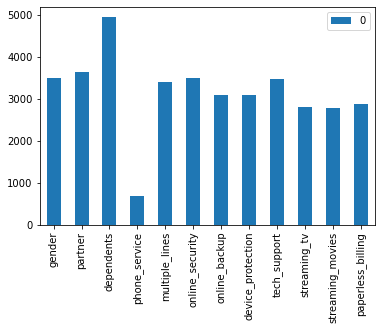

1


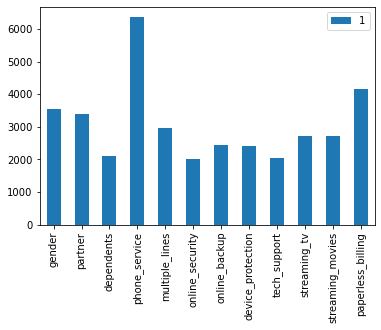

2


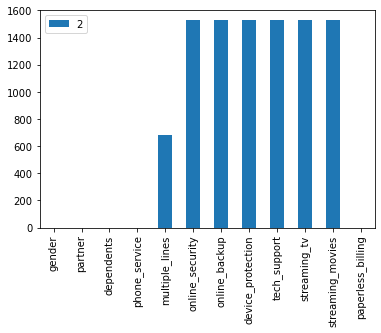

other


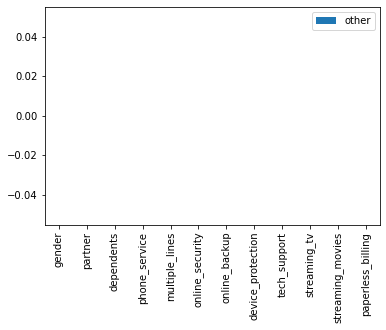

<ipython-input-7-c7c56ba2ef33>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_df["total_charges"] = quant_df["total_charges"].astype(float)


In [7]:
#iterate through each col to see what the unique values are..
for col in telco_df.columns:
    print(col)
    print('-' * 20)
    print(telco_df[col].unique())
    print('-' * 20)

#Making a df to visualize and replacing cat variables with numerical
viz_df = cat_df.copy()
viz_df = viz_df.reset_index()
viz_index = viz_df["customer_id"]
change_rubric = {"Yes": 1, "No": 0, "Male": 1, "Female": 0, 'No phone service': 2, 
                 'No internet service': 2}
row_catcher = {}

for col in viz_df.columns:
    row_catcher[col] = {}
    rows = viz_df[col]
    print(f"rows {rows}")
    for index, row in enumerate(rows):        
        print(index, row)
        if row in list(change_rubric.keys()):
            print(row)
            row = change_rubric[row]
            print(row)
            row_catcher[col][index] = row
#^^^ replacing str's with numerics yes = 1 no = 0            

row_catcher2 = {key: pd.Series(value) for key, value in row_catcher.items() if len(value) > 0}
row_catcher2 = pd.concat(row_catcher2, axis=1)
#Converting from dictionary of lists to dataframe^


bar_df = {}
for col in row_catcher2.columns:
    og_length = len(row_catcher2[col])
    rows = row_catcher2[col].dropna()
    nans = og_length - len(rows)
    
    # trues = sum(rows)
    # falses = len(rows) - trues
    
    temp1 = len(rows[rows == 1])
    temp2 = len(rows[rows == 2])
    
    
    #counting 0/'s and one's
    temp0 = len(rows[rows == 0])
    bar_df[col] = {"0": temp0, "1": temp1, "2": temp2, "other": nans}
    
#^^^ Converting our n=    
bar_df = pd.DataFrame.from_dict(bar_df, orient="index")


for col in bar_df.columns:
    print(col)
    bar_df[col].plot.bar(label=col)
    plt.legend()
    plt.show()
    plt.close()
#refer to change_rubric for results// 2 (other) represents no_phone/no_internet service

cat_dummies = pd.get_dummies(row_catcher2, dummy_na=False)  #reseting index back to customer_id
cat_dummies["reindex"] = viz_index
cat_dummies = cat_dummies.set_index("reindex")

# scaling quant variables to increase accuracy
quant_df = quant_df[quant_df["tenure"] != 0]   
quant_df["total_charges"] = quant_df["total_charges"].astype(float)

quant_df = quant_df.reset_index()            #Reseting the index to og customer_id
re_index = quant_df["customer_id"]
quant_df = quant_df.drop(["customer_id"], axis=1)


# Scaling the Data:

In [8]:
#Scaling the Data:
scaler = StandardScaler()

catcher = {}
for col in quant_df.columns:
    # value = pd.DataFrame(quant_df[col]).copy().astype(float)
    value = pd.DataFrame(quant_df[col]).copy()
    scaled = scaler.fit_transform(value)
    catcher[col] = pd.DataFrame(scaled)
    
catcher = pd.concat(catcher, axis=1).droplevel(1, axis=1)
catcher["reindex"] = re_index
catcher = catcher.set_index("reindex")

quants = catcher.copy()
cats = cat_dummies.copy()
# can put all 3 together now 

recombined = pd.concat([cats, quants, churn_col], axis=1).dropna()
recombined

gender  partner  dependents  phone_service  multiple_lines  \
0002-ORFBO       0        1           1              1               0   
0003-MKNFE       1        0           0              1               1   
0004-TLHLJ       1        0           0              1               0   
0011-IGKFF       1        1           0              1               0   
0013-EXCHZ       0        1           0              1               0   
...            ...      ...         ...            ...             ...   
9987-LUTYD       0        0           0              1               0   
9992-RRAMN       1        1           0              1               1   
9992-UJOEL       1        0           0              1               0   
9993-LHIEB       1        1           1              1               0   
9995-HOTOH       1        1           1              0               2   

            online_security  online_backup  device_protection  tech_support  \
0002-ORFBO                0              1                  0             1   
0003-MKNFE                0              0                  0             0   
0004-TLHLJ                0              0                  1             0   
0011-IGKFF                0              1                  1             0   
0013-EXCHZ                0              0                  0             1   
...                     ...            ...                ...           ...   
9987-LUTYD                1              0                  0             1   
9992-RRAMN                0              0                  0             0   
9992-UJOEL                0              1                  0             0   
9993-LHIEB                1              0                  1             1   
9995-HOTOH                1              1                  1             0   

            streaming_tv  streaming_movies  paperless_billing    tenure  \
0002-ORFBO             1                 0                  1 -0.954296   
0003-MKNFE             0                 1                  0 -0.954296   
0004-TLHLJ             0                 0                  1 -1.158016   
0011-IGKFF             1                 1                  1 -0.791321   
0013-EXCHZ             1                 0                  1 -1.198760   
...                  ...               ...                ...       ...   
9987-LUTYD             0                 0                  0 -0.791321   
9992-RRAMN             0                 1                  1 -0.424625   
9992-UJOEL             0                 0                  1 -1.239504   
9993-LHIEB             0                 1                  0  1.408853   
9995-HOTOH             1                 1                  0  1.245878   

            monthly_charges  total_charges churn  
0002-ORFBO         0.026652      -0.745607    No  
0003-MKNFE        -0.162819      -0.768063    No  
0004-TLHLJ         0.302548      -0.883456   Yes  
0011-IGKFF         1.103642      -0.461240   Yes  
0013-EXCHZ         0.634952      -0.889390   Yes  
...                     ...            ...   ...  
9987-LUTYD        -0.320711      -0.679605    No  
9992-RRAMN         0.674841      -0.180711   Yes  
9992-UJOEL        -0.481927      -0.966443    No  
9993-LHIEB         0.101443       1.034298    No  
9995-HOTOH        -0.192735       0.628383    No  

[7032 rows x 16 columns]

# Statistical Testing

In [10]:

# #Created dummy_df to format str vals in cols to numeric to perform stat testing
dummy_df = pd.get_dummies(telco_df[['gender', 'partner', 'dependents', 'phone_service',
                                    'multiple_lines', 'online_security', 'online_backup',
                                    'device_protection', 'tech_support', 'streaming_tv',
                                    'streaming_movies', 'paperless_billing']], dummy_na=False)
dummy_df.head()

# concatenate the dummy_df dataframe above with the original df 

df = pd.concat([telco_df, dummy_df], axis=1)
df.head(1)



contract_type_id contract_type  gender  senior_citizen partner  \
customer_id                                                                   
0002-ORFBO                  3      Two year  Female               0     Yes   

            dependents  tenure phone_service multiple_lines  \
customer_id                                                   
0002-ORFBO         Yes       9           Yes             No   

             internet_service_type_id  ... tech_support_No internet service  \
customer_id                            ...                                    
0002-ORFBO                          1  ...                                0   

            tech_support_Yes streaming_tv_No streaming_tv_No internet service  \
customer_id                                                                     
0002-ORFBO                 1               0                                0   

            streaming_tv_Yes streaming_movies_No  \
customer_id                                        
0002-ORFBO                 1                   1   

             streaming_movies_No internet service streaming_movies_Yes  \
customer_id                                                              
0002-ORFBO                                      0                    0   

             paperless_billing_No  paperless_billing_Yes  
customer_id                                               
0002-ORFBO                      0                      1  

[1 rows x 57 columns]

# VISUALIZE THE DATA

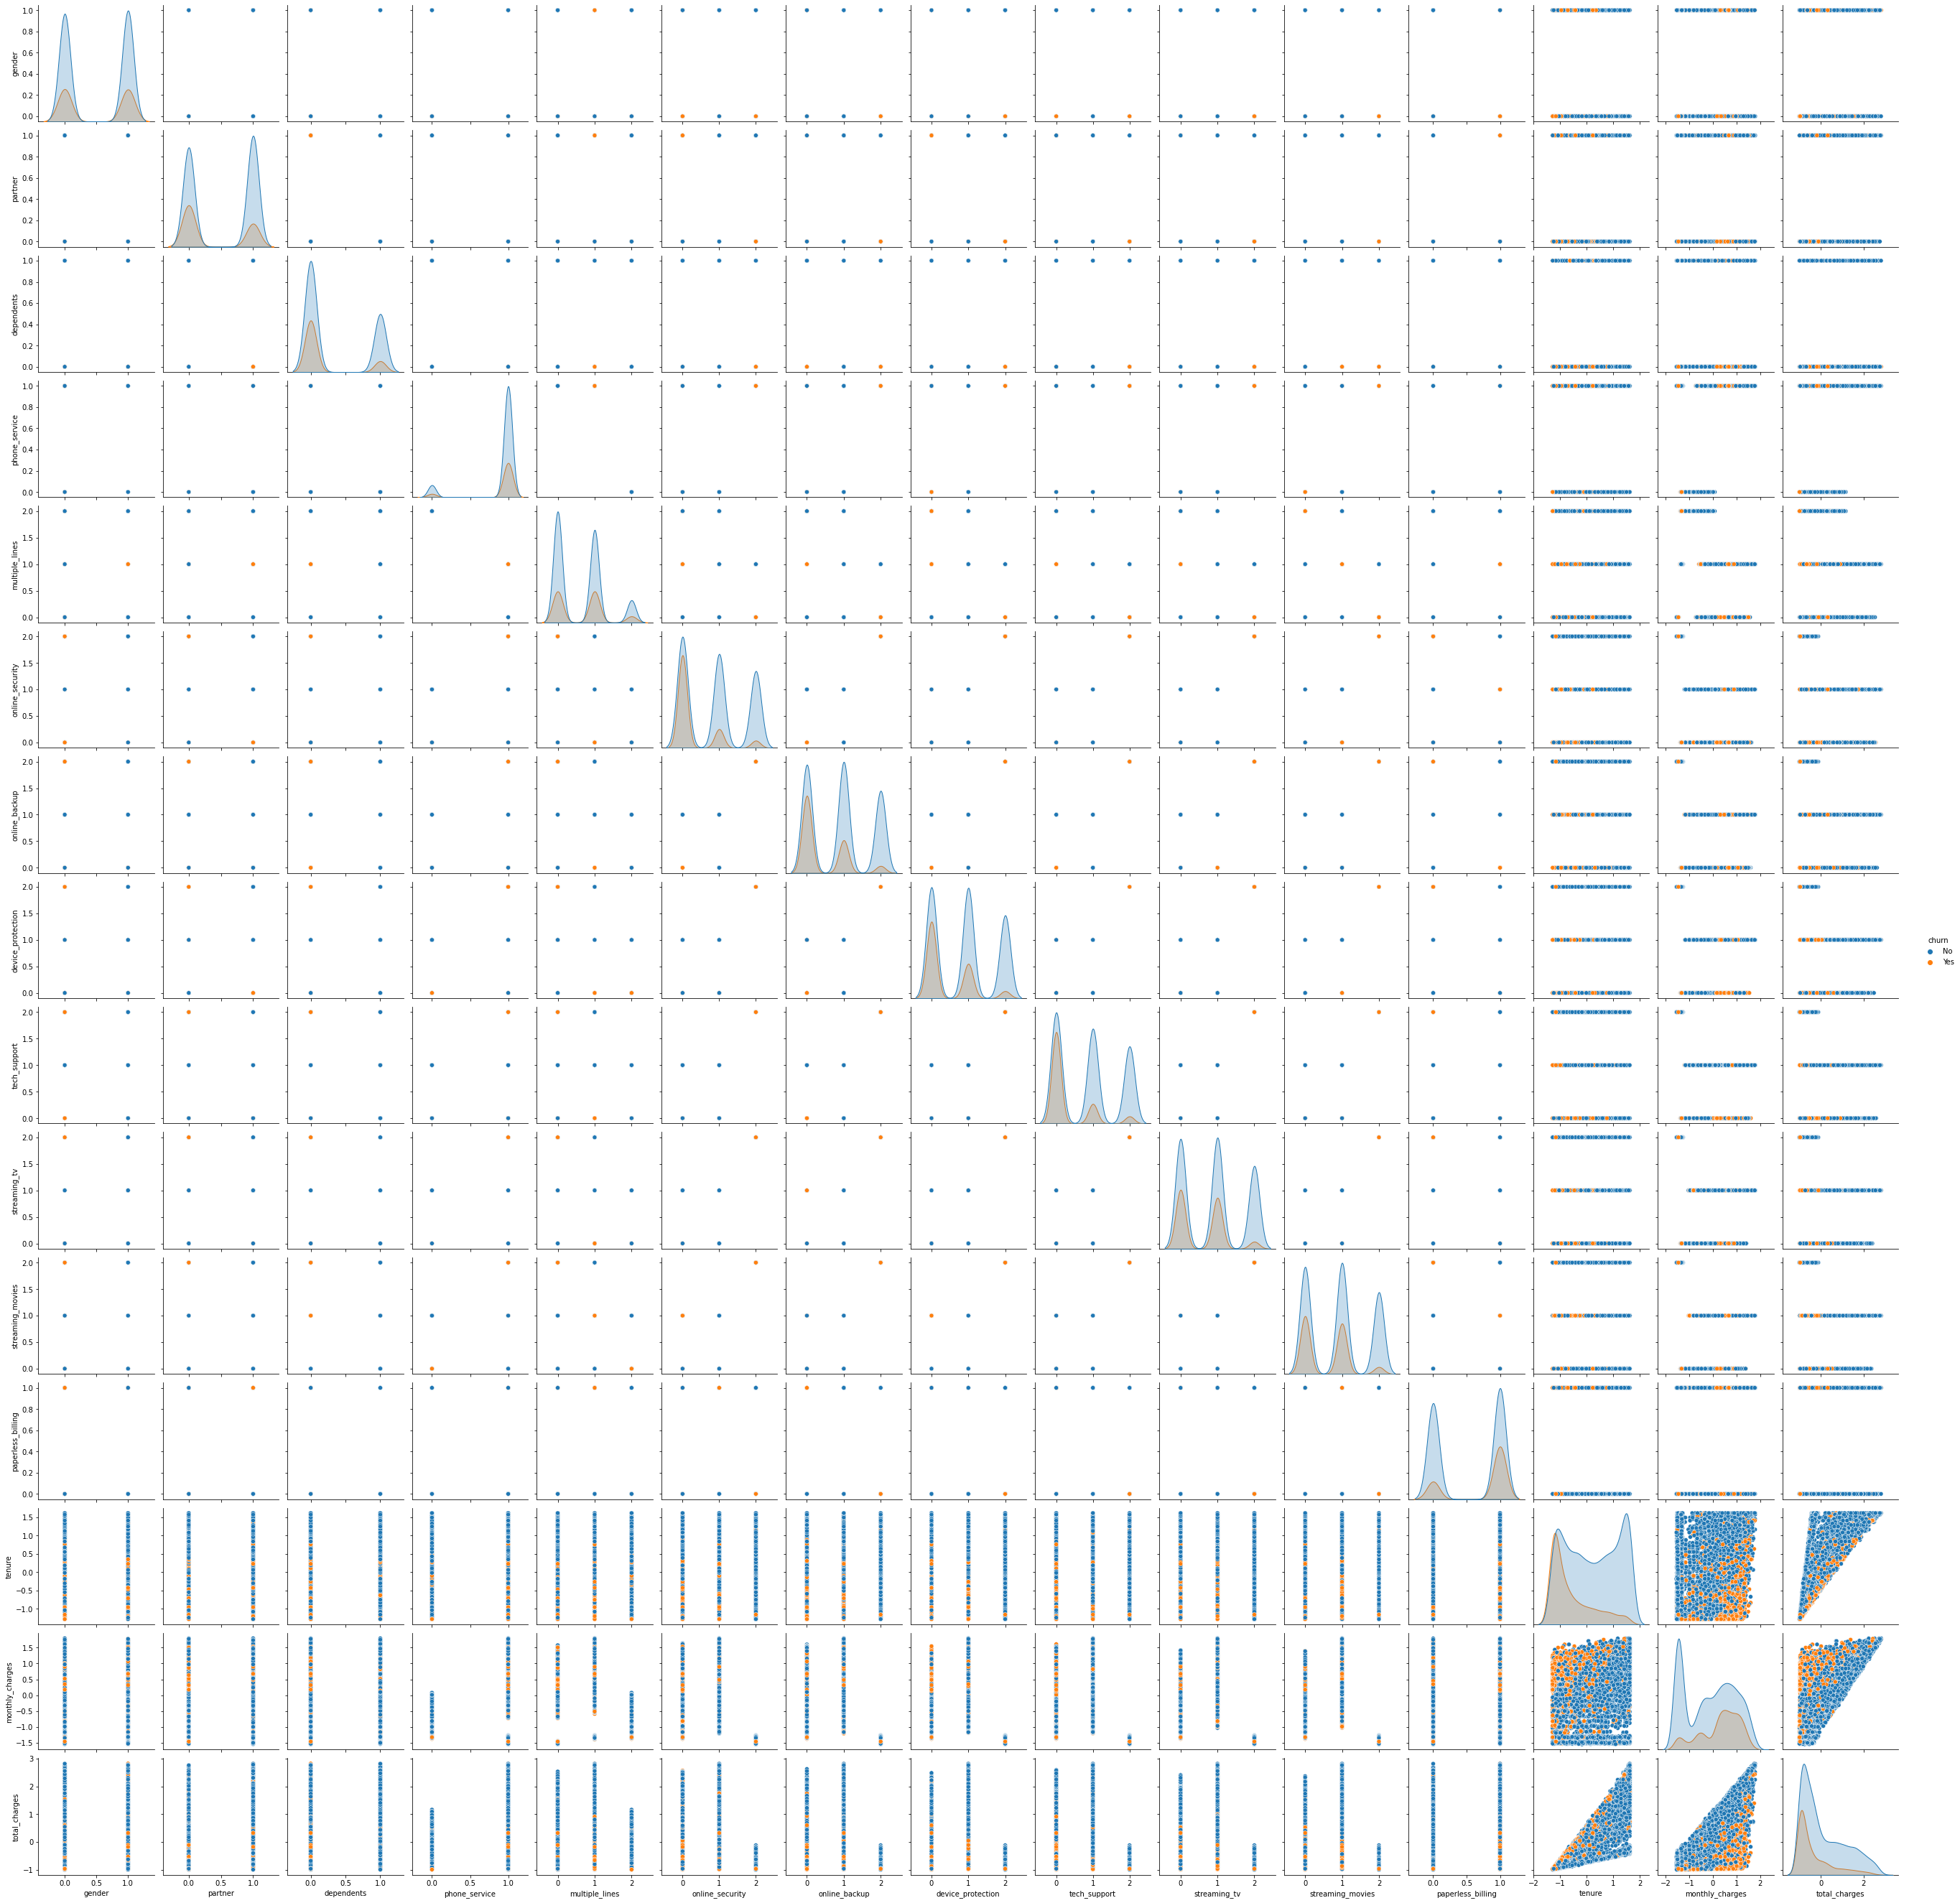

In [9]:

# =============================================================================
explore_df = recombined.iloc[:,-4:]    #remove the churn/quant cats from end of recombined df
sns.pairplot(recombined, hue='churn')
plt.show()
#Observations:
#Monthly charges, total_charges, and tenures are clearly producing the most churns...



#Is there a relationship between charges and churn.
# HYP: Contiuous vars have more influence on churn than static
    
# NULL: There is no difference in churn with continuous vars
#alpha = 0.5

#Takeaways from graphs above, monthly_charges/total_charges/tenure indicative causes of churn 


# TESTING HYP 1

In [11]:
#HYP1: Is there a relationship between tenure and churn?
#NULL: There is no relationship between tenure and churn.
#ALT: There is a relationship between tenure and churn.

# =============================================================================


#cols are already scaled
observed = pd.crosstab(df.churn, df.tenure)
observed

chi2, p ,degf, expected = stats.chi2_contingency(observed)
chi2, p
 # (1065.3308567510544, 1.2807811055496877e-176)
a = .05 #alpha

if p < a:
    print("Reject null hypothesis, tenure and churn are not independent")
else:
    print("Fail to reject null hypothesis, tenure and churn are independent, let's keep finding features that are not.")
#Reject null hypothesis, payment type and churn are not independent

Reject null hypothesis, tenure and churn are not independent


# TESTING HYP 2

In [12]:
#Hyp 2: Is there a relationship between monthlly_charges and churn.
# NULL: There is no relationship between monthly_charges and churn.
# ALT: There is a relationship between monthly_charges and churn.

# =============================================================================


observed = pd.crosstab(df.churn, df.monthly_charges)
observed

chi2, p ,degf, expected = stats.chi2_contingency(observed)
chi2, p
# output=(2123.609129997958, 1.8852727784254426e-18)

a = .05 #alpha

if p < a:
    print("Reject null hypothesis, monthly_charges and churn are not independent")
else:
    print("Fail to reject null hypothesis, monthly_charges and churn are independent, let's keep finding features that are not.")
#Reject null hypothesis, monthly_charges and churn are not independent

Reject null hypothesis, monthly_charges and churn are not independent


===============================================================
# TRAIN, TEST, SPLIT
#===============================================================

In [13]:

#Categorical variables are - Male | Female
#Continous Variables are - 59.4, 20, etc.

X = recombined.iloc[:, :-1]
y = recombined.iloc[:, -1] # sometimes this wants .values


def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test
train, validate, test = train_validate_test_split(recombined, 'churn', seed=SEED)
#80% train, 20% test

#WRITE A PREPARE FUNCTION FOR THIS----------------^^^^^^^
# create X & y version of train, where y is a series with just the target variable and X are all the features. 
# train2 = train.reset_index()
# #***Bc Bc index is 


X_train = train.drop(columns=['churn'])
y_train = train['churn']

X_validate = validate.drop(columns=['churn'])
y_validate = validate['churn']

X_test = test.drop(columns=['churn'])
y_test = test['churn']


print(X_train)




            gender  partner  dependents  phone_service  multiple_lines  \
1202-KKGFU       0        1           0              1               0   
5846-QFDFI       0        1           1              1               1   
5995-SNNEW       1        1           0              1               1   
2521-NPUZR       1        1           0              1               0   
4993-JCRGJ       1        0           0              1               1   
...            ...      ...         ...            ...             ...   
3719-TDVQB       0        1           0              1               0   
1122-YJBCS       1        1           0              1               0   
5515-AKOAJ       0        0           0              1               1   
6624-JDRDS       0        0           0              0               2   
9206-GVPEQ       1        1           0              0               2   

            online_security  online_backup  device_protection  tech_support  \
1202-KKGFU                1     

# # ===============================================================
#                                 Establish Baseline Accuracy

In [14]:



baseline = train.churn.value_counts().nlargest(1) / train.shape[0]
print(f'My baseline accuracy is {round(baseline.values[0] * 100,2)}%.')

# My baseline accuracy is 73.43%.


My baseline accuracy is 73.43%.


# Making the Models

[0.03107413 0.02420137 0.02376781 0.00543992 0.02674552 0.0543636
 0.03183713 0.03060363 0.05043115 0.02624014 0.02544651 0.03106378
 0.19502112 0.21274844 0.23101575]
Accuracy of random forest classifier on training set: 1.00
[[2887    4]
 [   8 1038]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      2891
         Yes       1.00      0.99      0.99      1046

    accuracy                           1.00      3937
   macro avg       1.00      1.00      1.00      3937
weighted avg       1.00      1.00      1.00      3937

Accuracy of random forest classifier on test set: 0.79


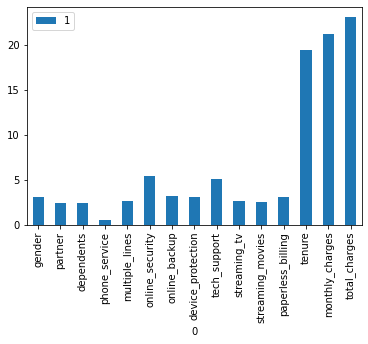

In [15]:
# =============================================================================
#                             RANDOM FOREST CLASSIFIER
# =============================================================================

classifier_rf = RandomForestClassifier()

model = classifier_rf.fit(X_train, y_train)
# =============================================================================
# FEATURE IMPORTANCE AND PERCENTAGE 
# =============================================================================
print(model.feature_importances_) #evaluates the importance or weight of each feature

feat_cols = list(X_train.columns)

feat_imp = list(model.feature_importances_)  #Lets visualize the feature importance

feat_imp = [round(i * 100, 2) for i in feat_imp]

feat_cols = pd.Series(feat_cols)
feat_imp = pd.Series(feat_imp)

feat_df = pd.concat([feat_cols, feat_imp],axis=1)

feat_df = feat_df.set_index(0)

feat_df.plot.bar()
#observations:
    #tenure, monthly charges, and total charges are significant indicators of churn
    #features that would make for a informative model
y_pred = model.predict(X_train)


# Estimate the probability of each species, using the training data.
y_pred_proba = model.predict_proba(X_train)

                                # Compute the Accuracy


print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
#Accuracy 1.00 /// it appears the model is overfitting the data


                        # Create a confusion matrix
print(confusion_matrix(y_train, y_pred))
# [[2886    5]
#  [   7 1039]]

print(classification_report(y_train, y_pred))

#       precision    recall  f1-score   support

#           No       1.00      1.00      1.00      2891
#          Yes       1.00      0.99      0.99      1046

#     accuracy                           1.00      3937
#    macro avg       1.00      1.00      1.00      3937
# weighted avg       1.00      1.00      1.00      3937

                        # Validate Model
# Compute the accuracy of the model when run on the validate dataset.                        
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model.score(X_validate, y_validate)))
# Accuracy of random forest classifier on test set: 0.77

Accuracy of KNN classifier on training set: 0.83
[[2602  289]
 [ 366  680]]
              precision    recall  f1-score   support

          No       0.88      0.90      0.89      2891
         Yes       0.70      0.65      0.67      1046

    accuracy                           0.83      3937
   macro avg       0.79      0.78      0.78      3937
weighted avg       0.83      0.83      0.83      3937

Accuracy of KNN classifier on test set: 0.76


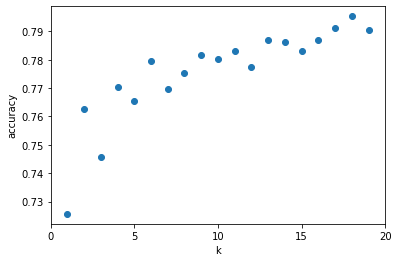

In [16]:
# =============================================================================
# KNN Model
# =============================================================================
# Create KNN Object

# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')



# Fit the model

knn.fit(X_train, y_train)

#output: KNeighborsClassifier()


# Make Predictions
# Classify each flower by its estimated species.

y_pred = knn.predict(X_train)



# Estimate Probability
# Estimate the probability of each species, using the training data.

y_pred_proba = knn.predict_proba(X_train)



                # Evaluate Model:
# Compute the Accuracy

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
# Accuracy of KNN classifier on training set: 0.83

# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))
# [[2612  279]
#  [ 399  647]]

# Create a classificaiton report
print(classification_report(y_train, y_pred))
#            precision    recall  f1-score   support

#           No       0.87      0.90      0.89      2891
#          Yes       0.70      0.62      0.66      1046

#     accuracy                           0.83      3937
#    macro avg       0.78      0.76      0.77      3937
# weighted avg       0.82      0.83      0.82      3937




                # VALIDATE KNN MODEL
# Evaluate on Out-of-Sample data

# Compute the accuracy of the model when run on the validate dataset.
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))


            # Visualize Model

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [17]:
# =============================================================================
#                         LOGISTIC REGRESSION MODEL
# =============================================================================
logit_ytrain = y_train.copy()
logit_ytrain = logit_ytrain.replace({'No': 0, 'Yes': 1})

logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')


# Fit the model

# Fit the random forest algorithm to the training data.
logit.fit(X_train, logit_ytrain)
# LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)



                        # Feature Importance
# Evaluate importance, or weight, of each feature, using the coefficients.
# Evaluate the intercept of the model.
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

# Make Predictions
y_pred = logit.predict(X_train)

# Estimate Probability
y_pred_proba = logit.predict_proba(X_train)

            # Evaluate Model
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, logit_ytrain)))

# Accuracy of Logistic Regression classifier on training set: 0.32. #nodice



# Create a confusion matrix
print(confusion_matrix(logit_ytrain, y_pred))
# [[ 252 2639]
#  [   1 1045]]
# Create a classificaiton report
print(classification_report(logit_ytrain, y_pred))

#             precision    recall  f1-score   support

#            0       1.00      0.09      0.16      2891
#            1       0.28      1.00      0.44      1046

#     accuracy                           0.33      3937
#    macro avg       0.64      0.54      0.30      3937
# weighted avg       0.81      0.33      0.24      3937


#After reviewing the 3 models it was decided that a Random Forest Classifier would be the best in 
#performance for the data

Coefficient: 
 [[-0.07228853 -0.03354609 -0.29598637  0.13023604  0.17770584 -0.54961139
  -0.09501312 -0.02513799 -0.70012643  0.25201204  0.29317235  0.35626365
  -1.42111104  0.23961601  0.38340465]]
Intercept: 
 [3.27672086]
Accuracy of Logistic Regression classifier on training set: 0.32
[[ 209 2682]
 [   3 1043]]
              precision    recall  f1-score   support

           0       0.99      0.07      0.13      2891
           1       0.28      1.00      0.44      1046

    accuracy                           0.32      3937
   macro avg       0.63      0.53      0.29      3937
weighted avg       0.80      0.32      0.22      3937



# Predictions to CSV:

In [ ]:
proba_test = model.predict_proba(X_test)
proba_df = pd.DataFrame(proba_test, columns=model.classes_.tolist())
proba_df.head()

reset_test = test.reset_index()

reset_test.head()



test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df.head()

test_proba_df['predicted'] = model.predict(X_test)
test_proba_df.head(20)


#write probability table to a csv called predictions
test_proba_df.to_csv('predictions.csv')
